# Credit Card Project


In [1]:
#!pip install imbalanced-learn
# !pip install xgboost
# !pip install catboost

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import missingno as msno # library to examine missing values
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
 
#importing scaling and encoding library
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#importing feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_classif

#importing column transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

#importing train test split
from sklearn.model_selection import train_test_split

# importing ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,roc_auc_score)
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import precision_score,recall_score

# importing sampling library
from imblearn.over_sampling import SMOTE,RandomOverSampler


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline

# for displaying pipeline diagram
from sklearn import set_config
set_config(display='diagram')

In [3]:
# changing directory to file path

os.chdir('F:\Odin school\capstone project\Dataset')

In [4]:
# reading csv file

data = pd.read_csv('Credit_card.csv')

In [5]:
# reading lable csv file

lable_data = pd.read_csv('Credit_card_label.csv')

In [6]:
# Checking shape of data

data.shape

(1548, 18)

In [7]:
# Checking shape of data

lable_data.shape

(1548, 2)

In [8]:
#top 5 rows

data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [9]:
#top 5 rows

lable_data.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [10]:
# merging data and label_data

credit_card =data.merge(lable_data,on='Ind_ID')

In [11]:
#top 5 rows

credit_card.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [12]:
# Checking shape of data

credit_card.shape

(1548, 19)

## About Dataset Features :





    Ind_ID: Client ID

    Gender: Gender information

    Car_owner: Having car or not

    Propert_Owner: Having property or not

    Children: Count of children

    Annual_Income: Annual income

    Type_Income: Income type

    Education: Education level

    Marital_Status: Marital_status

    Housing_Type: Living style

    Birthday_Count: Use backward count from current day (0), -1 means yesterday.

    Employed_Days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

    Mobile_Phone: Any mobile phone

    Work_Phone: Any work phone

    Phone: Any phone number

    Email_Id: Any email ID (Yes-0 or No-1)

    Type_Occupation: Occupation

    Family_Members: Family size
    
    Label: 0 is application approved and 1 is application rejected. 




In [13]:
# columns of data

credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [14]:
# Correction in name of columns - as there are few columns with Uppercase or few lowercase

credit_card.rename(columns={'Ind_ID':'Ind_Id','GENDER':'Gender', 'CHILDREN':'Children'
                           ,'Annual_income': 'Annual_Income', 'EDUCATION':'Education'
                           ,'Marital_status':'Marital_Status','Housing_type':'Housing_Type'
                           , 'Birthday_count':'Birthday_Count', 'Employed_days':'Employed_Days'
                           ,'Mobile_phone':'Mobile_Phone'
                           , 'EMAIL_ID':'Email_Id','label':'Label'},inplace=True)

In [15]:
# information about data

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
# descriptive stats

credit_card.describe()

Ind_Id     Children  Annual_Income  Birthday_Count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_Days  Mobile_Phone   Work_Phone        Phone     Email_Id  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        Label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

In [17]:
# duplicate values

credit_card.duplicated().sum()

0

In [18]:
# checking null values

credit_card.isnull().sum()

Ind_Id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

In [19]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label'],
      dtype='object')

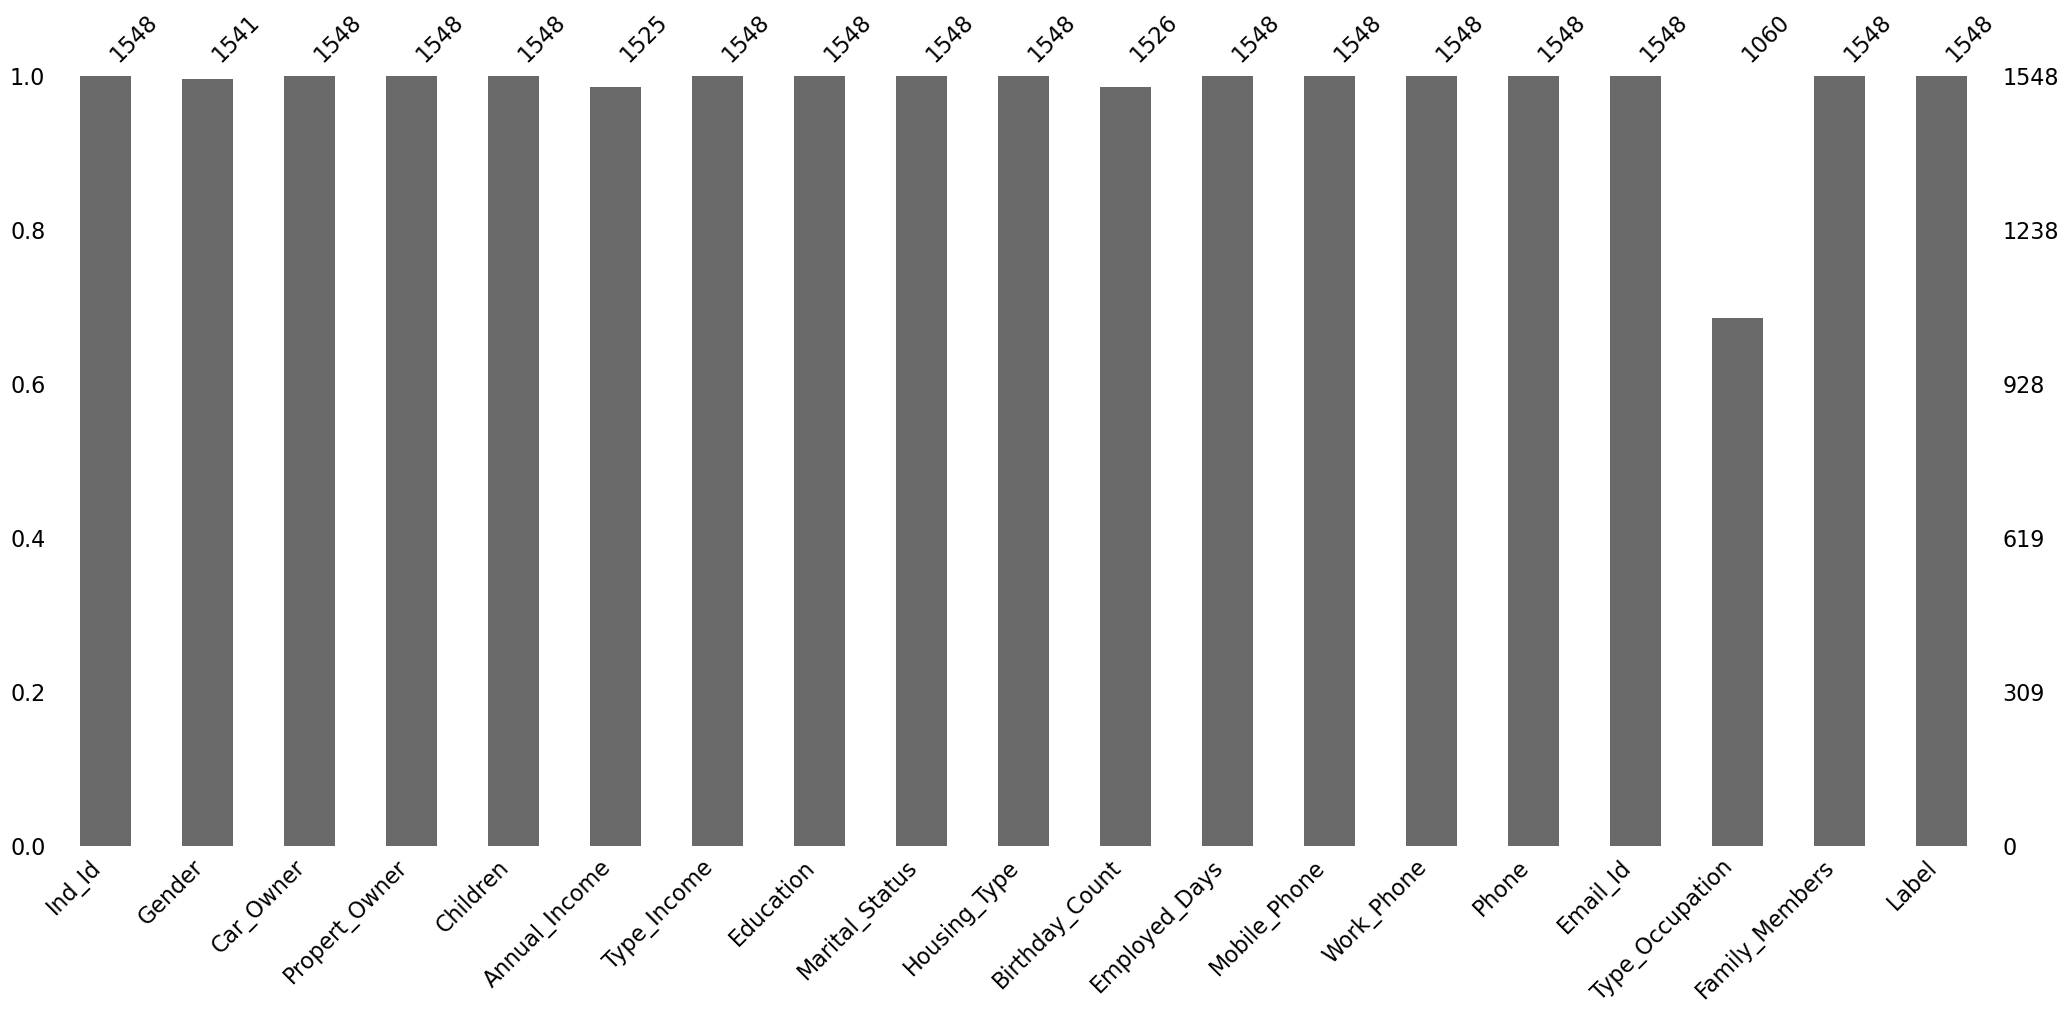

In [20]:
# creating bar plot to see the missing values

msno.bar(credit_card)
plt.show()

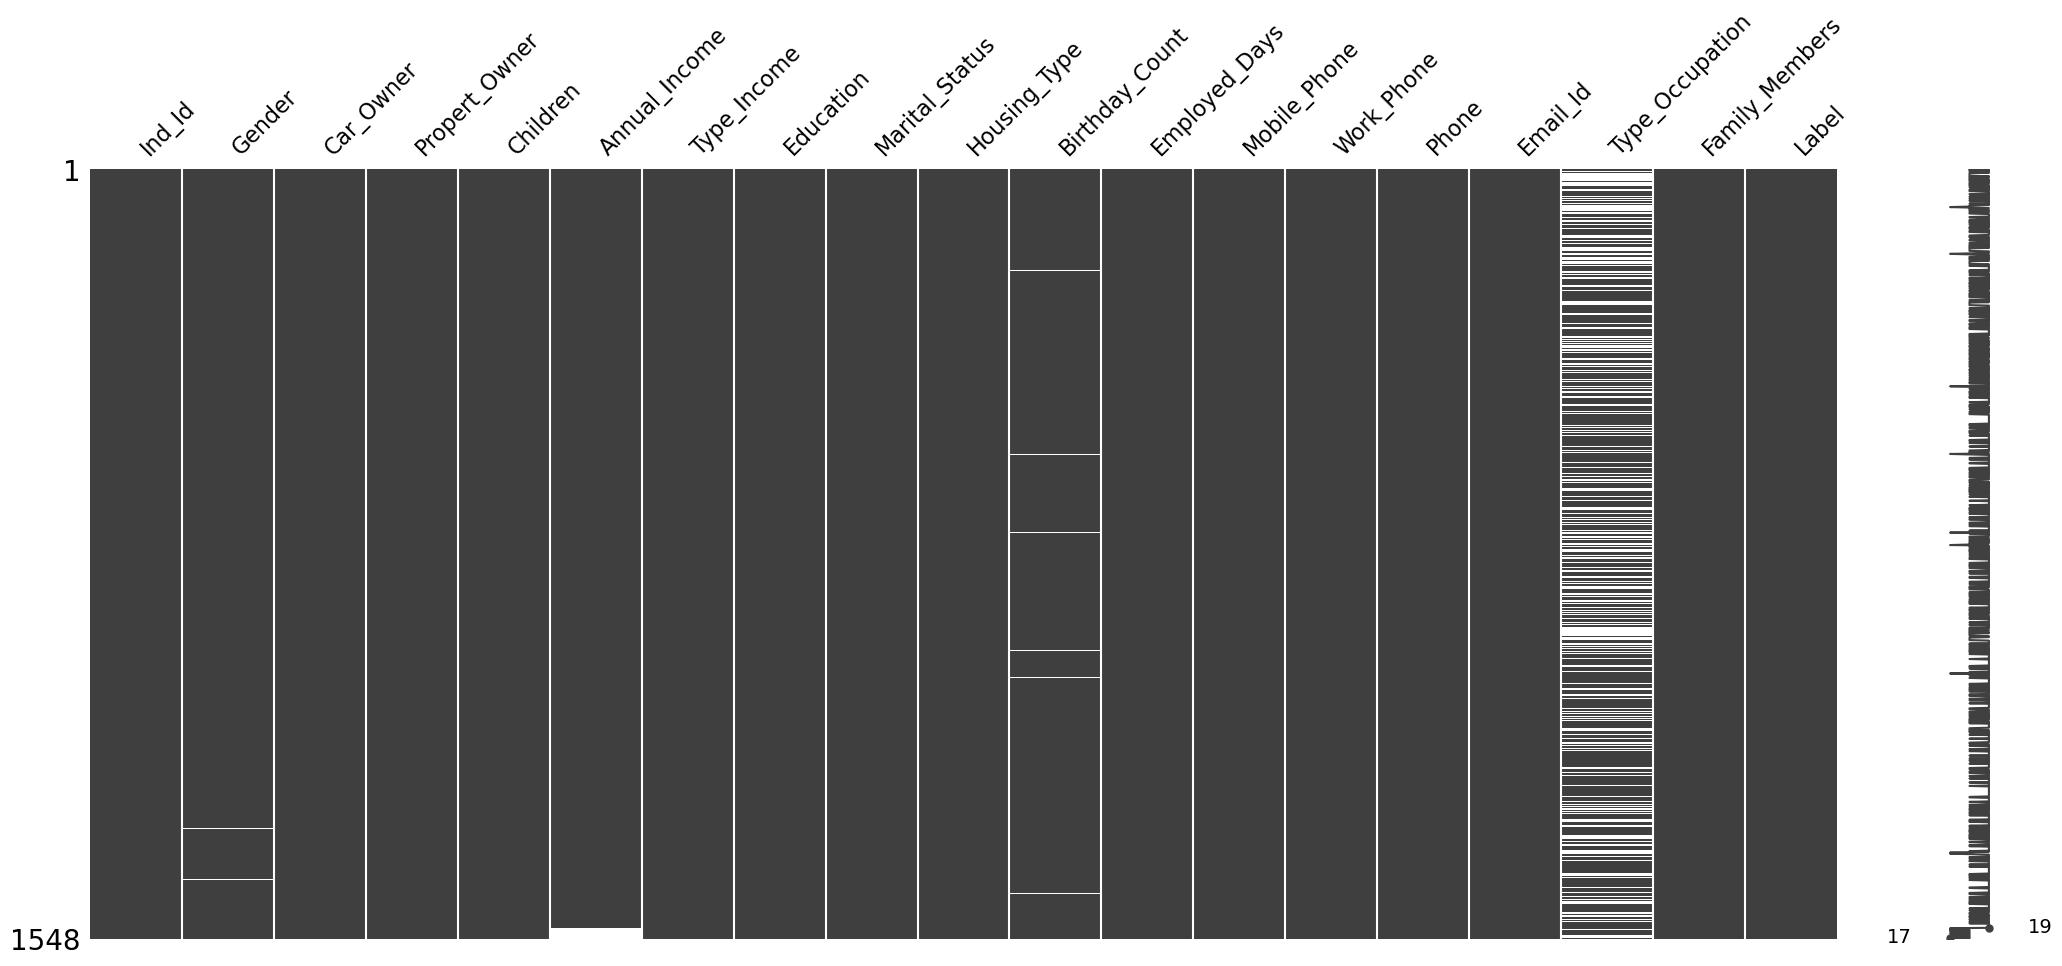

In [21]:
# creating matrix plot to see the missing values pattern

msno.matrix(credit_card.sort_values('Annual_Income'))
plt.show()

- As per Bar and matrix plot- there is no such missing pattern
- Gender column has 7 missing values
- Annual_income columns has 23 missing values
- Birthday_count column has 22 missing values
- Type_Occupation has 488 missing values

## Handling Missing values

In [22]:
# Checking unique values count in 'Gender' column

credit_card['Gender'].value_counts()

F    973
M    568
Name: Gender, dtype: int64

In [23]:
# As most of the vaues are of 'F' in 'Gender'--will fill missing values by 'F'

credit_card['Gender']=credit_card['Gender'].fillna(credit_card['Gender'].mode()[0])

In [24]:
# Checking unique values count in 'Type_Occupation' column

credit_card['Type_Occupation'].value_counts(ascending=True)

Realty agents              2
IT staff                   2
HR staff                   3
Waiters/barmen staff       5
Secretaries                9
Low-skill Laborers         9
Private service staff     17
Cooking staff             21
Cleaning staff            22
Security staff            25
Accountants               44
Medicine staff            50
High skill tech staff     65
Drivers                   86
Sales staff              122
Managers                 136
Core staff               174
Laborers                 268
Name: Type_Occupation, dtype: int64

In [25]:
# Checking label value_counts as per Null values in Type_Occupation

credit_card[credit_card['Type_Occupation'].isnull()]['Label'].value_counts()

0    431
1     57
Name: Label, dtype: int64

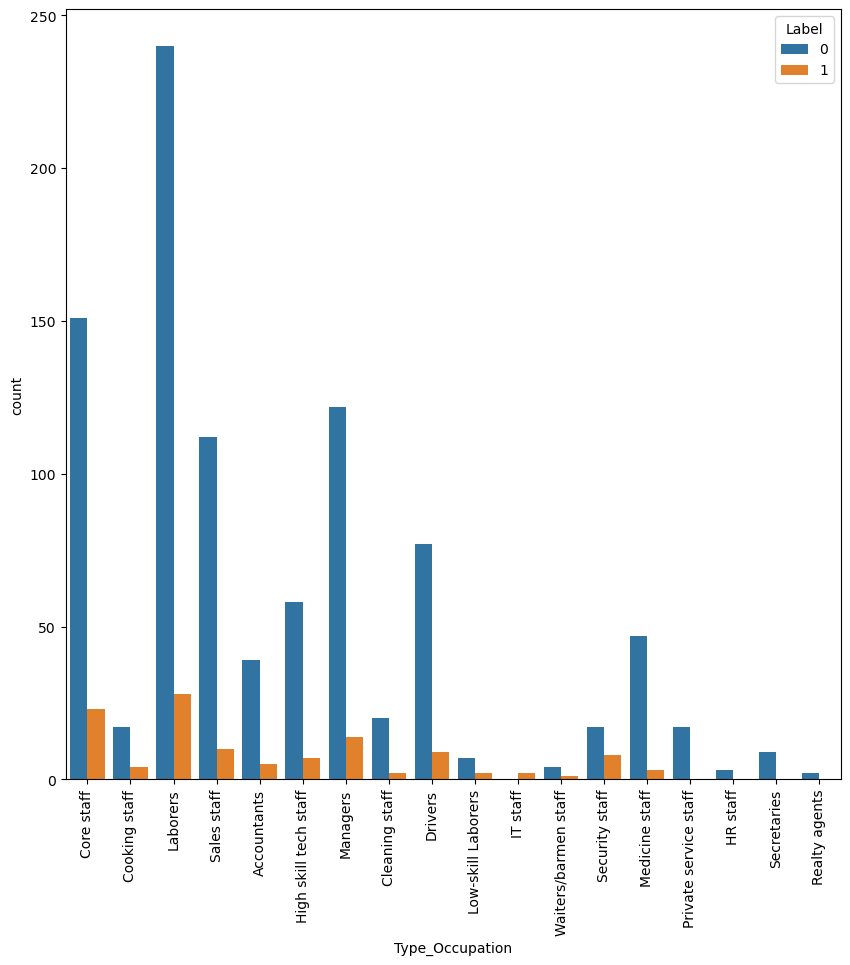

In [26]:
# Checking countplot- label value_counts as per Type_Occupation

plt.figure(figsize=(10,10))
sns.countplot(x='Type_Occupation', data= credit_card, hue= 'Label')
plt.xticks(rotation= 90)
plt.show()

- No clear insight is visible
- label is not dependent on Type_Occupation

In [27]:
# missing value percenatge in 'Type_Occupation' Column

missing_prcnt = credit_card['Type_Occupation'].isnull().sum()/ credit_card['Type_Occupation'].shape[0]
print('Percentage of missing values in "Type_Occupation" : ',missing_prcnt*100)

Percentage of missing values in "Type_Occupation" :  31.52454780361757


In [28]:
# filling 'Type_Occupation Column' null values with 'Other' 

credit_card["Type_Occupation"]= credit_card["Type_Occupation"].fillna('Other')

In [29]:
# top 5 columns

credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [30]:
# Checking unique values count in 'Annual_Income' column

credit_card['Annual_Income'].value_counts(ascending=True)

167400.0      1
105750.0      1
333000.0      1
37800.0       1
69372.0       1
           ... 
225000.0    119
157500.0    125
180000.0    137
112500.0    144
135000.0    170
Name: Annual_Income, Length: 115, dtype: int64

In [31]:
# Checking Unique counts of 'Type_income' whose 'Annual_Income' is null 

credit_card[(credit_card['Annual_Income'].isnull())][[ 'Type_Income']].value_counts()

Type_Income         
Working                 11
Commercial associate     8
Pensioner                4
dtype: int64

- 11 Working employees Annual_income is missing
- 8 Commercial associate employees Annual_income is missing
- 4 Pensioner Annual_income is missing

In [32]:
# Checking data whose 'Annual_Income' is null

credit_card[(credit_card['Annual_Income'].isnull())][['Gender',
       'Annual_Income', 'Type_Income',
       'Housing_Type', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone']]


Gender  Annual_Income           Type_Income         Housing_Type  \
3         F            NaN  Commercial associate    House / apartment   
12        F            NaN               Working    House / apartment   
27        F            NaN             Pensioner    House / apartment   
65        F            NaN             Pensioner    House / apartment   
76        M            NaN               Working    House / apartment   
107       M            NaN  Commercial associate  Municipal apartment   
125       F            NaN             Pensioner    House / apartment   
152       M            NaN  Commercial associate    House / apartment   
185       F            NaN               Working    House / apartment   
215       F            NaN  Commercial associate    House / apartment   
273       F            NaN               Working    House / apartment   
324       F            NaN  Commercial associate    House / apartment   
381       M            NaN  Commercial associate    House / apartment   
429       M            NaN  Commercial associate    House / apartment   
474       M            NaN               Working    House / apartment   
561       F            NaN               Working    House / apartment   
720       M            NaN               Working    House / apartment   
915       F            NaN             Pensioner    House / apartment   
1011      F            NaN               Working    House / apartment   
1263      M            NaN               Working    House / apartment   
1299      F            NaN               Working    House / apartment   
1386      M            NaN               Working    House / apartment   
1543      F            NaN  Commercial associate    House / apartment   

      Employed_Days  Mobile_Phone  Work_Phone  Phone  
3              -586             1           1      1  
12            -1002             1           1      1  
27           365243             1           0      1  
65           365243             1           0      0  
76             -137             1           0      0  
107            -606             1           0      1  
125          365243             1           0      0  
152           -4305             1           1      1  
185            -141             1           1      1  
215           -1477             1           0      0  
273           -1496             1           0      0  
324            -962             1           0      1  
381           -3653             1           0      0  
429           -3273             1           0      0  
474           -1931             1           0      1  
561           -1128             1           0      0  
720           -2589             1           0      0  
915          365243             1           0      1  
1011          -1526             1           0      0  
1263           -412             1           1      0  
1299          -3078             1           1      0  
1386          -1072             1           0      0  
1543          -2182             1           0      0

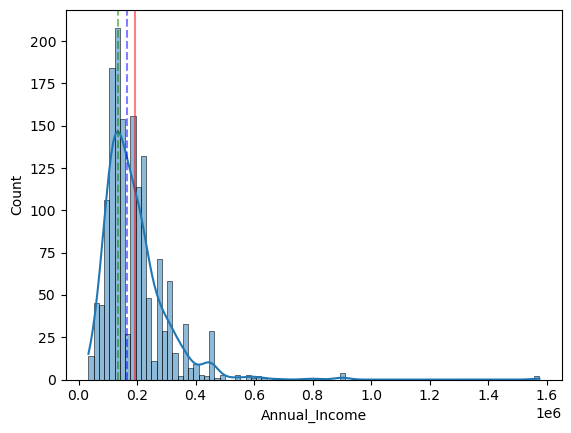

In [33]:
# Plotting histogram to check distribution of 'Annual_Income'

sns.histplot(x=credit_card['Annual_Income'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Annual_Income'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Annual_Income'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.axvline(x=credit_card['Annual_Income'].mode()[0],c='green',ls='--',alpha=0.5,label='Mode')
plt.show()

In [34]:
# Creating dataframe credit of original data -'credit_card'

credit= credit_card.copy()

In [35]:
# filling null values using median as there are outliers in the data

credit['Annual_Income']= credit_card['Annual_Income']=credit_card['Annual_Income'].fillna(credit_card['Annual_Income'].median())

In [36]:
# shape of credit dataframe

credit.shape

(1548, 19)

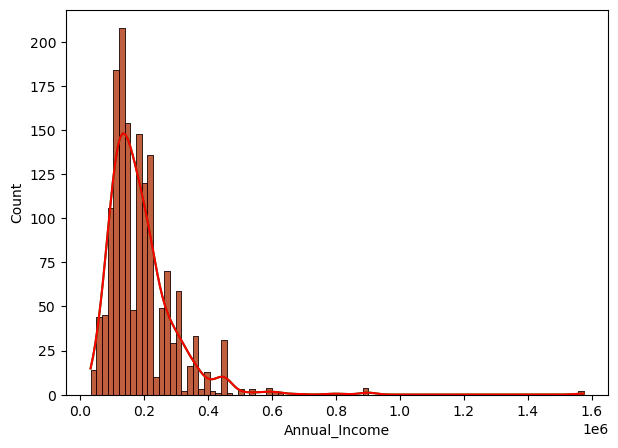

In [37]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with median

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Annual_Income' 

sns.histplot(credit_card['Annual_Income'],color='green',ax=ax, kde= True)


# new data without missing values in 'Annual_Income' 

sns.histplot(credit['Annual_Income'],color='red', ax=ax, kde= True)

plt.show()

In [38]:
# saving new data in old dataframe only

credit_card=credit.copy()

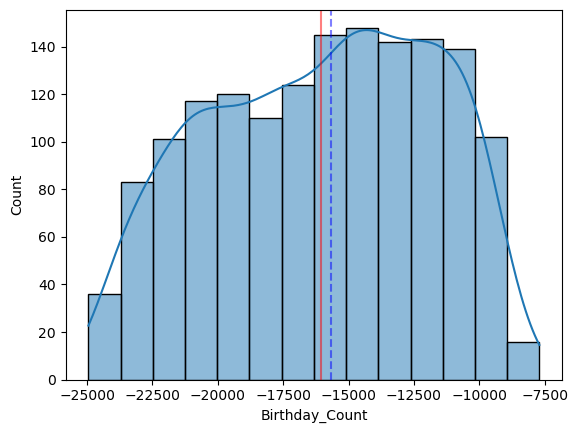

In [39]:
# Plotting histogram to check distribution of 'Birthday_Count'

sns.histplot(x=credit_card['Birthday_Count'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Birthday_Count'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Birthday_Count'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.show()

In [40]:
# checking value_counts

credit_card['Birthday_Count'].value_counts(ascending=False,sort= True)

-13557.0    5
-22655.0    5
-14523.0    5
-21363.0    5
-17454.0    4
           ..
-11729.0    1
-15994.0    1
-13456.0    1
-19532.0    1
-16601.0    1
Name: Birthday_Count, Length: 1270, dtype: int64

In [41]:
# null values

credit.isnull().sum()

Ind_Id              0
Gender              0
Car_Owner           0
Propert_Owner       0
Children            0
Annual_Income       0
Type_Income         0
Education           0
Marital_Status      0
Housing_Type        0
Birthday_Count     22
Employed_Days       0
Mobile_Phone        0
Work_Phone          0
Phone               0
Email_Id            0
Type_Occupation     0
Family_Members      0
Label               0
dtype: int64

In [42]:
# filling null values using median as outliers are in  data

credit['Birthday_Count']=credit_card['Birthday_Count'].fillna(credit_card['Birthday_Count'].median())

In [43]:
credit.isnull().sum()

Ind_Id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

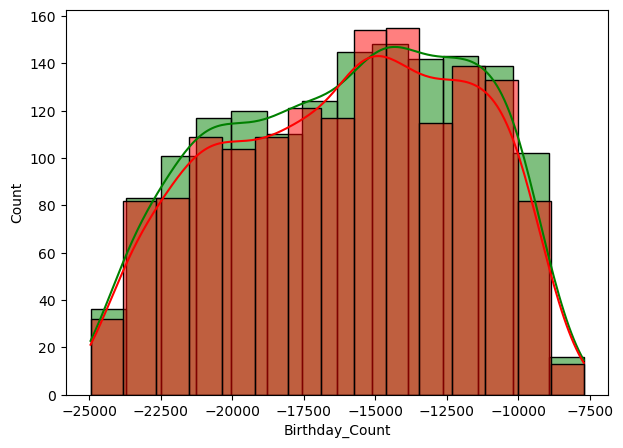

In [44]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with median

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Birthday_Count' 

sns.histplot(credit_card['Birthday_Count'],color='green',ax=ax, kde= True)


# new data without missing values in 'Birthday_Count'  

sns.histplot(credit['Birthday_Count'],color='red', ax=ax, kde= True)

plt.show()

- As kde plot is not overlapping -There is change in distribution after treating missing value.
- I will try to relace missing value with mode for 'Birthday_Count'

In [45]:
# filling null values using mode as outliers in  data

credit['Birthday_Count']=credit_card['Birthday_Count'].fillna(credit_card['Birthday_Count'].mode()[0])

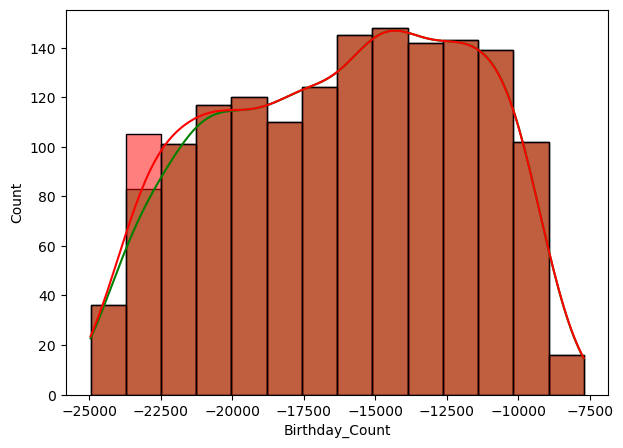

In [46]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with median

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Birthday_Count' 

sns.histplot(credit_card['Birthday_Count'],color='green',ax=ax, kde= True)


# new data without missing values in 'Birthday_Count'  

sns.histplot(credit['Birthday_Count'],color='red', ax=ax, kde= True)

plt.show()

- using mode disribution of data is not changing so much, will go with this one.

In [47]:
# saving new data in old dataframe only

credit_card=credit.copy()

In [48]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -22655.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [49]:
#shape

credit_card.shape

(1548, 19)

#

## 1.How many numerical and categorical columns are in data ? name of those columns

In [50]:
# Function to find categorical and numerical category from dataframe

def column_category(dataframe):

    num_col= list(dataframe.select_dtypes(include=np.number).columns)   # numerical column list
    cat_col =list(dataframe.select_dtypes(include=object).columns)      # categorical column list

    result1 = {"No. of numerical columns are" : len(num_col)}        # count of numerical columns dictionary
    name1 = {"Numerical Names" : num_col}                            # numerical names dictionary
    result2 = {"No. of categorical columns are":len(cat_col)}        # count of categorical columns- dictionary                       
    name2= {"Categorical Names" : cat_col}                           # Categorical names dictionary
    return result1,name1,result2,name2
    

In [51]:
# numerical and category column count and their names in credit card data

column_category(credit_card)

({'No. of numerical columns are': 11},
 {'Numerical Names': ['Ind_Id',
   'Children',
   'Annual_Income',
   'Birthday_Count',
   'Employed_Days',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Propert_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [52]:
# All numeric columns are :

num_col = column_category(credit_card)[1]['Numerical Names']
num_col

['Ind_Id',
 'Children',
 'Annual_Income',
 'Birthday_Count',
 'Employed_Days',
 'Mobile_Phone',
 'Work_Phone',
 'Phone',
 'Email_Id',
 'Family_Members',
 'Label']

In [53]:
# All Categirical columns are :

cat_col = column_category(credit_card)[3]['Categorical Names']
cat_col 

['Gender',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'Education',
 'Marital_Status',
 'Housing_Type',
 'Type_Occupation']

#

- Work_Phone, Phone, EMAIL_ID are categorical columns only- converted to numeric values
 - Hence, Numerical columns are - 8 , Categorical colmns are - 11

## Dealing with Categorical columns

In [54]:
cat_col

['Gender',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'Education',
 'Marital_Status',
 'Housing_Type',
 'Type_Occupation']

In [55]:
credit_card['Gender'].value_counts()

F    980
M    568
Name: Gender, dtype: int64

In [56]:
credit_card['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [57]:
credit_card['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [58]:
credit_card['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [59]:
credit_card['Education'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64

In [60]:
credit_card['Marital_Status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_Status, dtype: int64

In [61]:
credit_card['Housing_Type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_Type, dtype: int64

In [62]:
credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -22655.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [63]:
credit_card['Housing_Type']

0       House / apartment
1       House / apartment
2       House / apartment
3       House / apartment
4       House / apartment
              ...        
1543    House / apartment
1544    House / apartment
1545    House / apartment
1546    House / apartment
1547    House / apartment
Name: Housing_Type, Length: 1548, dtype: object

In [64]:
# # function to correct name in categorical column

def name_change(x):
    if (x == 'House / apartment') | (x=='Single / not married') | (x=='Secondary / secondary special') :
       x= x.split(' /')[0].strip()      
    return x

In [65]:
# changing name of unique value in respective columns using name_change function

credit_card['Housing_Type'] = credit_card['Housing_Type'].apply(name_change)   # apply function works only on series not dataframe
credit_card['Marital_Status'] = credit_card['Marital_Status'].apply(name_change)
credit_card['Education']  = credit_card['Education'].apply(name_change)

## Feature Construction

In [66]:
# creating Column -Year of experience using Employed_Days

credit_card['Year_Of_Experience'] = np.where(credit_card['Employed_Days']<0,-round(credit_card['Employed_Days']/365,1),0)

In [67]:
credit_card['Year_Of_Experience'].value_counts()

0.0     261
1.4      21
0.4      21
0.6      21
2.5      19
       ... 
22.3      1
37.6      1
25.4      1
25.9      1
11.6      1
Name: Year_Of_Experience, Length: 227, dtype: int64

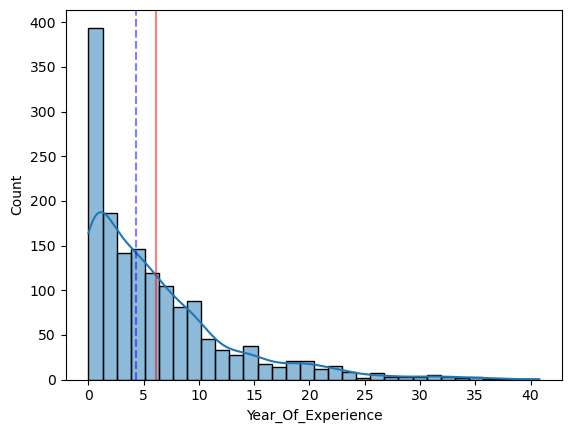

In [68]:
# Plotting histogram to check distribution of 'Year_Of_Experience'

sns.histplot(x=credit_card['Year_Of_Experience'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Year_Of_Experience'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Year_Of_Experience'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.show()

In [69]:
# creating Column -Age using  Birthday_Count

credit_card['Age'] = -round(credit_card['Birthday_Count']/365,0)

In [70]:
# Column in data

credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [71]:

column_category(credit_card)

({'No. of numerical columns are': 13},
 {'Numerical Names': ['Ind_Id',
   'Children',
   'Annual_Income',
   'Birthday_Count',
   'Employed_Days',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label',
   'Year_Of_Experience',
   'Age']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Propert_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [72]:
# shape of data

credit_card.shape

(1548, 21)

In [73]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

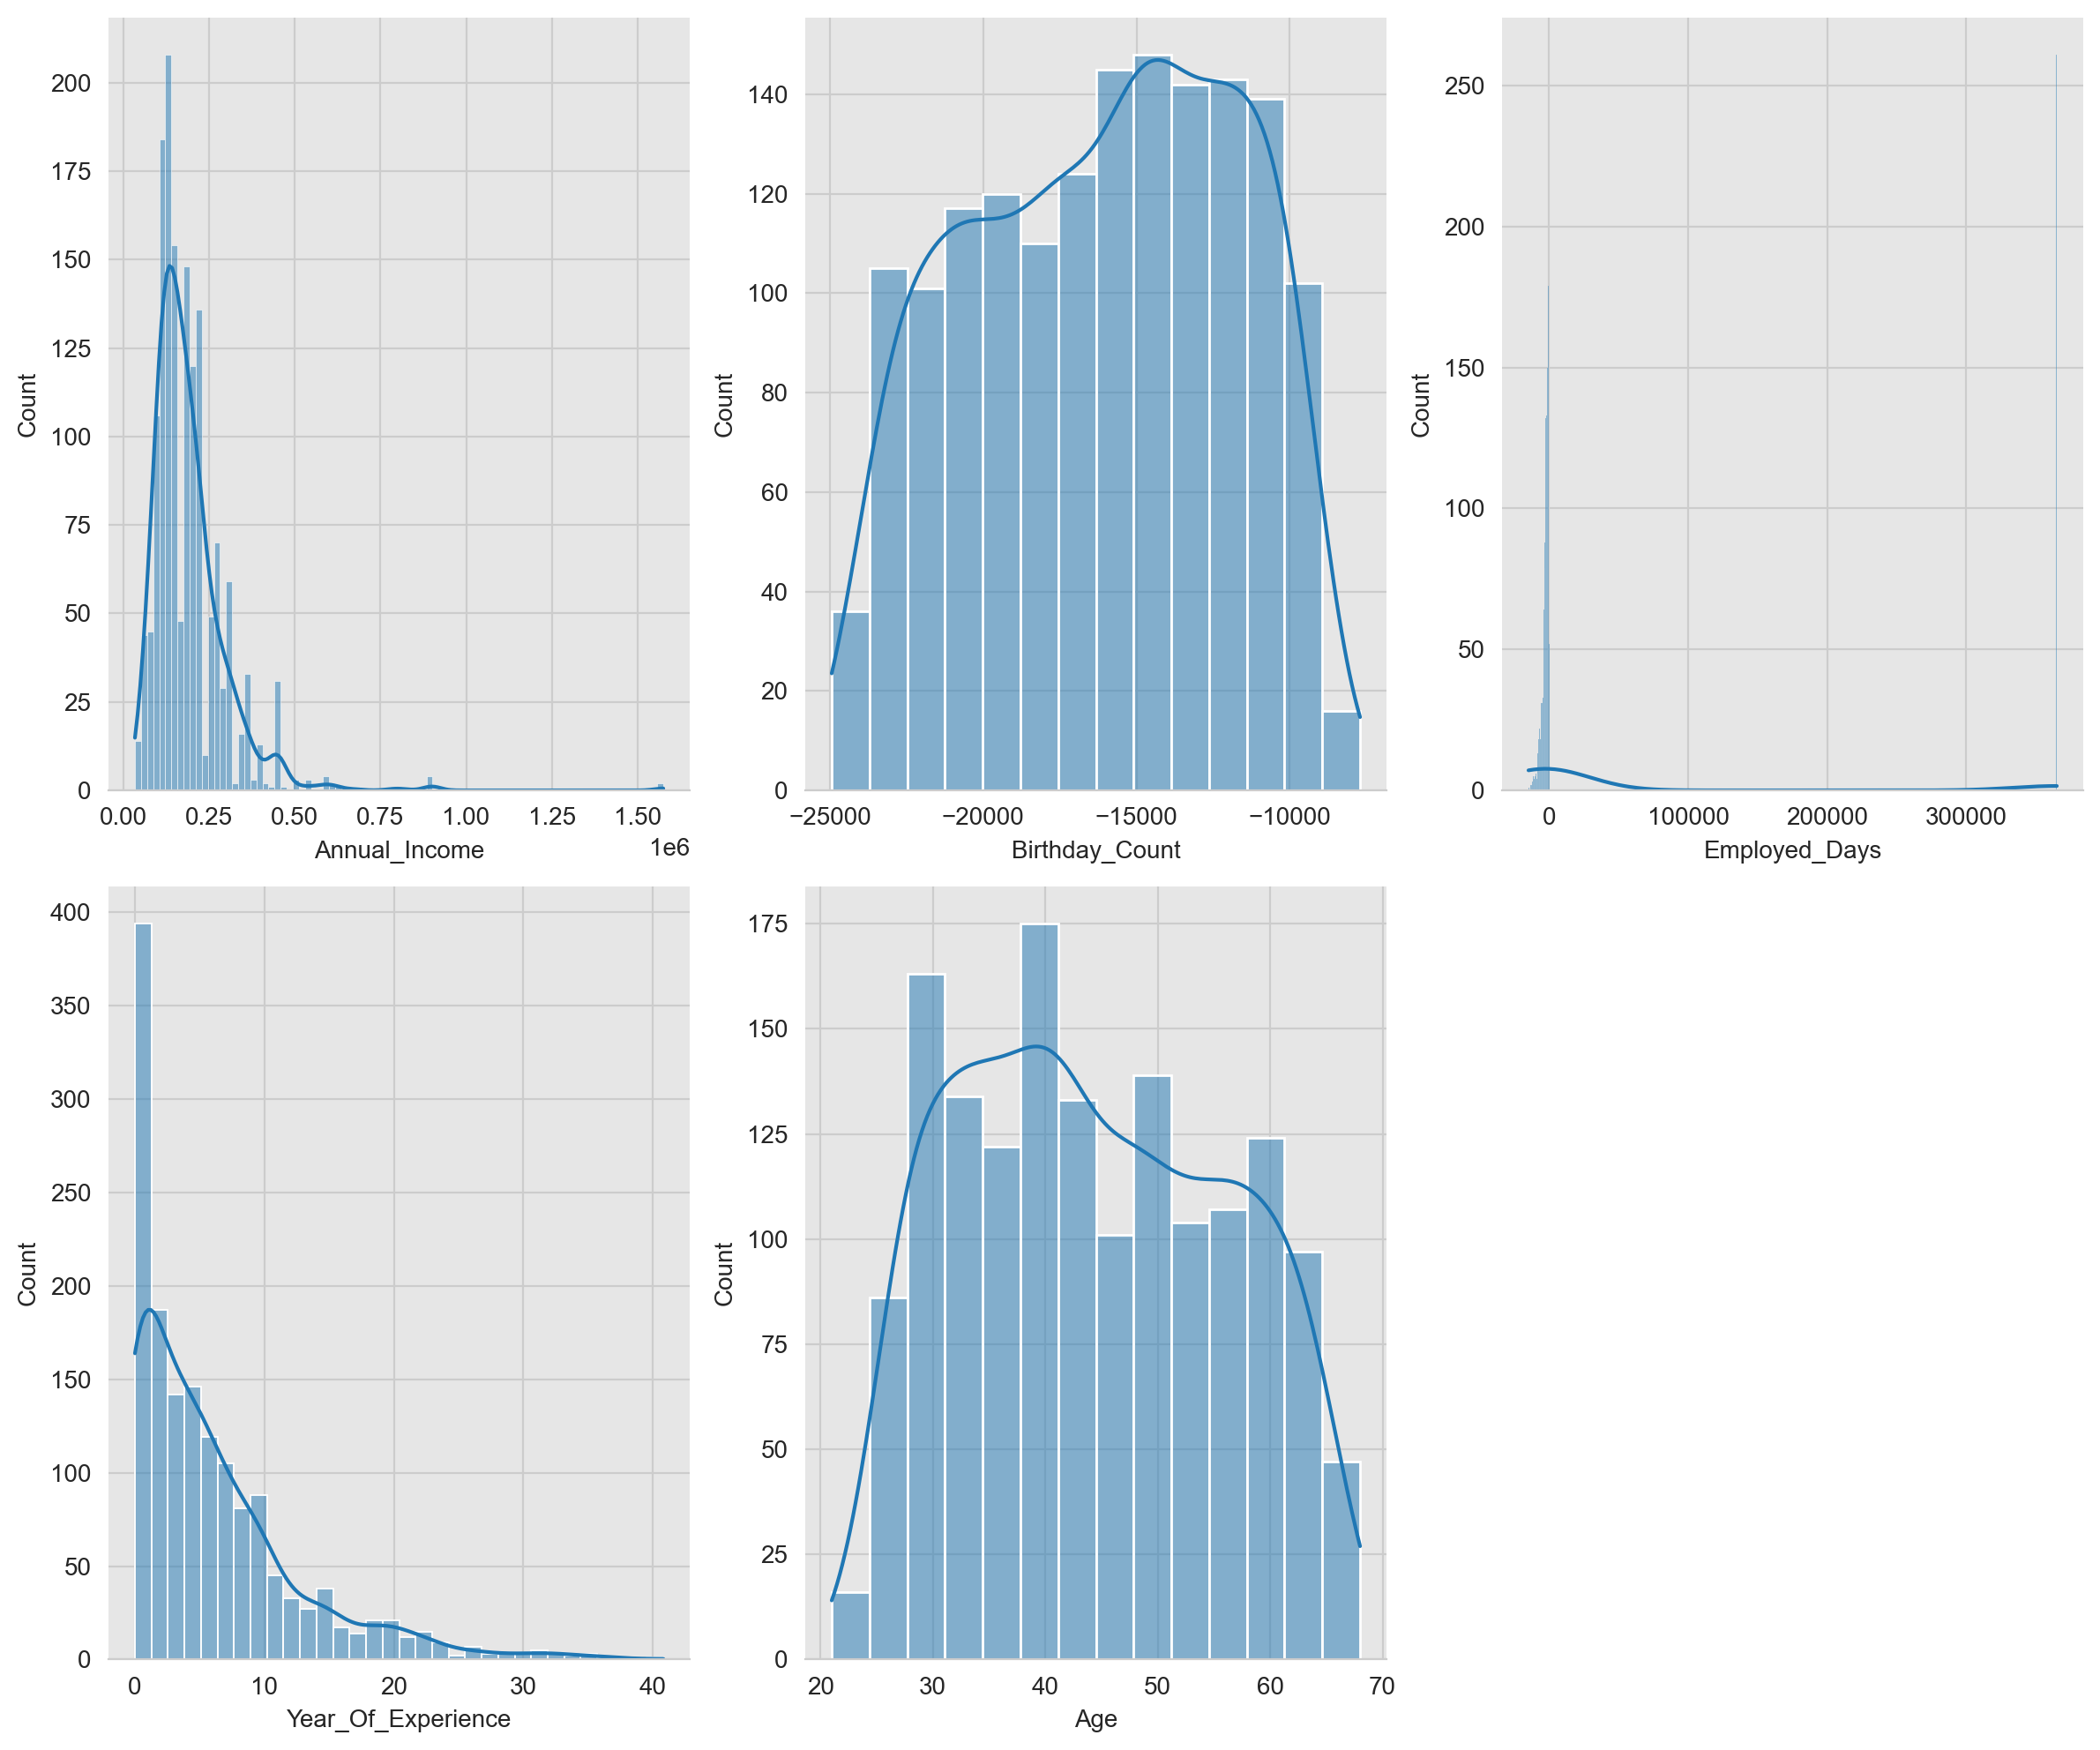

In [74]:
# Checking Distribution of new Columns


col = ['Annual_Income', 'Birthday_Count',
       'Employed_Days','Year_Of_Experience','Age']

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,10))

for x, y in enumerate (credit_card[col]):
    plt.subplot (2,3, x+1)
    bx = sns.histplot(x=credit_card[y],kde=True)
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

- Employed_days column has outliers- will see if column can be dropped as whole
- Year_of Experinece column is not normally distributed

In [75]:
credit_card.shape

(1548, 21)

## 2. Is data Balanced ?

In [76]:
credit_card['Label'].value_counts()

0    1373
1     175
Name: Label, dtype: int64

- Data is Imbalanced

## Data Visualization and Analysis

In [77]:
# correlation of variables with each other

credit_card.corr(numeric_only=True)



Ind_Id  Children  Annual_Income  Birthday_Count  \
Ind_Id              1.000000  0.032535       0.031019        0.022856   
Children            0.032535  1.000000       0.078543        0.274722   
Annual_Income       0.031019  0.078543       1.000000        0.108555   
Birthday_Count      0.022856  0.274722       0.108555        1.000000   
Employed_Days      -0.055396 -0.219095      -0.158966       -0.604739   
Mobile_Phone             NaN       NaN            NaN             NaN   
Work_Phone          0.085794  0.035014      -0.070944        0.164044   
Phone               0.008403 -0.004908      -0.006965       -0.035372   
Email_Id           -0.037923  0.025776       0.122354        0.170825   
Family_Members      0.016950  0.890248       0.051522        0.258972   
Label               0.016796 -0.021646       0.024425       -0.042532   
Year_Of_Experience  0.008177  0.074292       0.051321        0.026765   
Age                -0.022116 -0.273592      -0.108221       -0.999709   

                    Employed_Days  Mobile_Phone  Work_Phone     Phone  \
Ind_Id                  -0.055396           NaN    0.085794  0.008403   
Children                -0.219095           NaN    0.035014 -0.004908   
Annual_Income           -0.158966           NaN   -0.070944 -0.006965   
Birthday_Count          -0.604739           NaN    0.164044 -0.035372   
Employed_Days            1.000000           NaN   -0.231184 -0.003403   
Mobile_Phone                  NaN           NaN         NaN       NaN   
Work_Phone              -0.231184           NaN    1.000000  0.352439   
Phone                   -0.003403           NaN    0.352439  1.000000   
Email_Id                -0.118268           NaN   -0.009594  0.018105   
Family_Members          -0.238705           NaN    0.072228  0.005372   
Label                    0.031408           NaN   -0.007046 -0.000664   
Year_Of_Experience      -0.429916           NaN    0.120305  0.033388   
Age                      0.604537           NaN   -0.163380  0.034688   

                    Email_Id  Family_Members     Label  Year_Of_Experience  \
Ind_Id             -0.037923        0.016950  0.016796            0.008177   
Children            0.025776        0.890248 -0.021646            0.074292   
Annual_Income       0.122354        0.051522  0.024425            0.051321   
Birthday_Count      0.170825        0.258972 -0.042532            0.026765   
Employed_Days      -0.118268       -0.238705  0.031408           -0.429916   
Mobile_Phone             NaN             NaN       NaN                 NaN   
Work_Phone         -0.009594        0.072228 -0.007046            0.120305   
Phone               0.018105        0.005372 -0.000664            0.033388   
Email_Id            1.000000        0.035098  0.012921           -0.039198   
Family_Members      0.035098        1.000000 -0.030709            0.093448   
Label               0.012921       -0.030709  1.000000           -0.096765   
Year_Of_Experience -0.039198        0.093448 -0.096765            1.000000   
Age                -0.170645       -0.257536  0.042562           -0.026069   

                         Age  
Ind_Id             -0.022116  
Children           -0.273592  
Annual_Income      -0.108221  
Birthday_Count     -0.999709  
Employed_Days       0.604537  
Mobile_Phone             NaN  
Work_Phone         -0.163380  
Phone               0.034688  
Email_Id           -0.170645  
Family_Members     -0.257536  
Label               0.042562  
Year_Of_Experience -0.026069  
Age                 1.000000

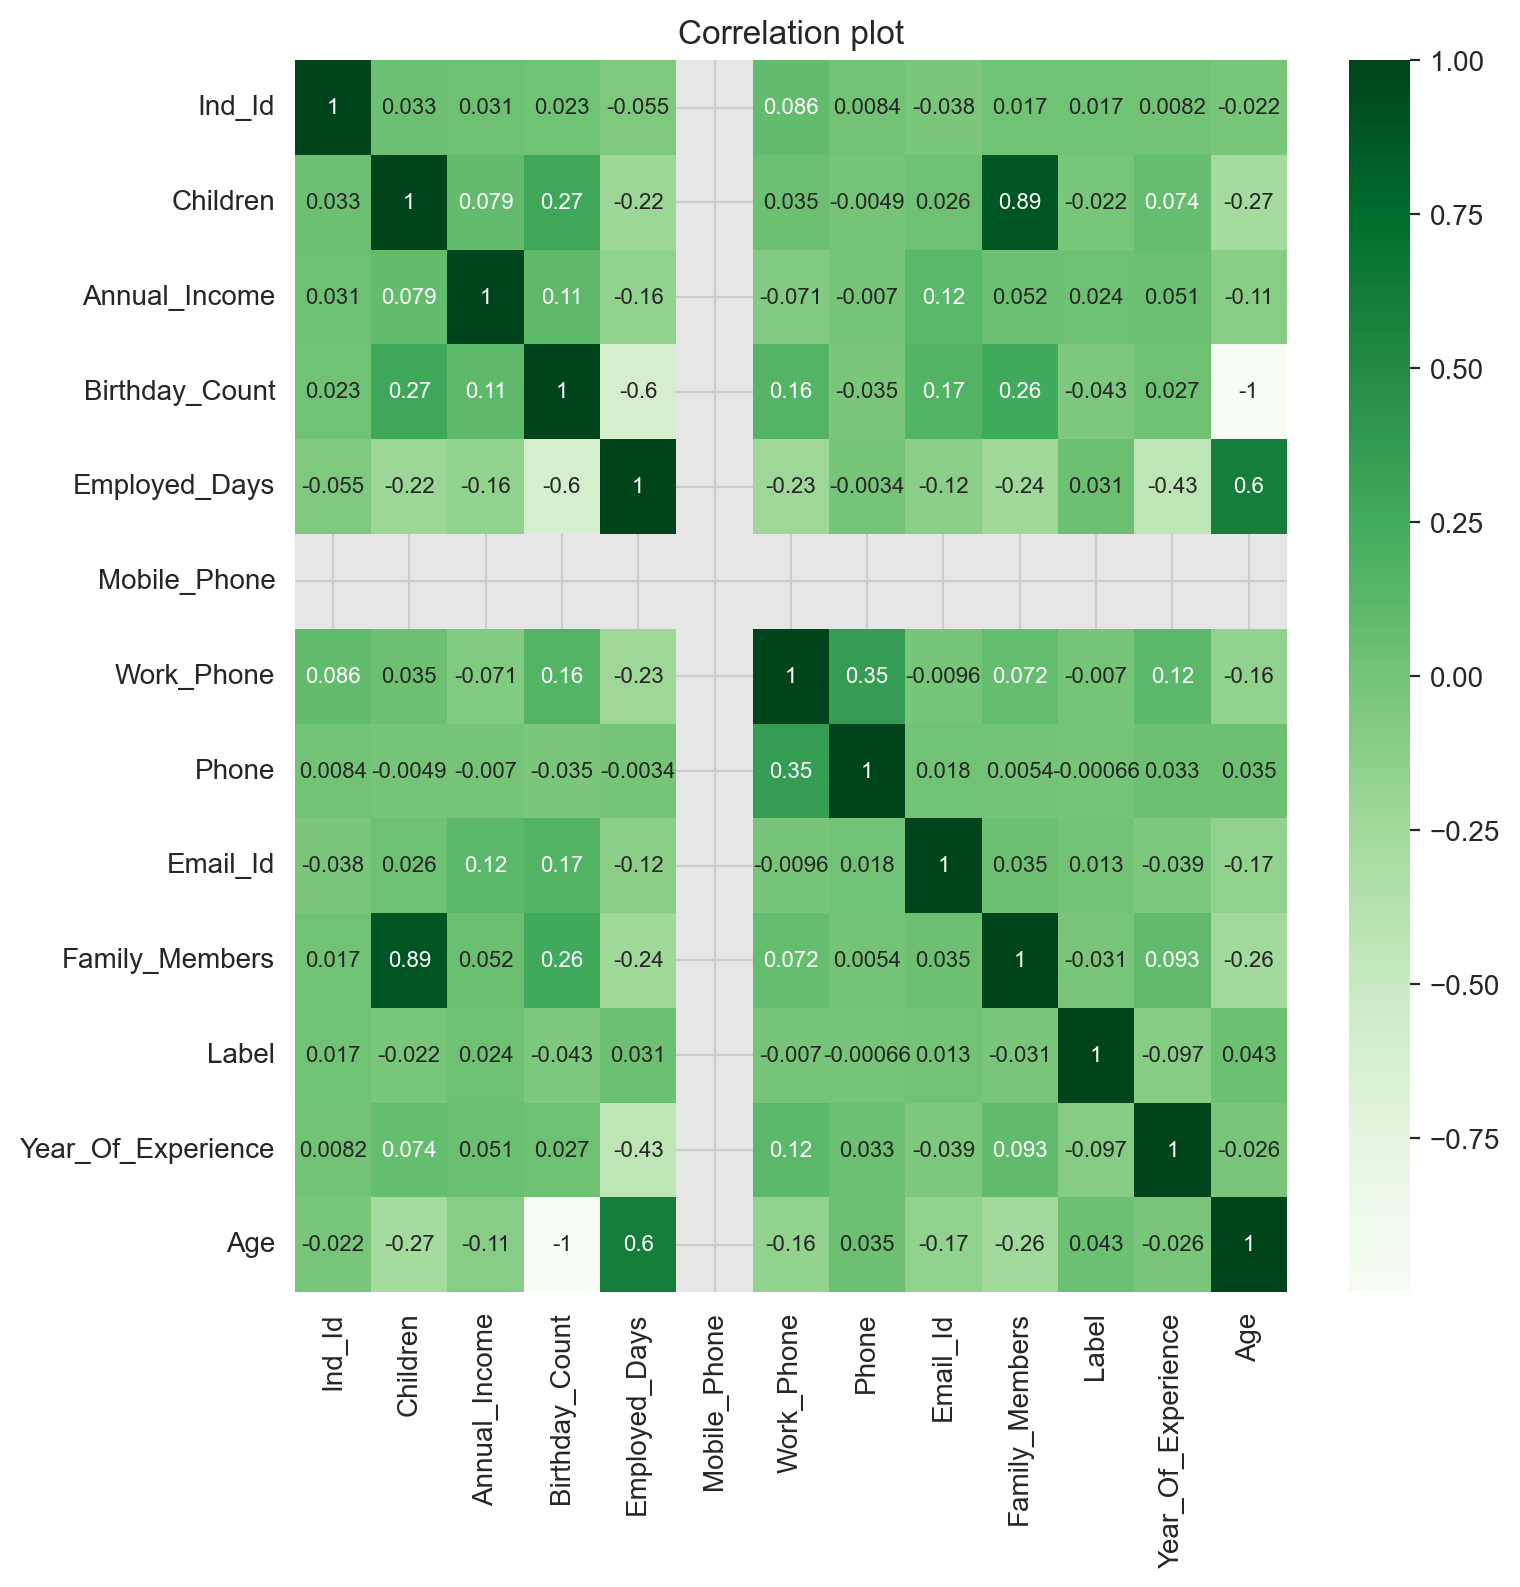

In [78]:
# visualising correlation- heatmap
 
plt.figure(figsize=(8,8))
sns.heatmap(credit_card.corr(numeric_only=True), annot= True, cmap= "Greens", annot_kws={"size" : 8})
plt.title('Correlation plot', loc = "center")
plt.show()
%config InlineBackend.figure_format='retina'


## Insight

- Children and Family_Members are highly correlated

In [79]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

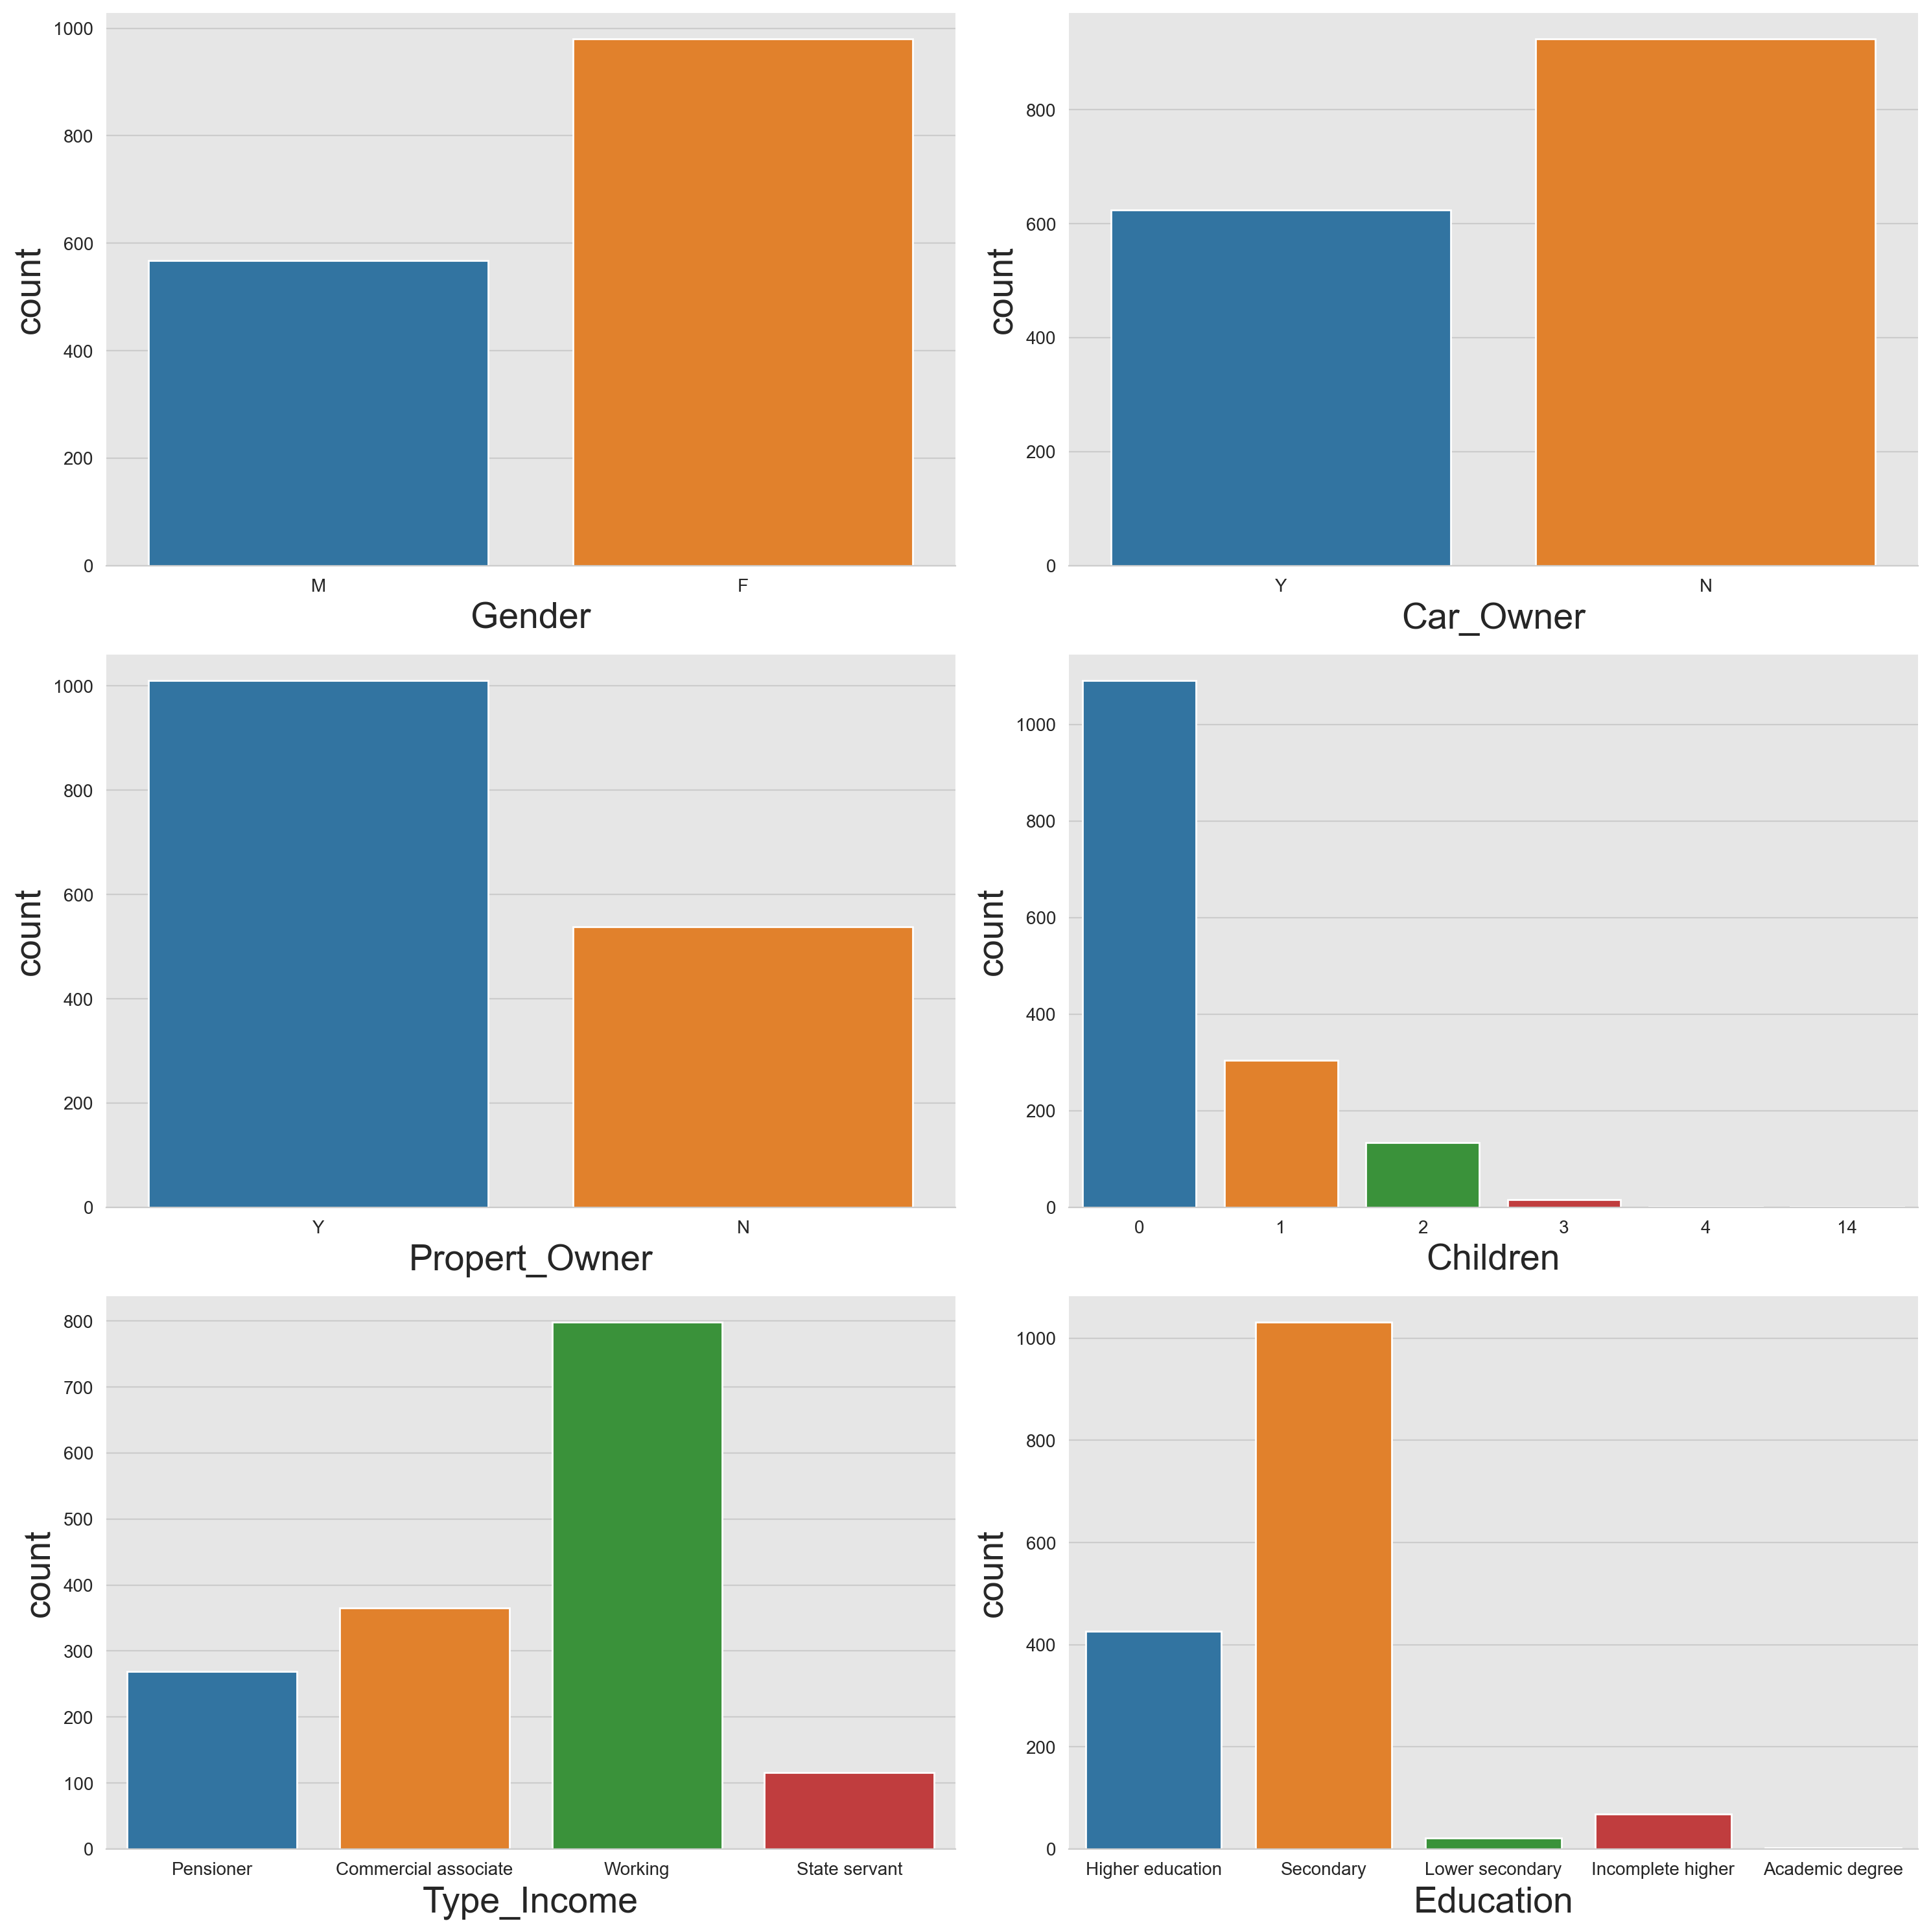

In [80]:
# Checking countplot of columns


col = ['Gender', 'Car_Owner', 'Propert_Owner', 'Children'
       , 'Type_Income', 'Education']



sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (3,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight


- 1. Female users are more than male user(970 approx- F)
- 2. Most of the people doesn't have car (apprx 900)
- 3. Many people are owning their house(approx 1000)
- 4. People having 0 child are more (approx 1030)
- 5. People majorly are 'working' of Type_Income(780 approx), 2nd max - Commercial_associate,Minimum of all- State servannt
- 7. People having Education as 'Secondary' are maximum (1020 approx), Academic Degree are minimum

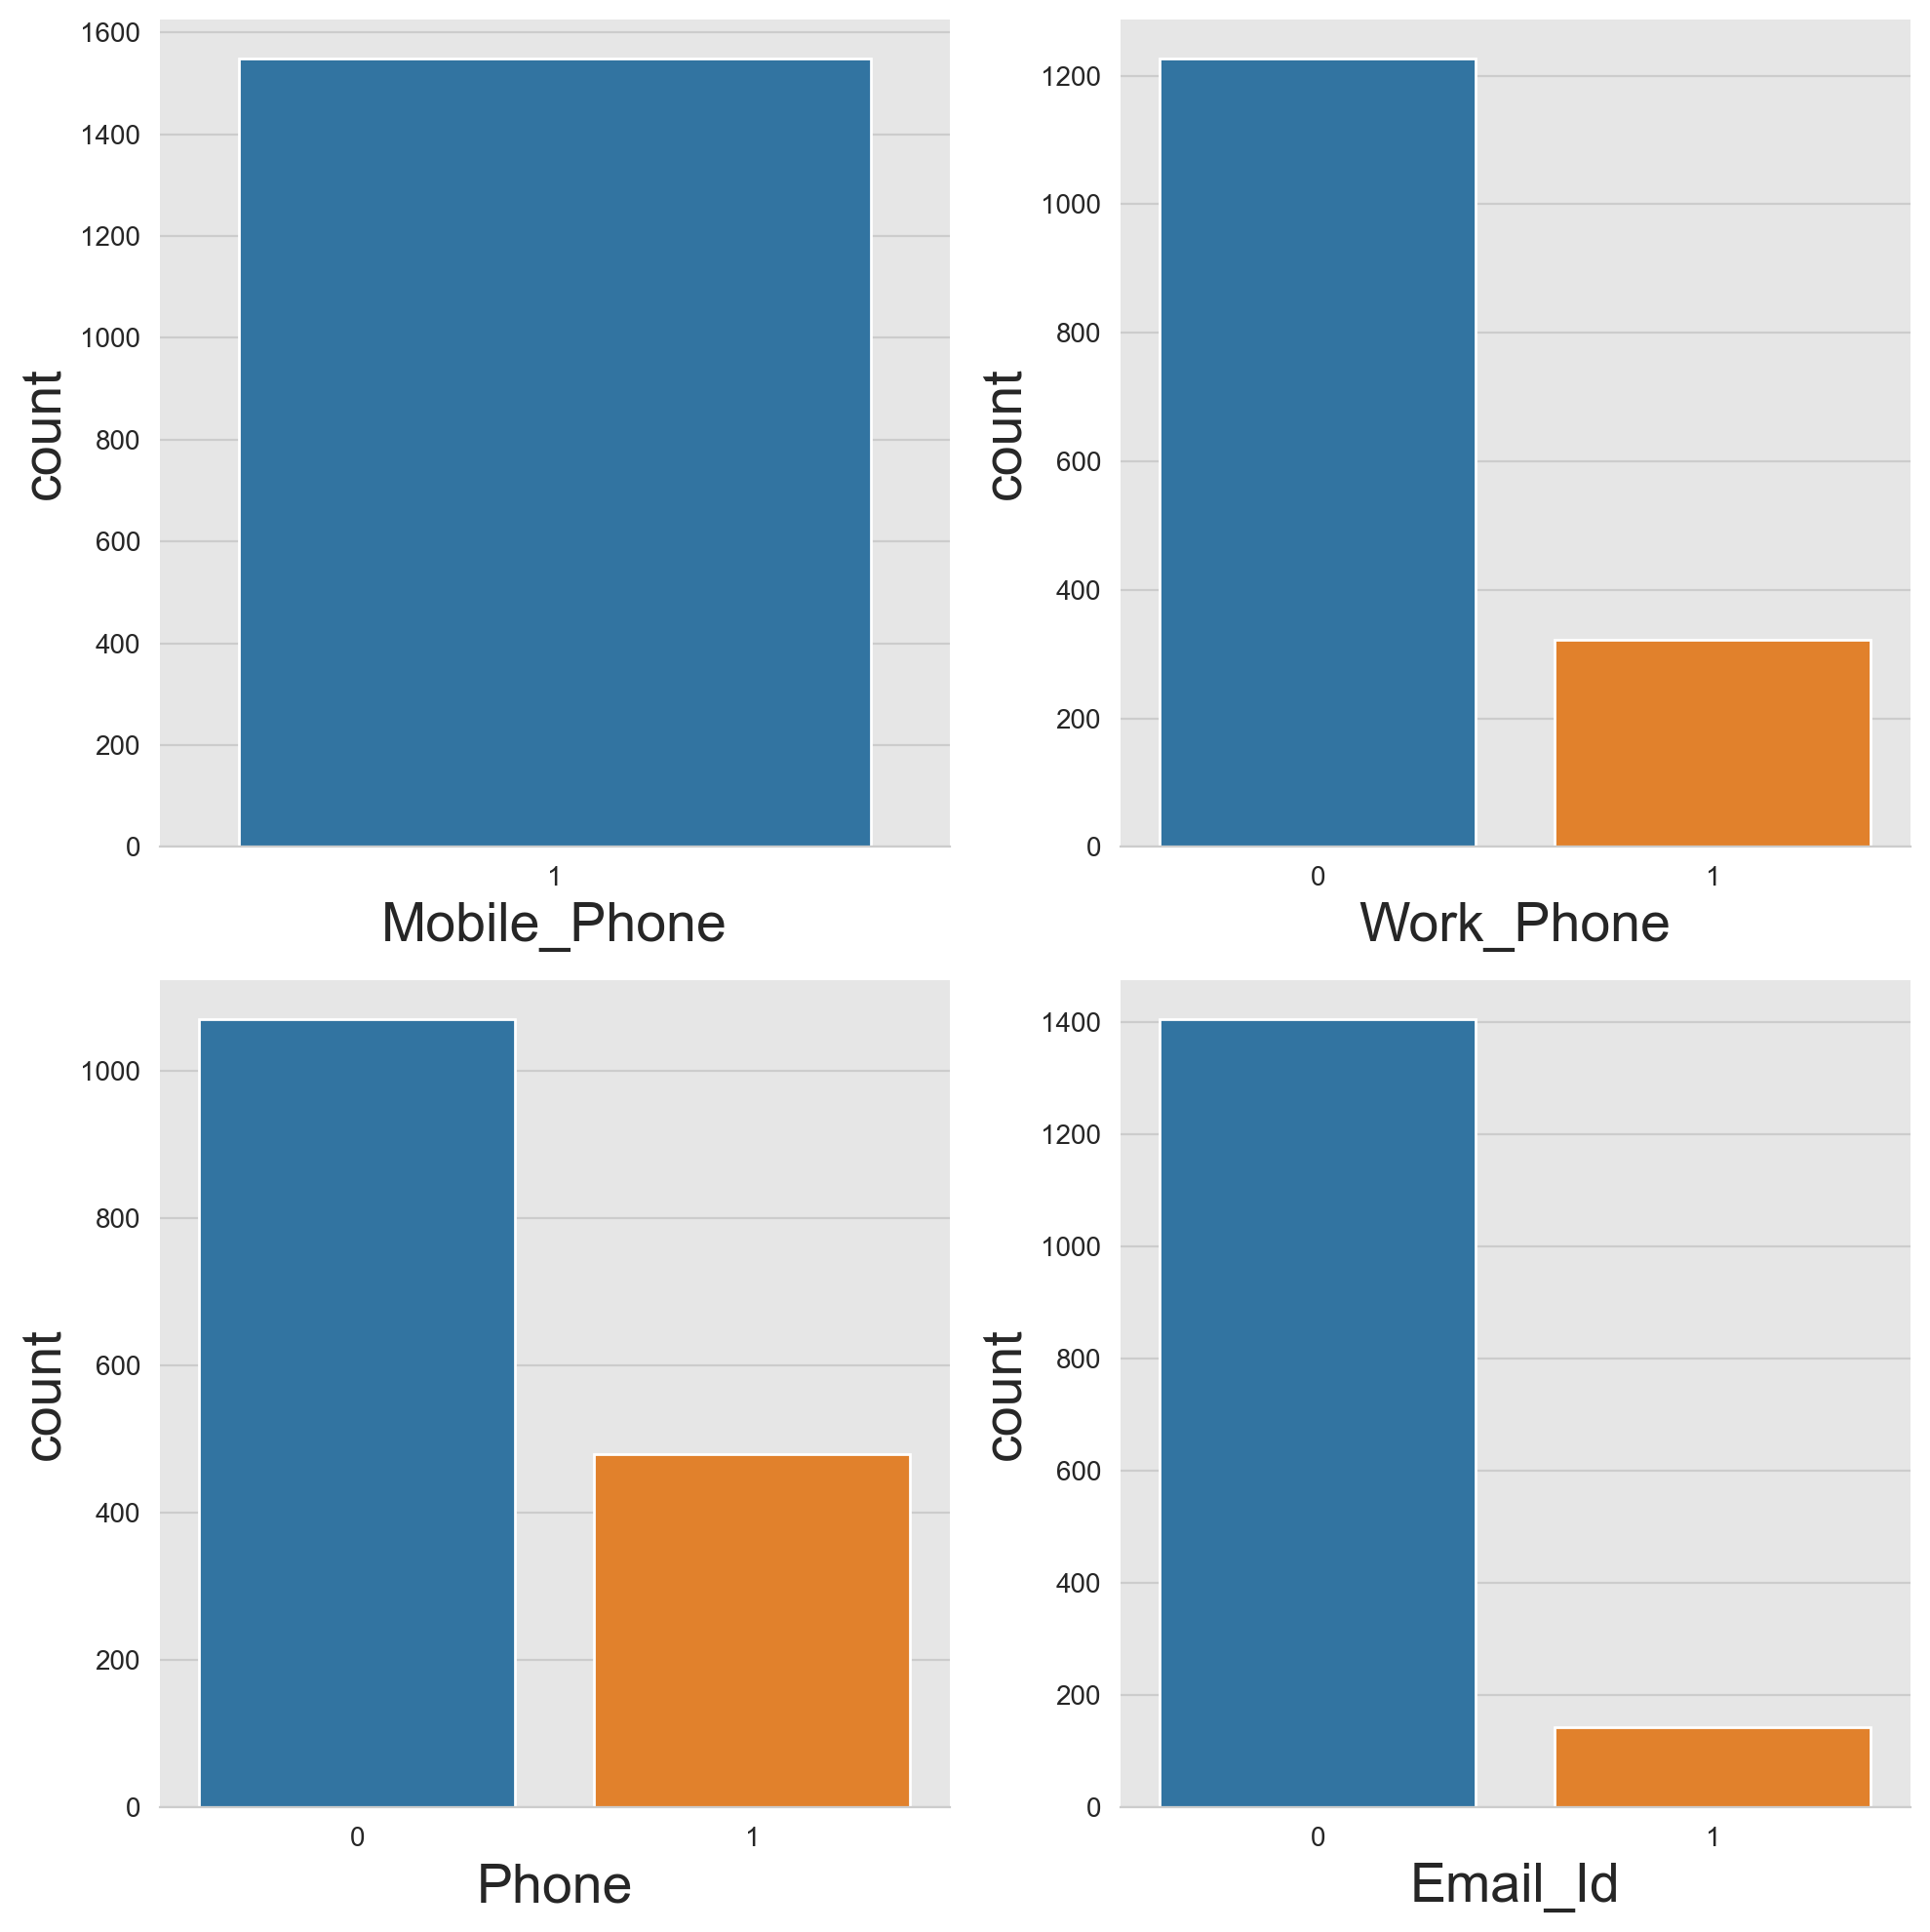

In [81]:
# Checking countplot of columns

col=['Mobile_Phone','Work_Phone', 'Phone', 
       'Email_Id']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,10))

for x, y in enumerate (credit_card[col]):

    plt.subplot (2,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [82]:
credit_card['Mobile_Phone'].value_counts()

1    1548
Name: Mobile_Phone, dtype: int64

In [83]:
credit_card['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

In [84]:
credit_card['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

In [85]:
credit_card['Email_Id'].value_counts()

0    1405
1     143
Name: Email_Id, dtype: int64

## Insight




- 1. All People have Mobile_Phone
- 2. 322 People out of 1548 has Work_Phone
- 3. 479 People out of 1548 has Phone
- 4. 143 People only using email out of 1548 people

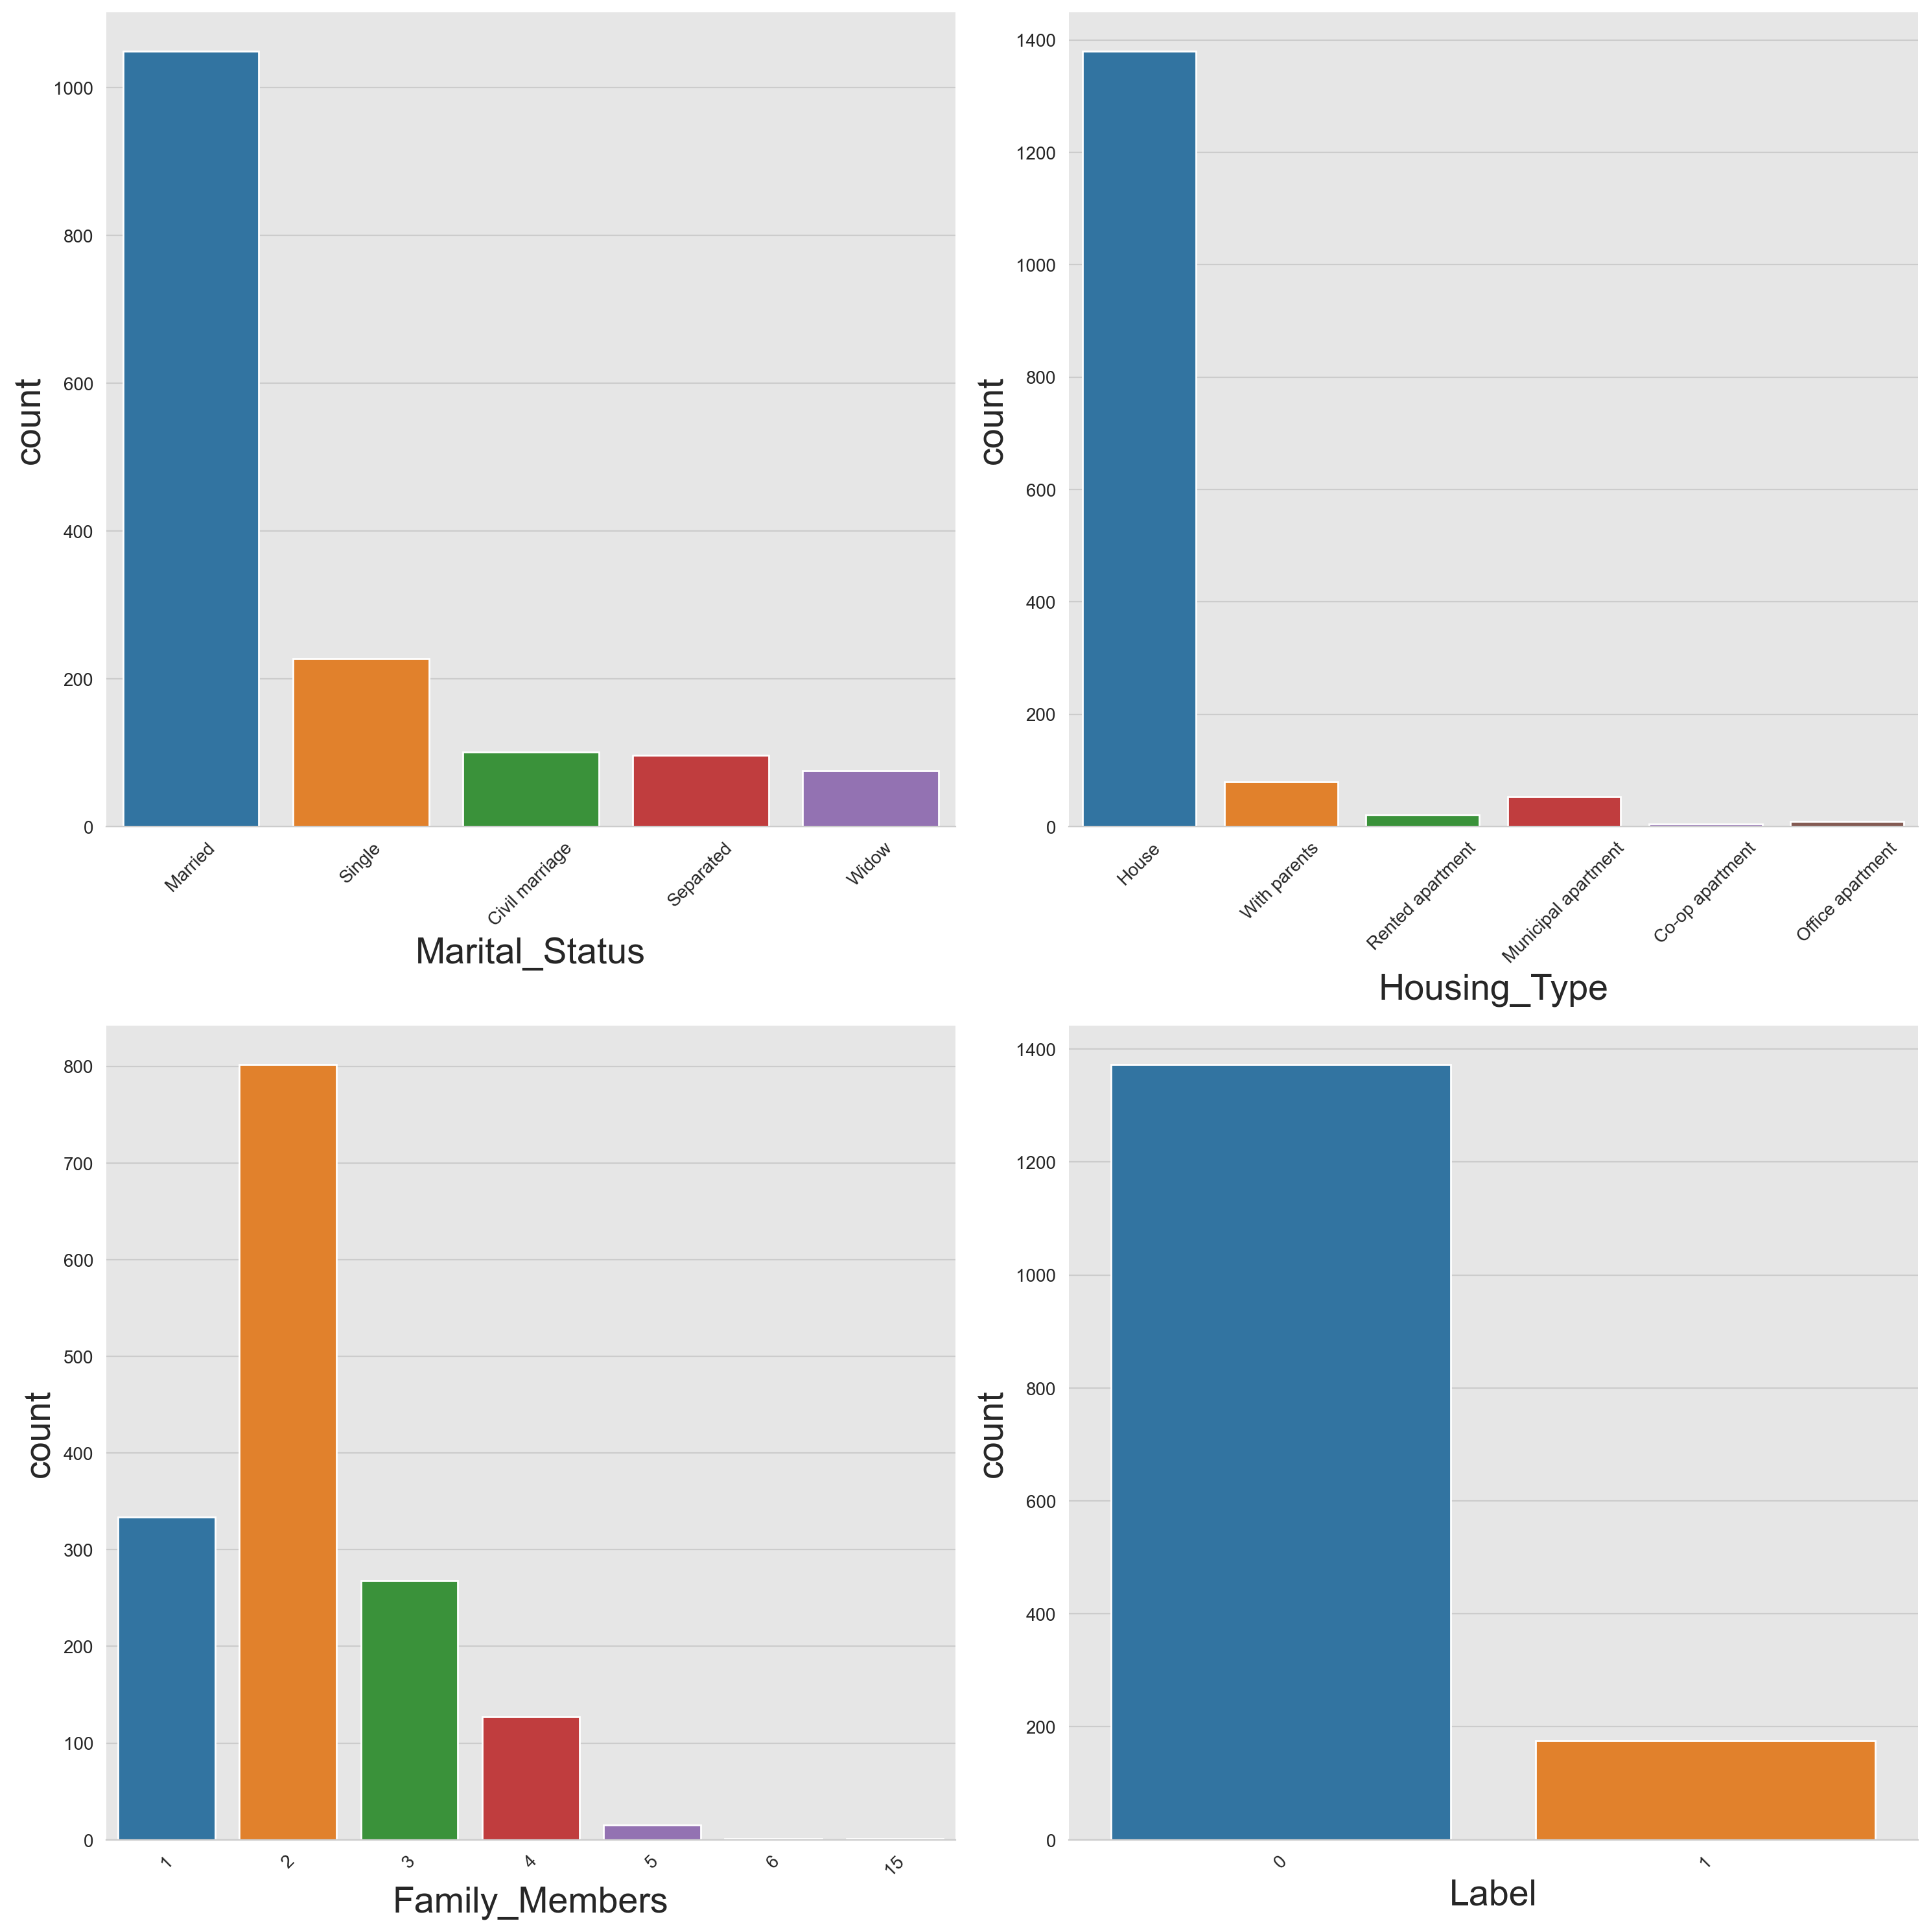

In [86]:
# Checking countplot of columns

col=['Marital_Status',
       'Housing_Type', 'Family_Members', 'Label']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (2,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    plt.xticks(rotation =45)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight



- 1. Most people are married
- 2. Most people have houses, co-op aparment people are less
- 3. Mostly family consists of 2 people, Family having 5 people are lesser
- 4. Approved applications are more than rejected ,(data is imbalanced)

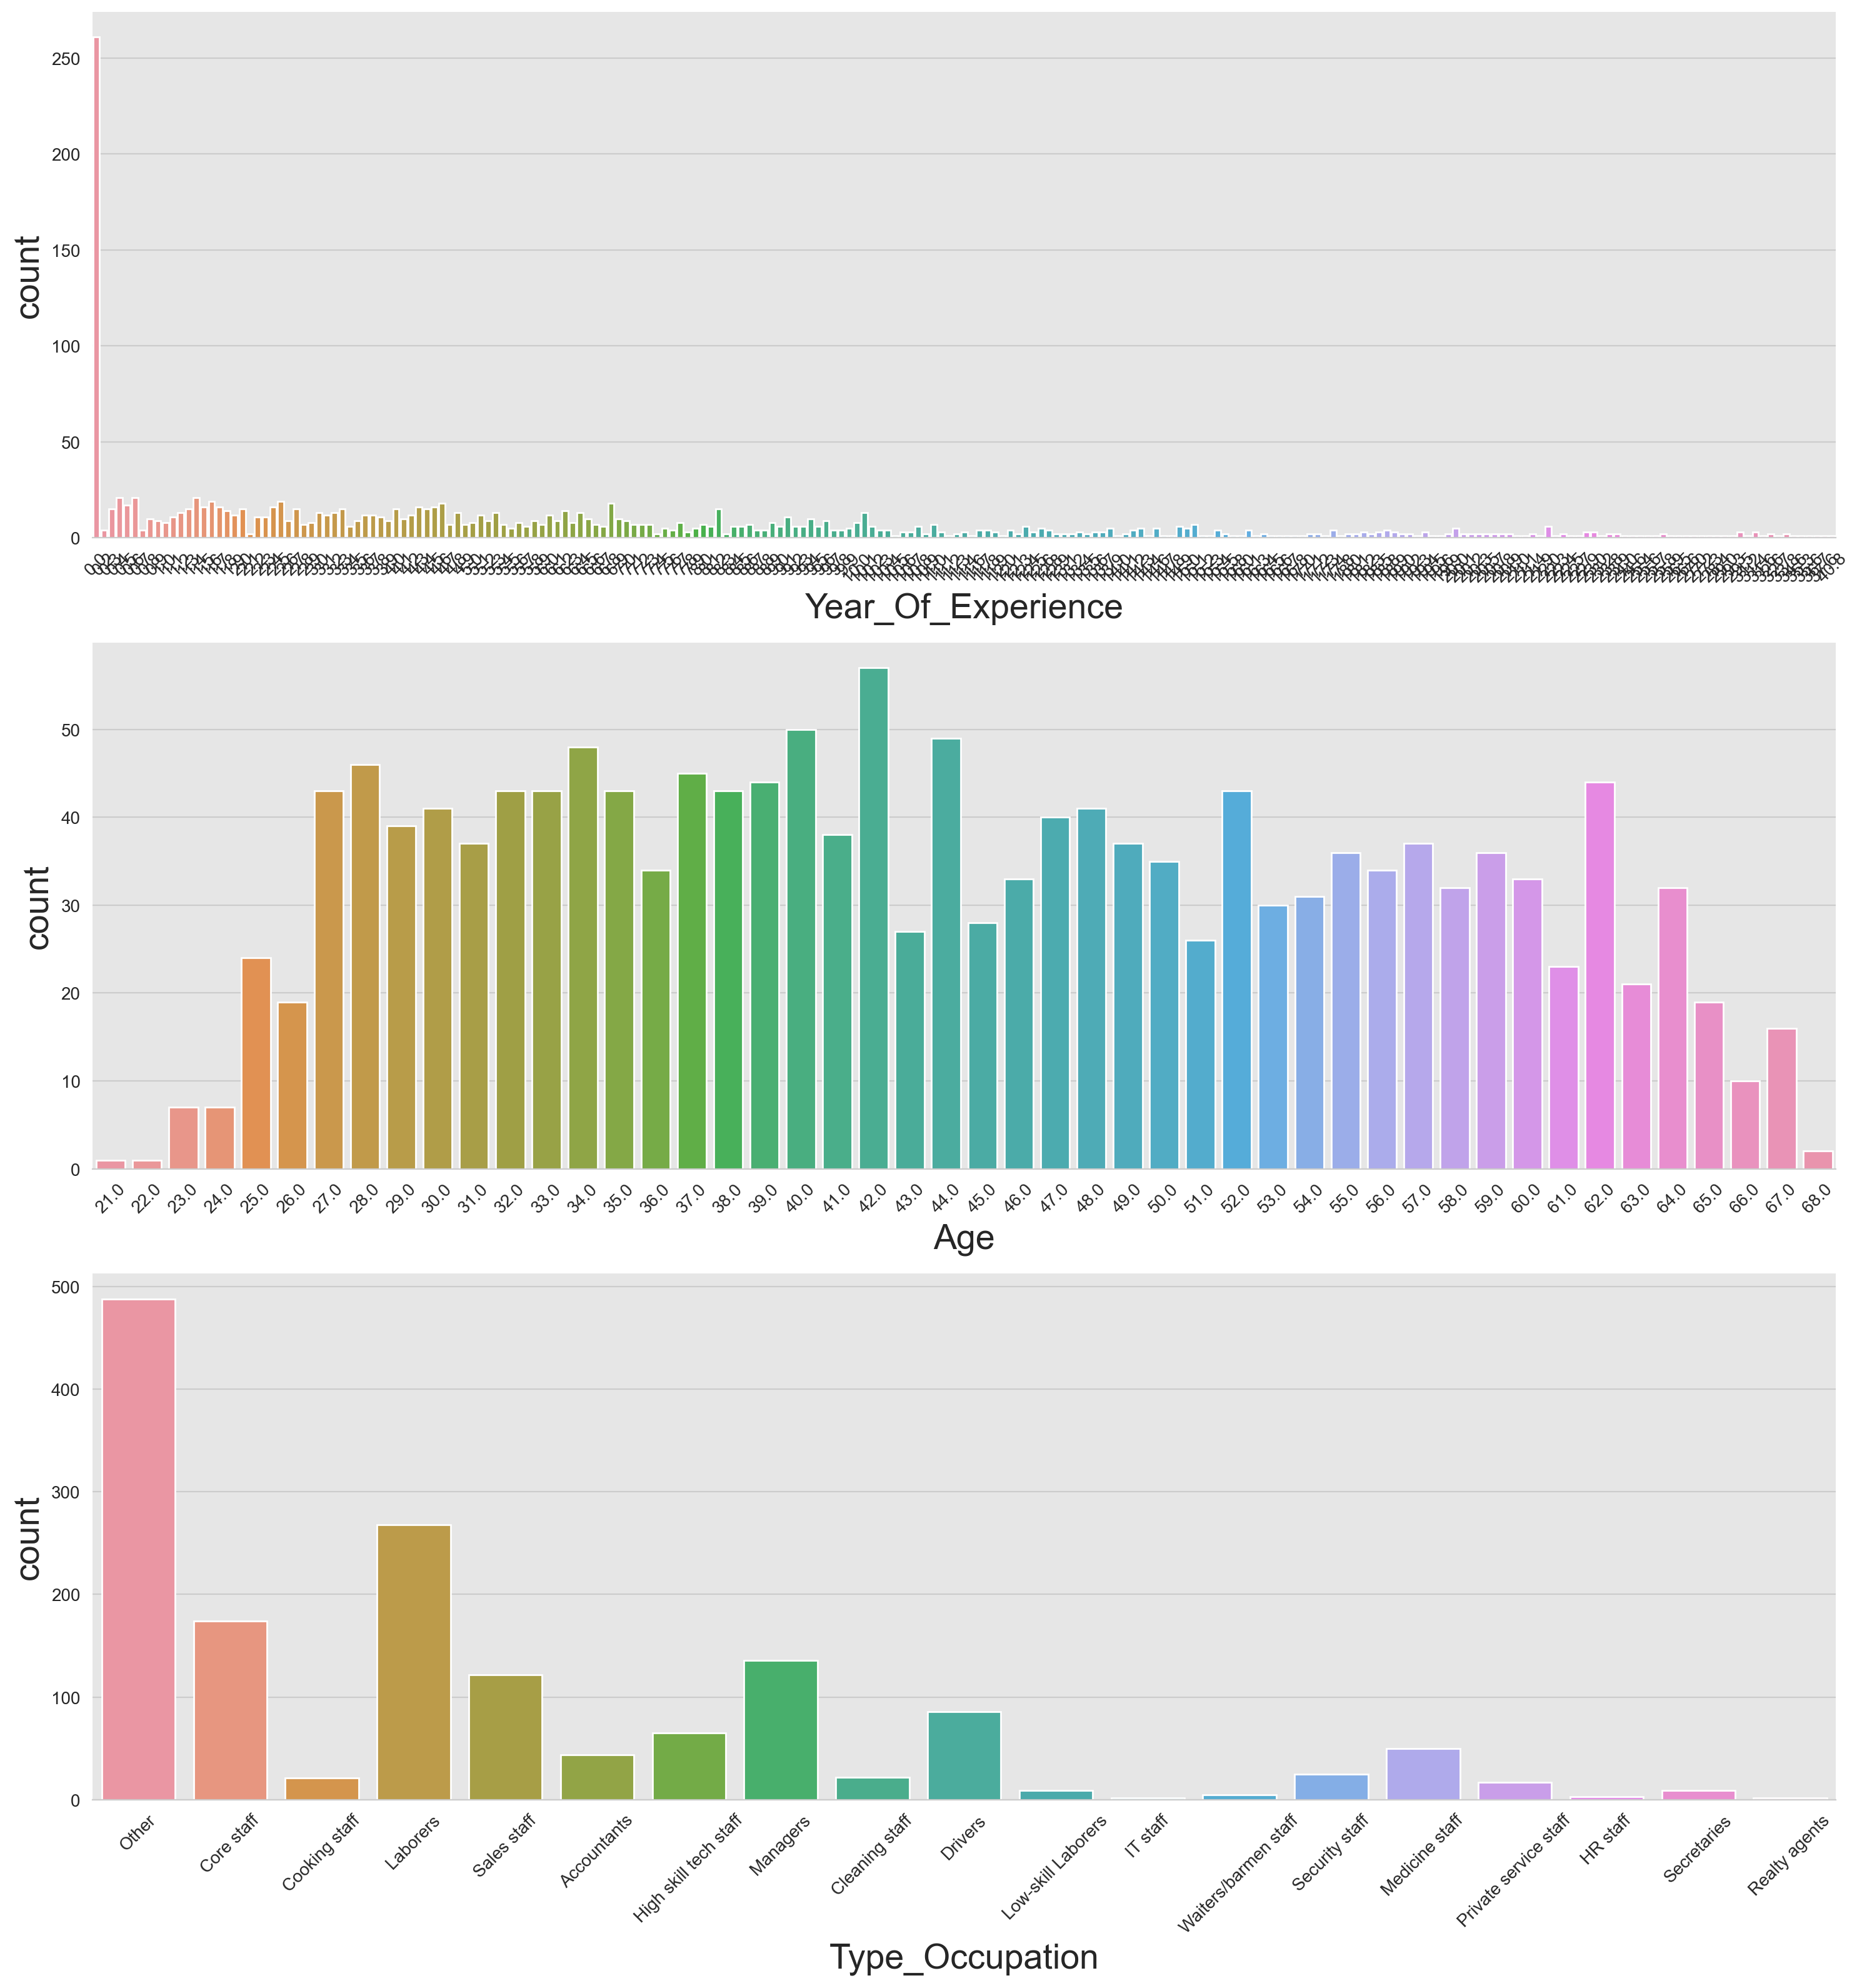

In [87]:
# Checking countplot of columns

col=['Year_Of_Experience','Age','Type_Occupation']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (3,1, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    plt.xticks(rotation =45)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [88]:
credit_card['Year_Of_Experience'].max()

40.8

## Insight

- 1. People with '0' experience are more, max experience is 40.8 Years
- 2. 21,22 Age people are lesser and 42 Age people are maximum , mostly people are in range 27-60 Age
- 3. 'Other' -Type_Occipation is maximim, 2nd max is Laborers

In [89]:
credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

In [90]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

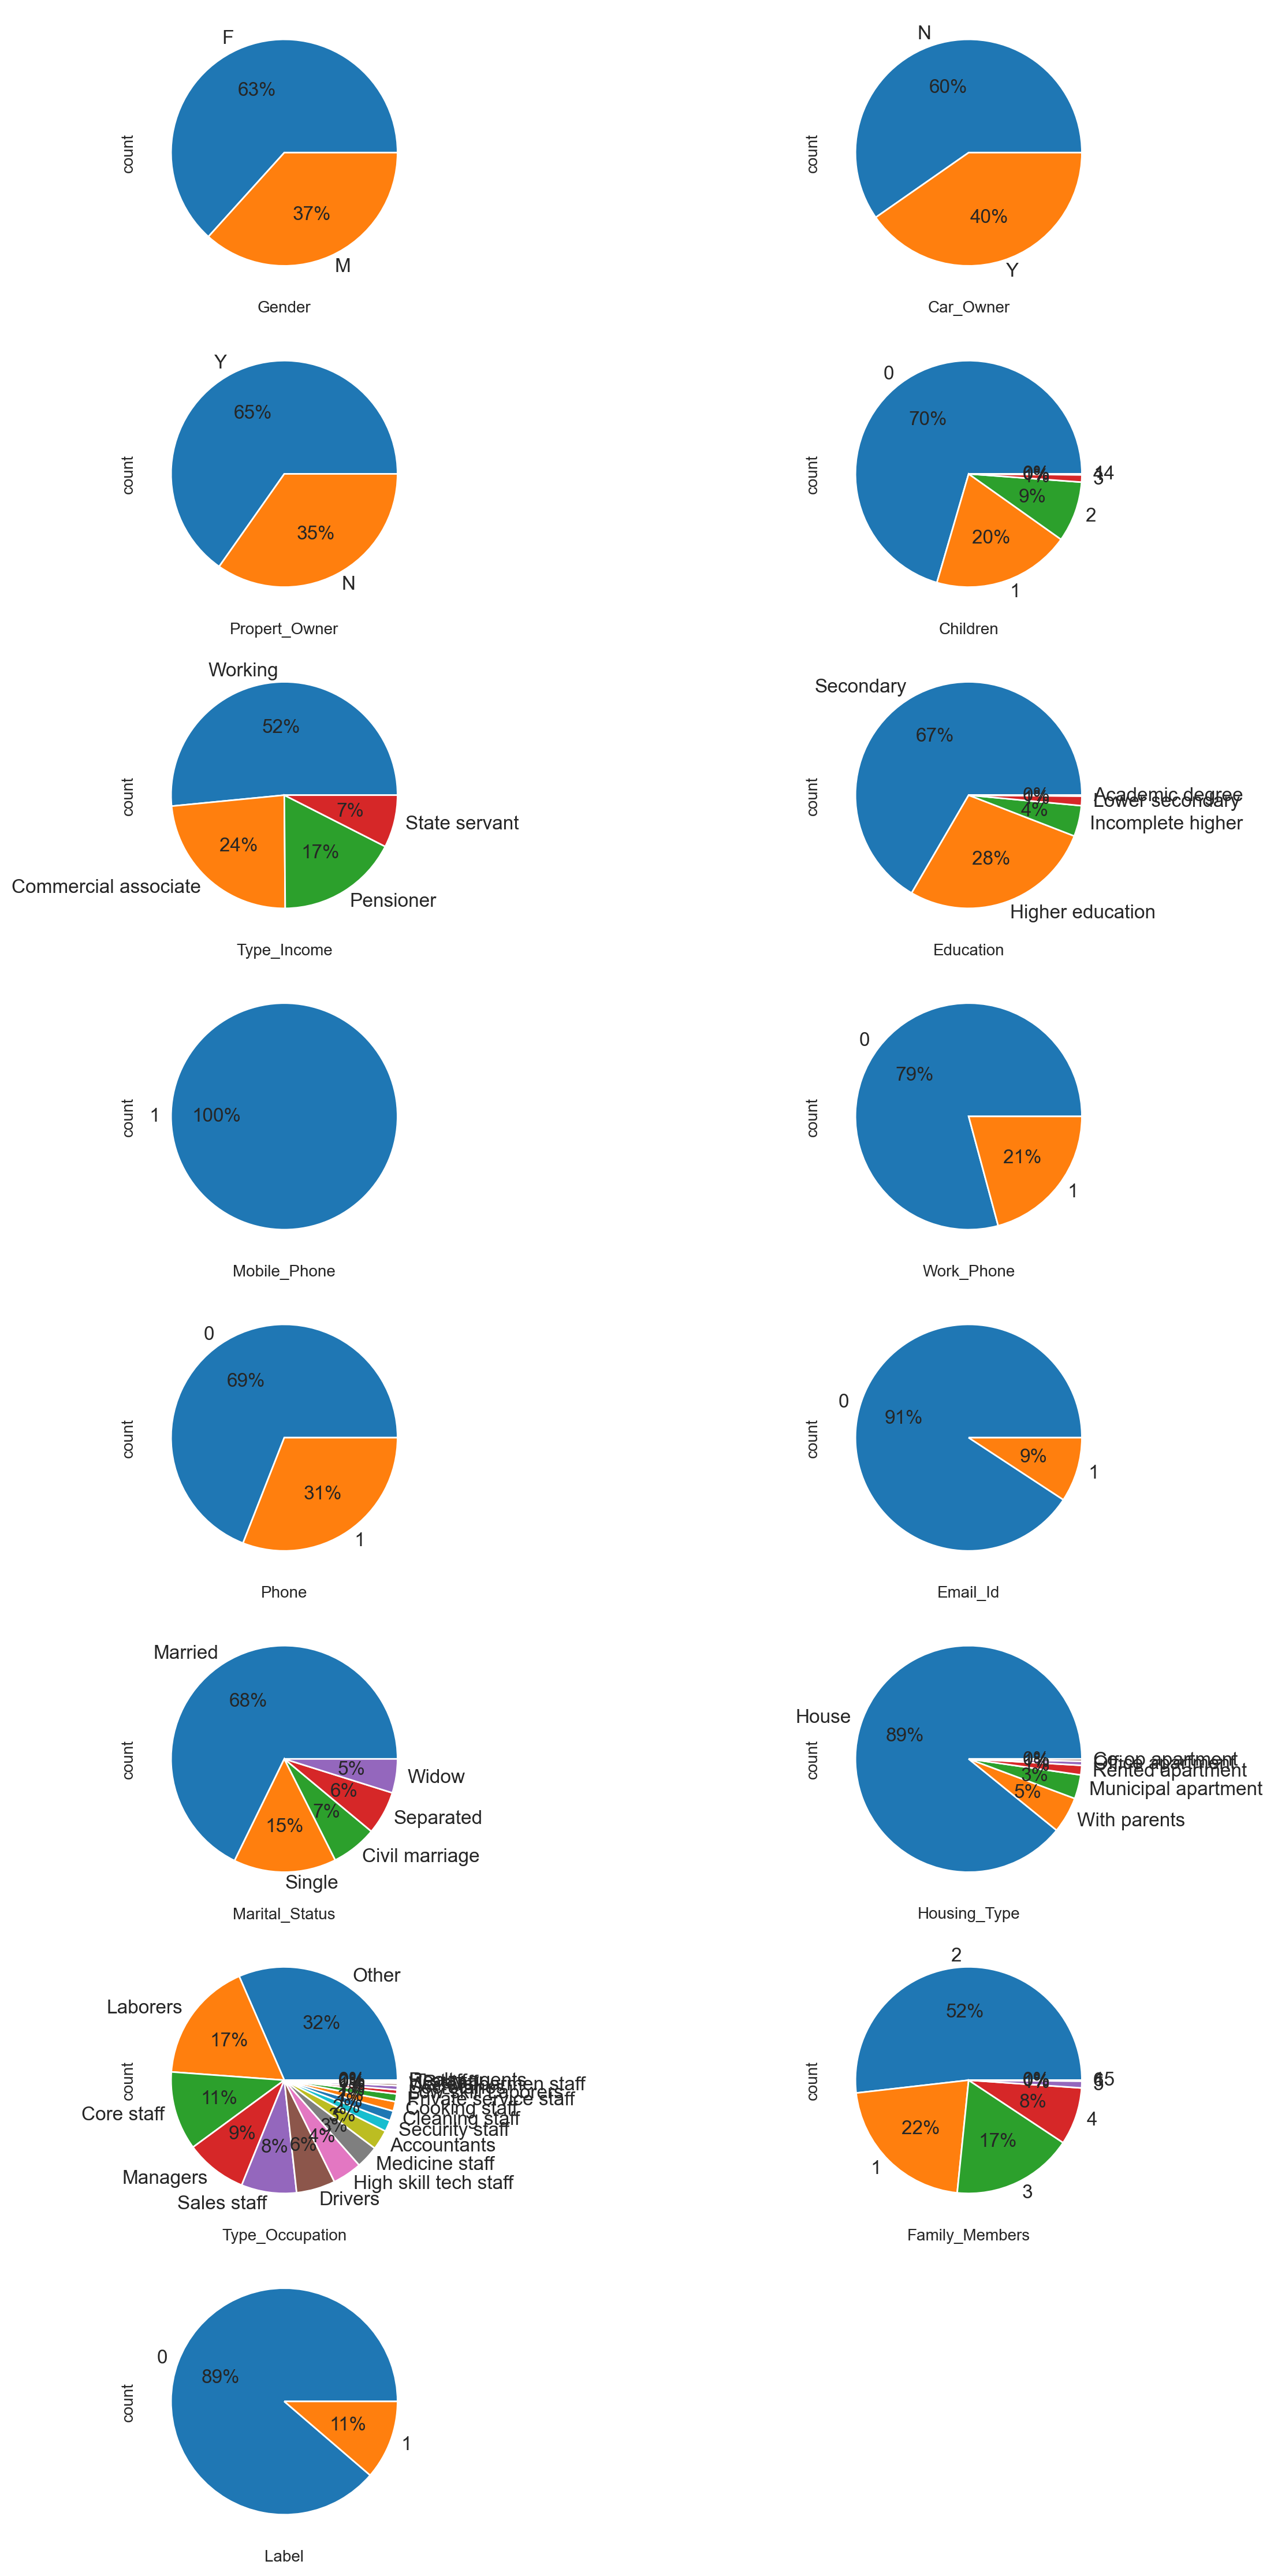

In [91]:
# Checking Pie chart for finding percentage values in each categorical column

col= ['Gender', 'Car_Owner', 'Propert_Owner', 'Children','Type_Income', 'Education','Mobile_Phone','Work_Phone', 'Phone', 
       'Email_Id','Marital_Status',
       'Housing_Type','Type_Occupation','Family_Members', 'Label']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,25))

for x, y in enumerate (credit_card[col]):

    plt.subplot (9,2, x+1)
    plt.pie(x=credit_card[y].value_counts(),labels = credit_card[y].value_counts().index, autopct='%.0f%%',textprops={'fontsize': 12})
    plt.tight_layout()
    plt.xlabel(y,fontsize=10)
    plt.ylabel('count',fontsize=10)
    sns.despine(left=True)
  
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight


- 1. 63% are females in given data
- 2. 60% People not owning car
- 3. 65% People own property
- 4. 70% people having no child
- 5. 52% People are working ,24 % are Commercial associate, 17% are pensioners
- 6. 67% people are Secondary qualified
- 7. All People have mobile phone
- 8. 21% people have work_phone
- 9. 31% People have phone
- 10. only 9% people use email_id
- 11. 68% people are married and 15% single
- 12. 89% people having their house, 5% are living with parents
- 13. 32 % are in other category of Type_Occupation, 17% are Laborers
- 13. 52% people have 2 members only in family 
- 14. 89% Applications have been approved for credit card

## Section 1.

Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

How is it going to impact the banking sector? 

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

 

## 3. Does male credit card application has more approval as compared to female ?

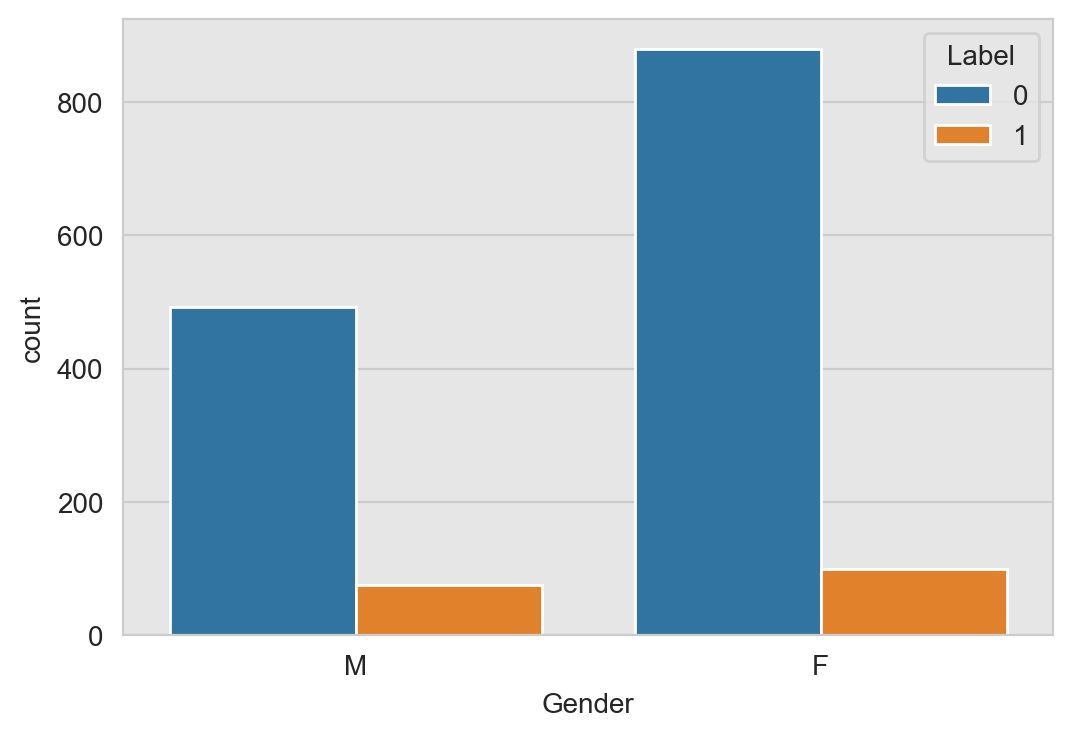

In [92]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Gender'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


- Females are having more no. of approvals than male

## 4. Having car makes the person eligible for credit card ?

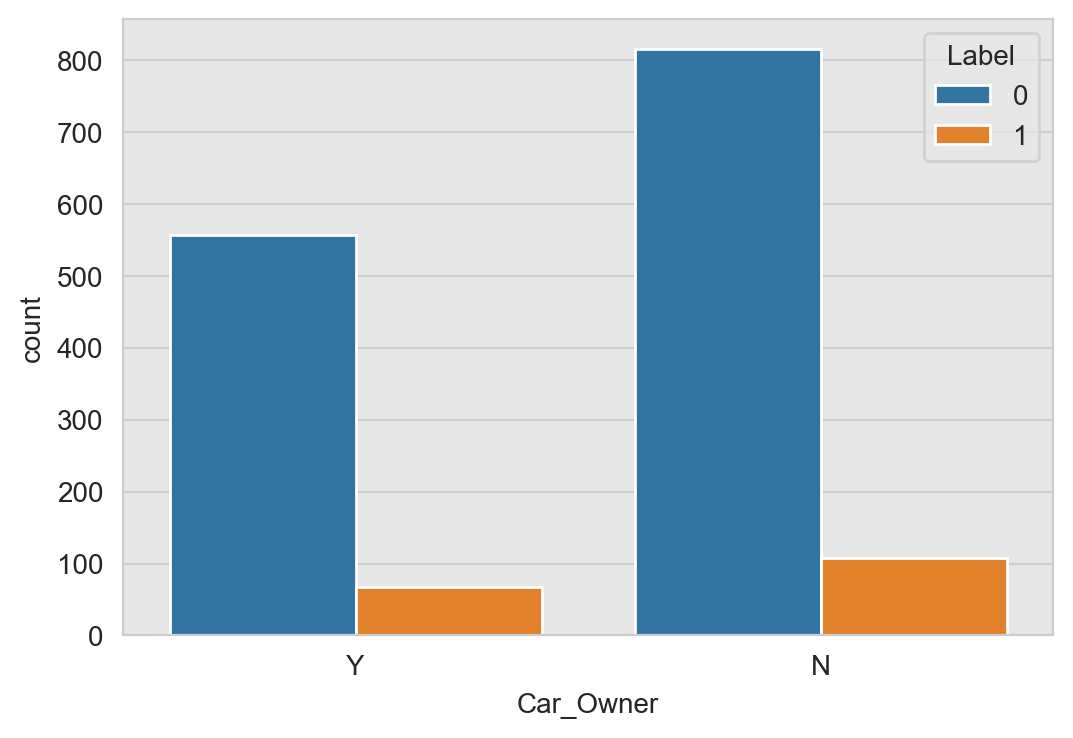

In [93]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Car_Owner'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- Not having car also having high approvals of credit card - having or not having car doesn't affect approval

## 5. Having property makes the person eligible for credit card ?

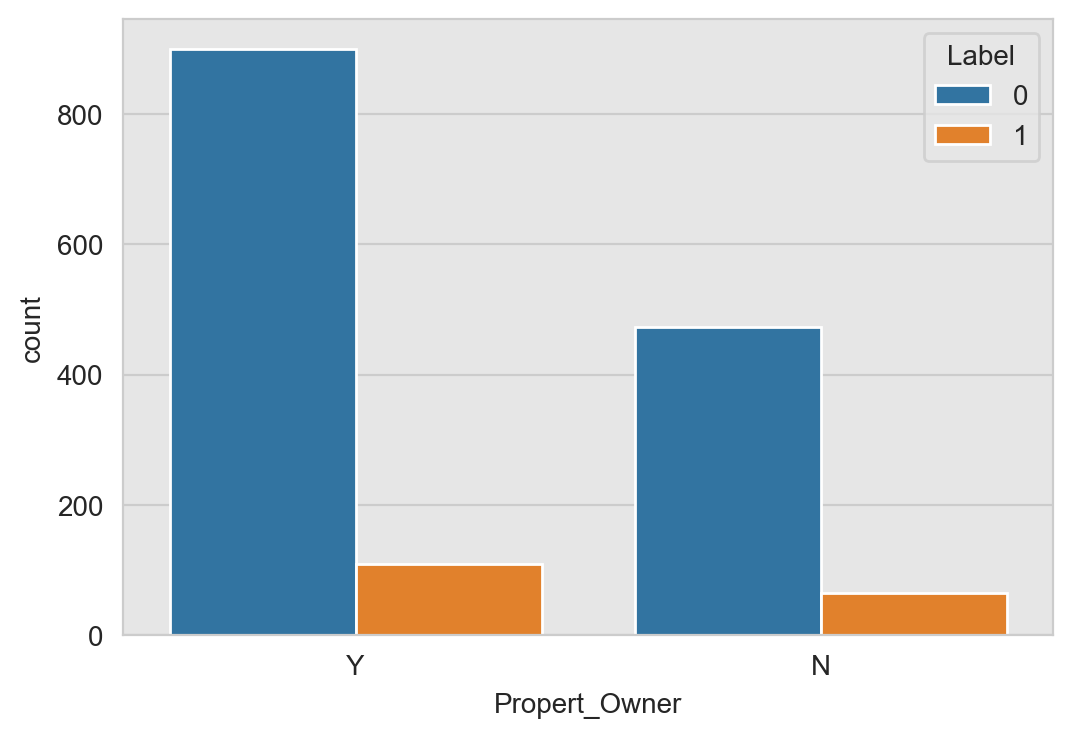

In [94]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Propert_Owner'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- People who own property are having approval more than not having property
- All property owner not having approval yet

## 6. What is the age range of most approved credit card applications ?

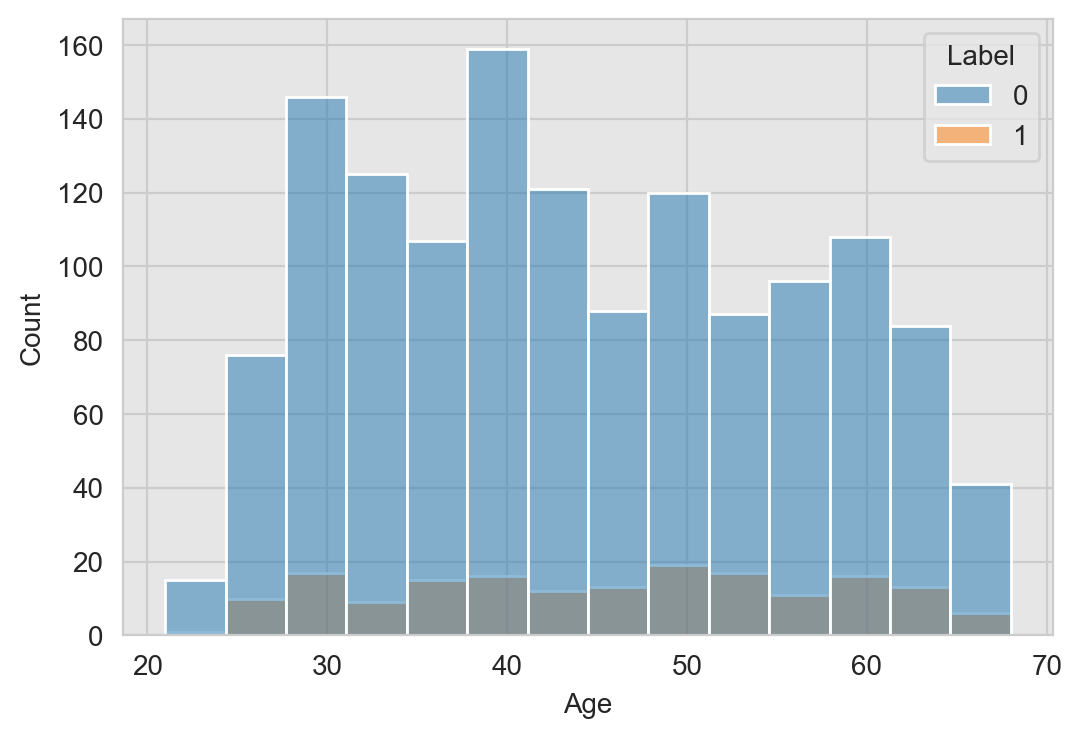

In [95]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.histplot(x=credit_card['Age'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- 25-65 years of people are using credit card mostly
- 20-25 years age people are using less credit cards


## 7. Pensioner would not be using credit card, Hence application will not be approved.

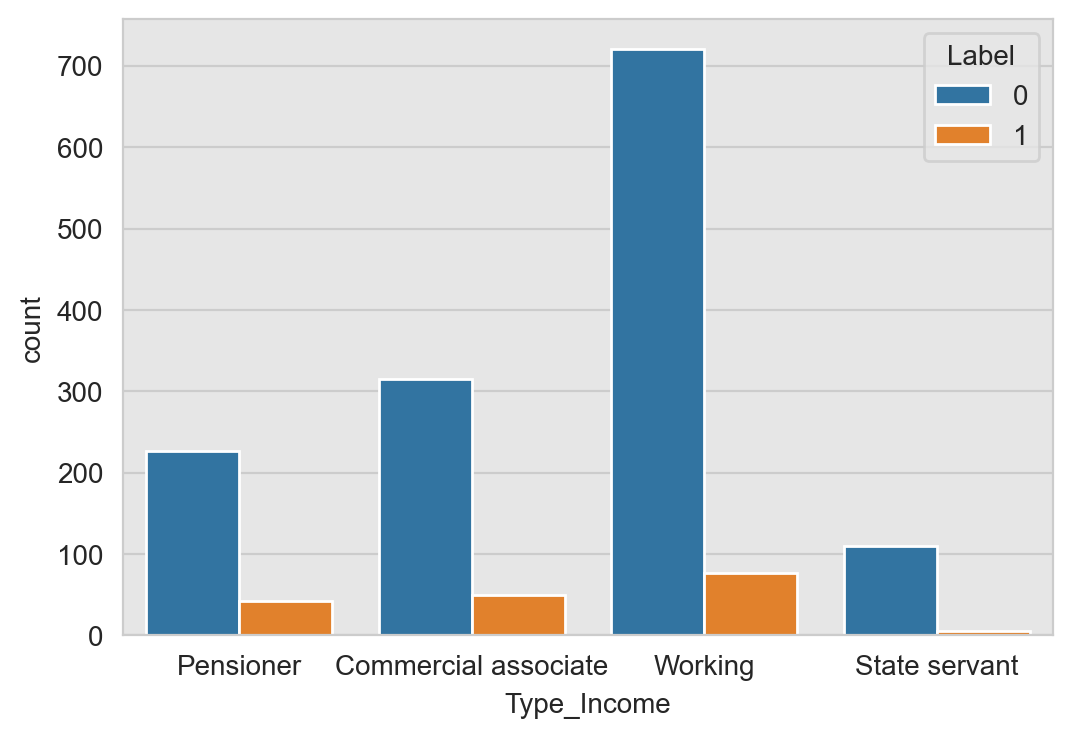

In [96]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Type_Income'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- 1. Pensioner are using credit cards also
- 2. 'Working' class has more approval of credit card
- 2. 'State servant' class has no rejection
- 3. rate of approval is 100% in 'State servant class'

## 8. In which Type_Income catgory male and female are working ?

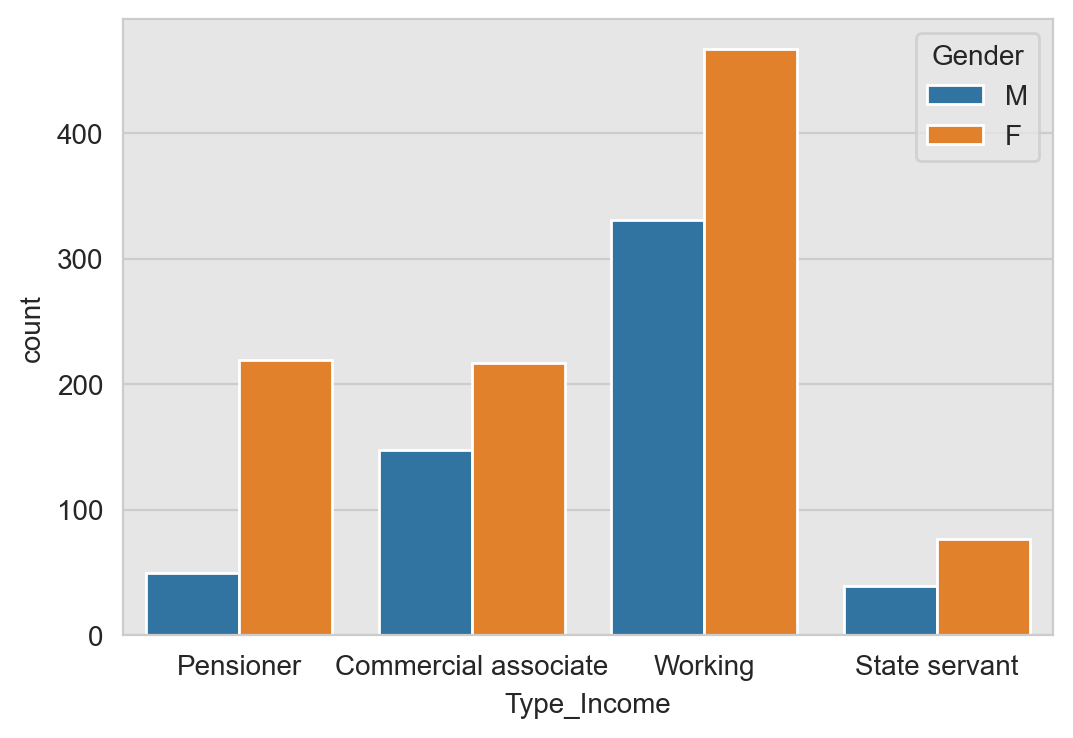

In [97]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Type_Income'],hue=credit_card['Gender'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- In each "Type_Income" category Female are more as compared to Male


## 9. More no. of Married people credit card applications gets approved as compared to unmarried ?

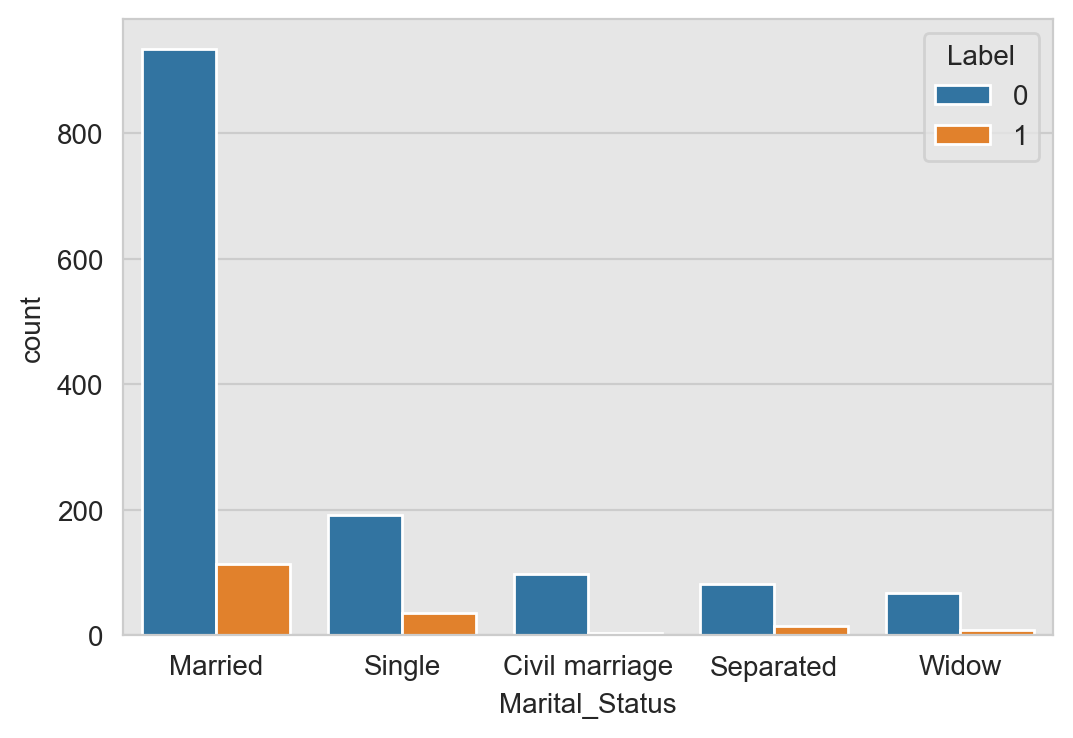

In [98]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Marital_Status'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

In [99]:
total_married=credit_card['Marital_Status'][credit_card['Marital_Status']=='Married'].value_counts()
married_with_approved_card=credit_card[(credit_card['Label']==0) & (credit_card['Marital_Status']=='Married')]['Marital_Status'].value_counts()

In [100]:
married_card_approval_rate=(married_with_approved_card/total_married)*100
married_card_approval_rate

Married    89.132507
Name: Marital_Status, dtype: float64

In [101]:
total_single=credit_card['Marital_Status'][credit_card['Marital_Status']=='Single'].value_counts()
single_with_approved_card=credit_card[(credit_card['Label']==0) & (credit_card['Marital_Status']=='Single')]['Marital_Status'].value_counts()

In [102]:
single_card_approval_rate=(single_with_approved_card/total_single)*100
single_card_approval_rate

Single    84.581498
Name: Marital_Status, dtype: float64

## Insight

- married people approval rate is 89%
- single people card approval rate is 84.5%
- civil marriage card approval rate is 100%

## 10. What is min income required to get credit card ?

In [103]:
# minimum income of people for approval of credit card

min_income_for_approval=credit_card['Annual_Income'][(credit_card['Label']==0) & (credit_card['Annual_Income']==credit_card['Annual_Income'].min())]

In [104]:
min_income_for_approval

1038    33750.0
Name: Annual_Income, dtype: float64

# 11. Is there any family which only has children living alone ?


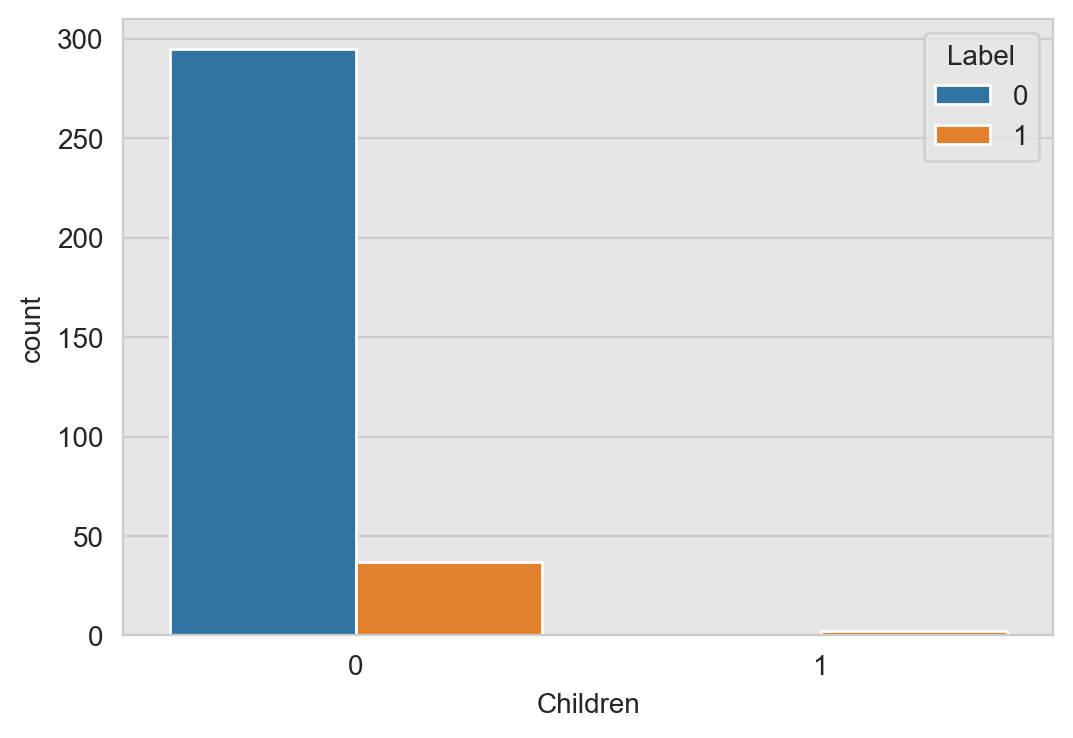

In [105]:


card_FM_one= credit_card[credit_card['Family_Members']==1] # data having one family member only


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=card_FM_one['Children'],hue=card_FM_one['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


In [106]:
card_FM_one['Children'].value_counts()

0    332
1      2
Name: Children, dtype: int64

- There are 2 children who are living alone with approved credit card

# 12. As per family_member counts which category is having more approved cards ?

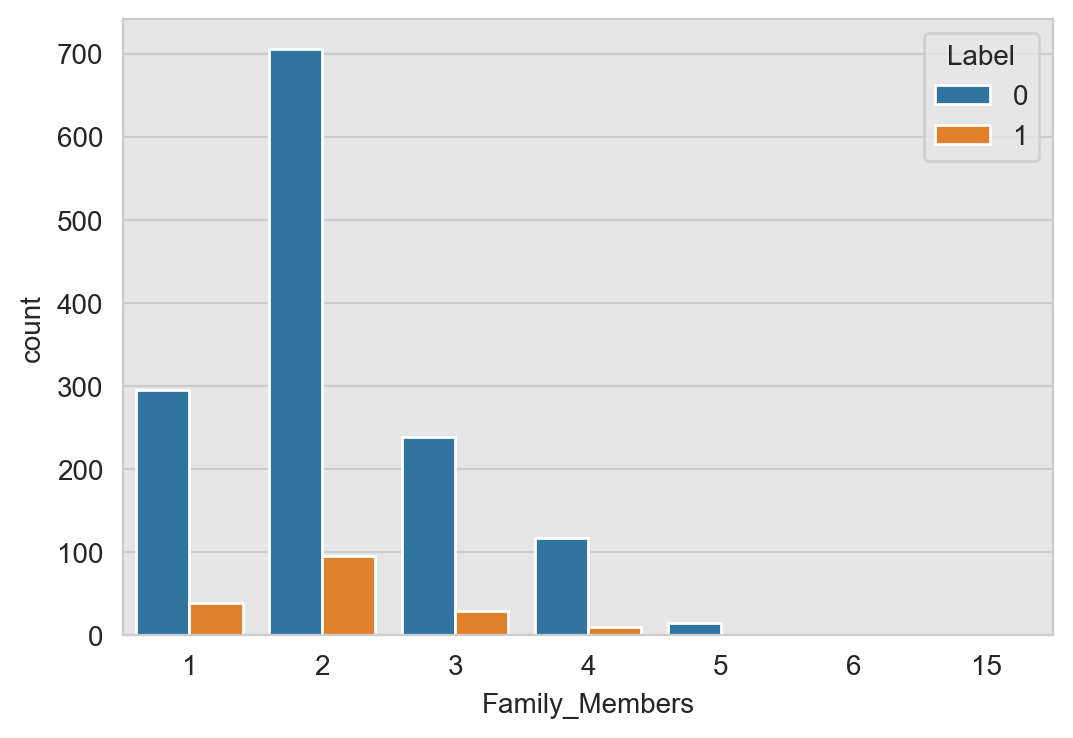

In [107]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Family_Members'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


- Family_Members having 2 members are having more approved cards than others

In [108]:
# credit card data which has approved applications only

Card_approval_data = credit_card[credit_card['Label']==0]

In [109]:
Card_approval_data.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
175  5118538      F         N             Y         1        81000.0   
176  5069057      M         Y             N         0       225000.0   
177  5066689      F         N             Y         0       180000.0   
178  5086062      F         N             Y         0       135000.0   
179  5113717      F         N             N         1       135000.0   

              Type_Income         Education  Marital_Status  \
175               Working         Secondary         Married   
176  Commercial associate         Secondary         Married   
177  Commercial associate  Higher education  Civil marriage   
178         State servant         Secondary         Married   
179               Working         Secondary         Married   

            Housing_Type  ...  Employed_Days  Mobile_Phone  Work_Phone  Phone  \
175  Municipal apartment  ...          -6367             1           1      1   
176                House  ...          -2484             1           0      0   
177                House  ...           -341             1           0      1   
178                House  ...          -9422             1           0      1   
179                House  ...          -3054             1           0      0   

     Email_Id        Type_Occupation Family_Members  Label  \
175         0         Cleaning staff              3      0   
176         0               Laborers              2      0   
177         1            Sales staff              2      0   
178         0             Core staff              2      0   
179         1  Private service staff              3      0   

     Year_Of_Experience   Age  
175                17.4  43.0  
176                 6.8  49.0  
177                 0.9  35.0  
178                25.8  56.0  
179                 8.4  45.0  

[5 rows x 21 columns]

In [110]:
# shape of data which has approced applications

Card_approval_data.shape

(1373, 21)

#

## Handling Outliers

In [111]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

In [112]:
# columns of data

credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [113]:
credit_card.shape

(1548, 21)

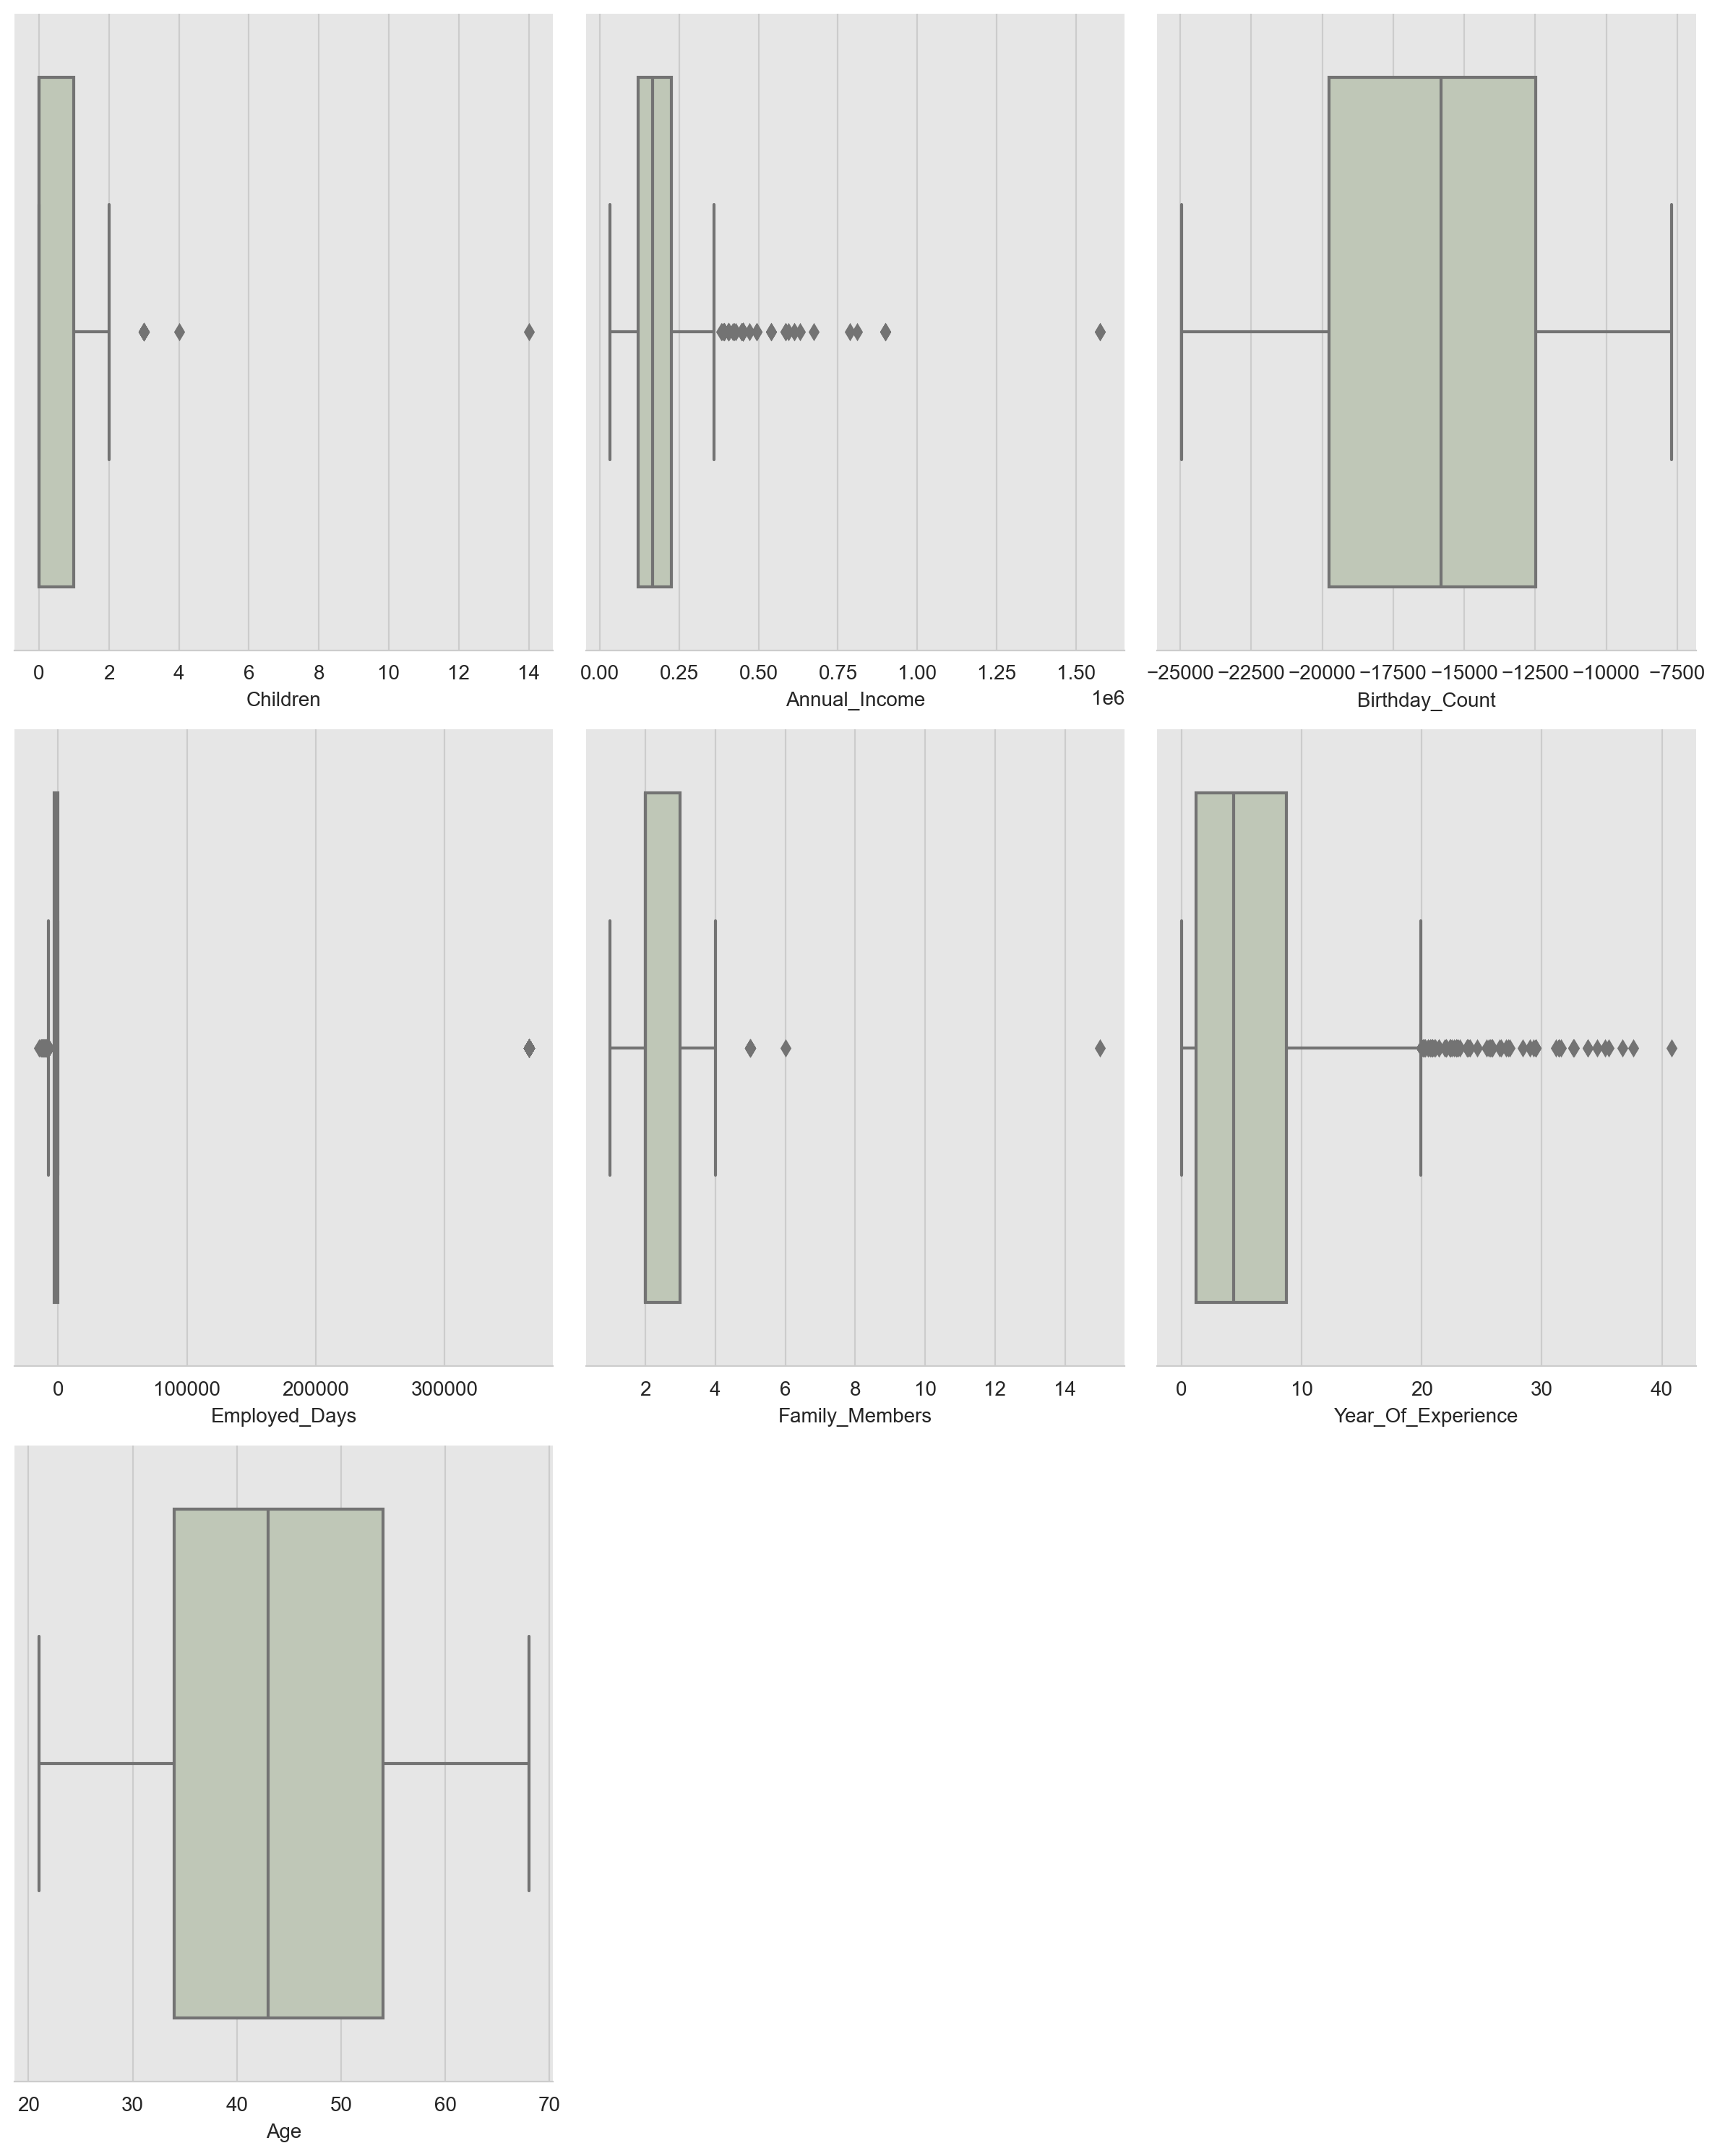

In [114]:
# Checking ouliers using boxplot

col = ['Children', 'Annual_Income', 'Birthday_Count',
       'Employed_Days','Family_Members','Year_Of_Experience', 'Age']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,15))

for x, y in enumerate (credit_card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.boxplot(x=credit_card[y], color = "#BFCAB4")
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight

- Children, Annual_Income, Employeed_Days, Family_Members, Year_Of Experience columns are having some outliers


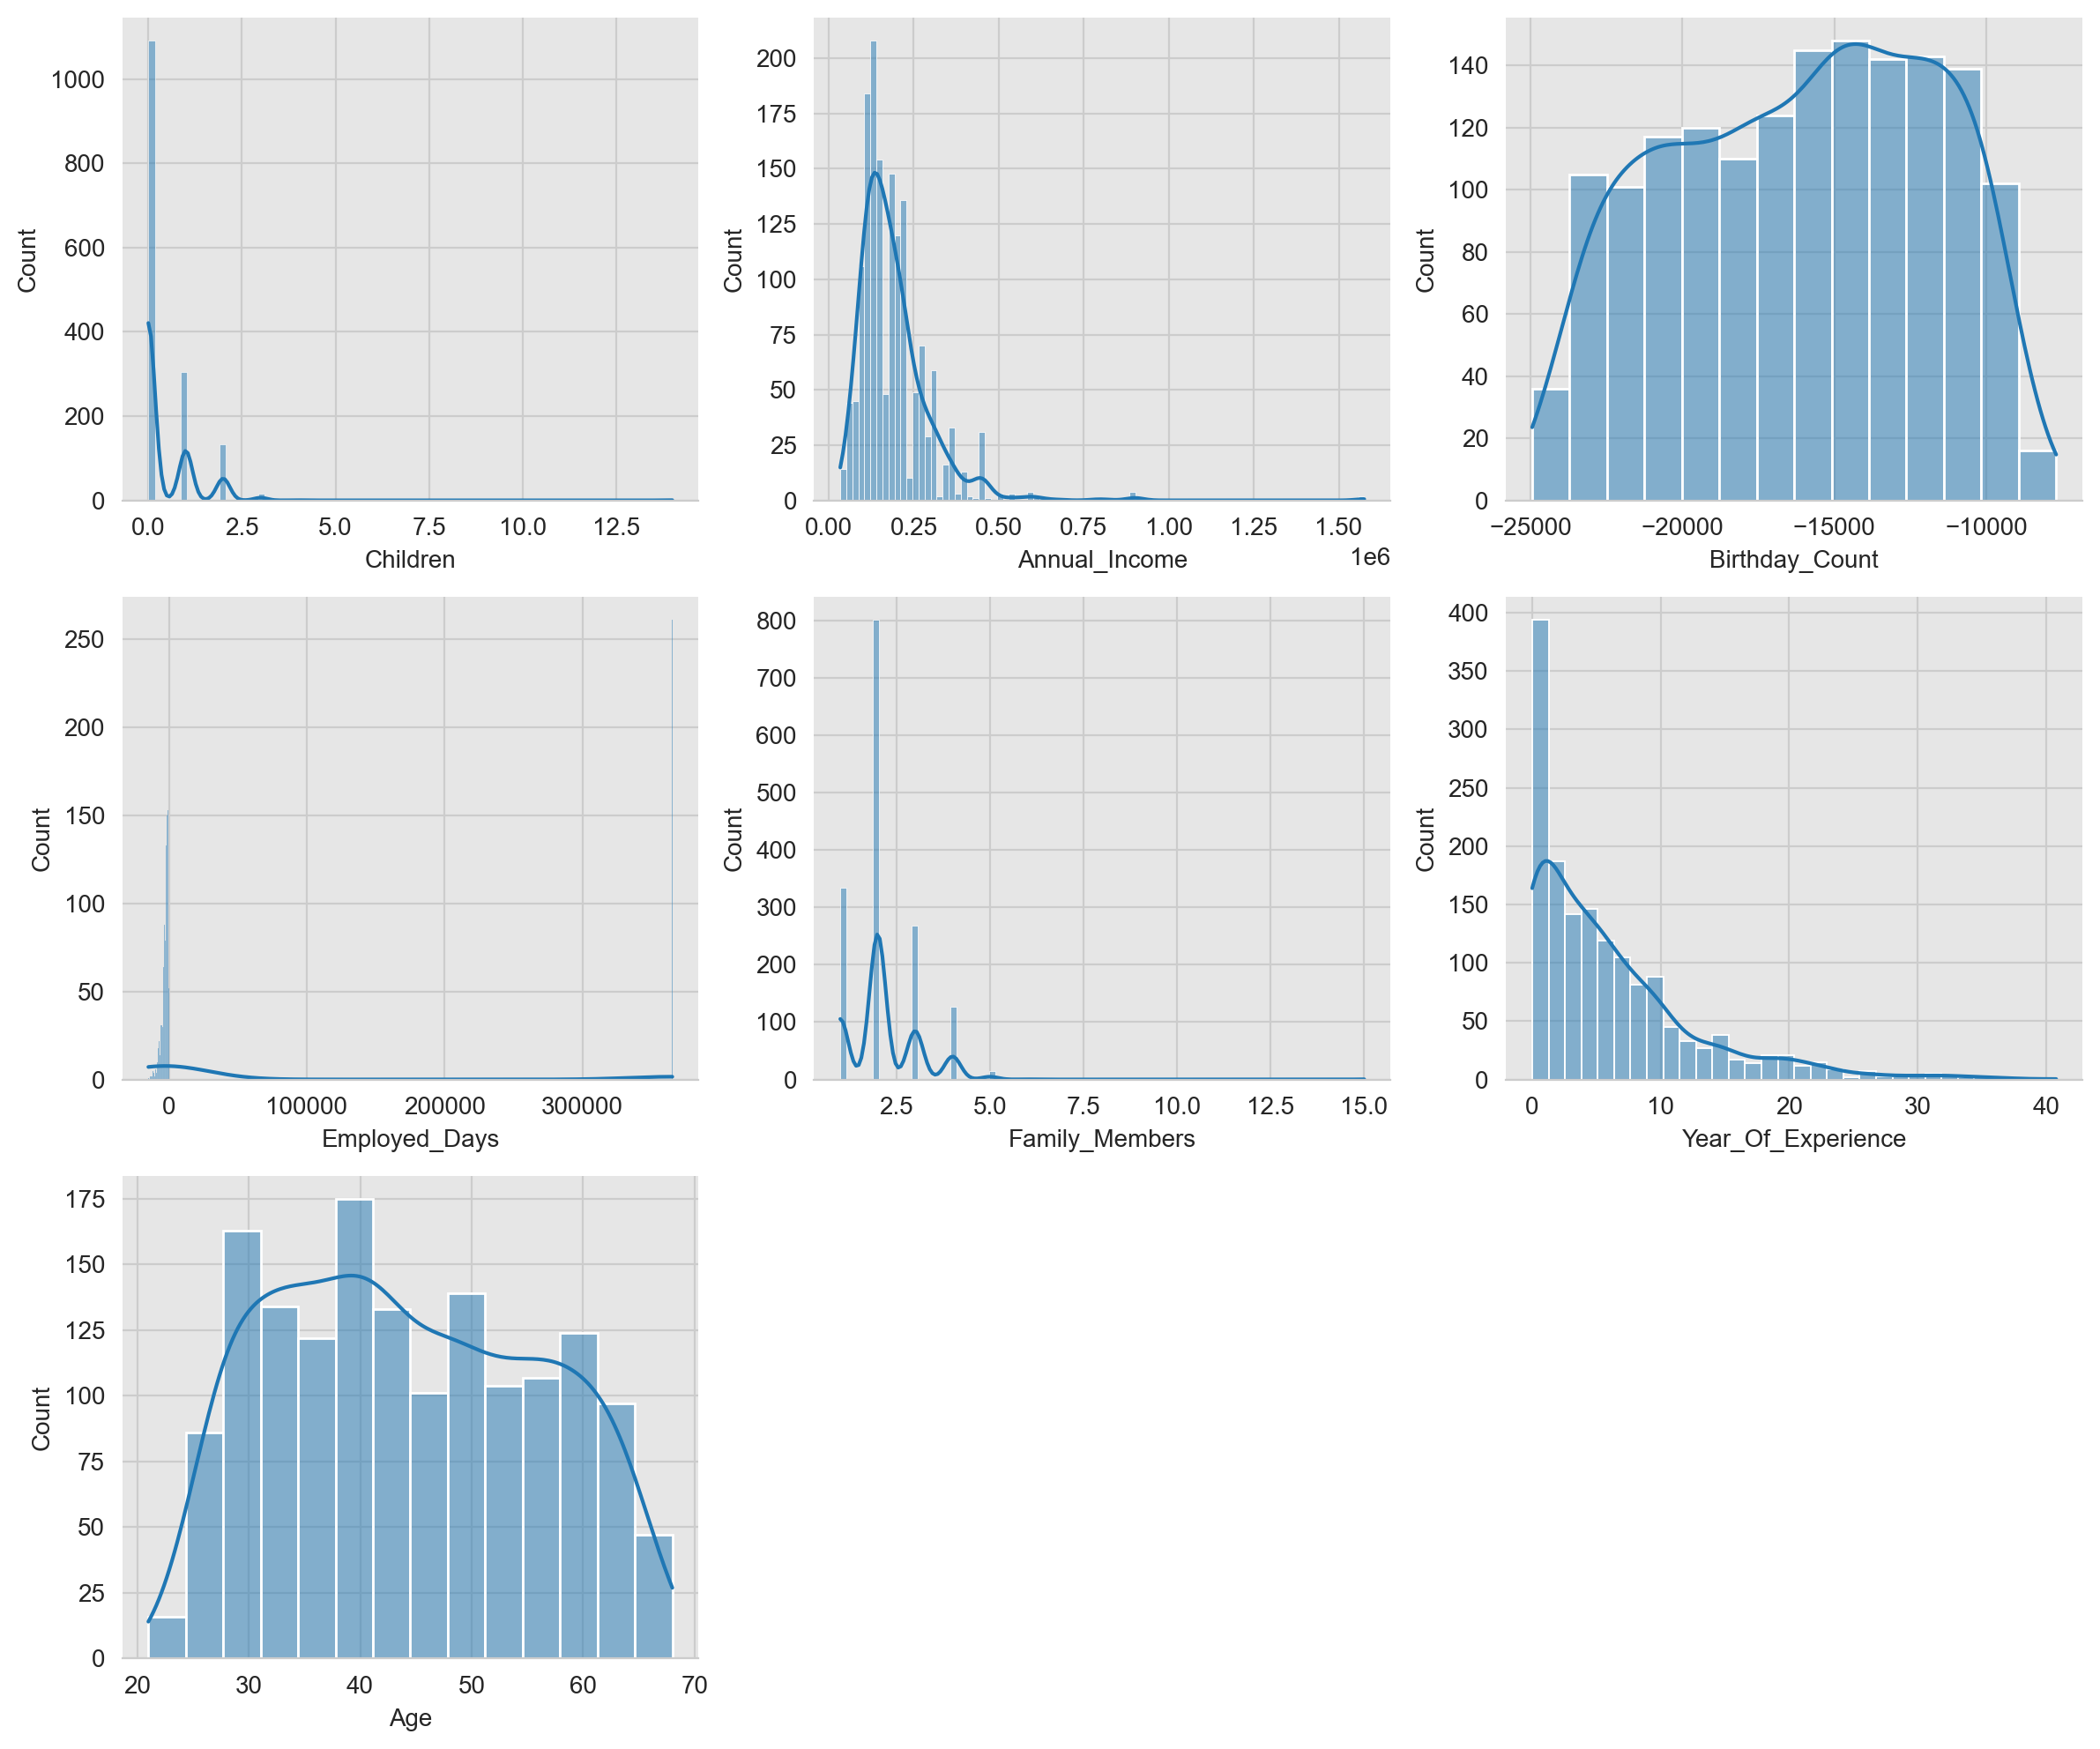

In [115]:
# Checking Distribution of Columns


col = ['Children', 'Annual_Income', 'Birthday_Count',
       'Employed_Days','Family_Members','Year_Of_Experience', 'Age']

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,10))

for x, y in enumerate (credit_card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.histplot(x=credit_card[y],kde=True)
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [116]:
# dropping irrelevant columns 

credit_card_2 = credit_card.copy()
credit_card_2 =credit_card_2.drop(columns=['Ind_Id','Birthday_Count','Employed_Days'])

In [117]:
# checking column present - data without removing outliers.

credit_card_2.columns

Index(['Gender', 'Car_Owner', 'Propert_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

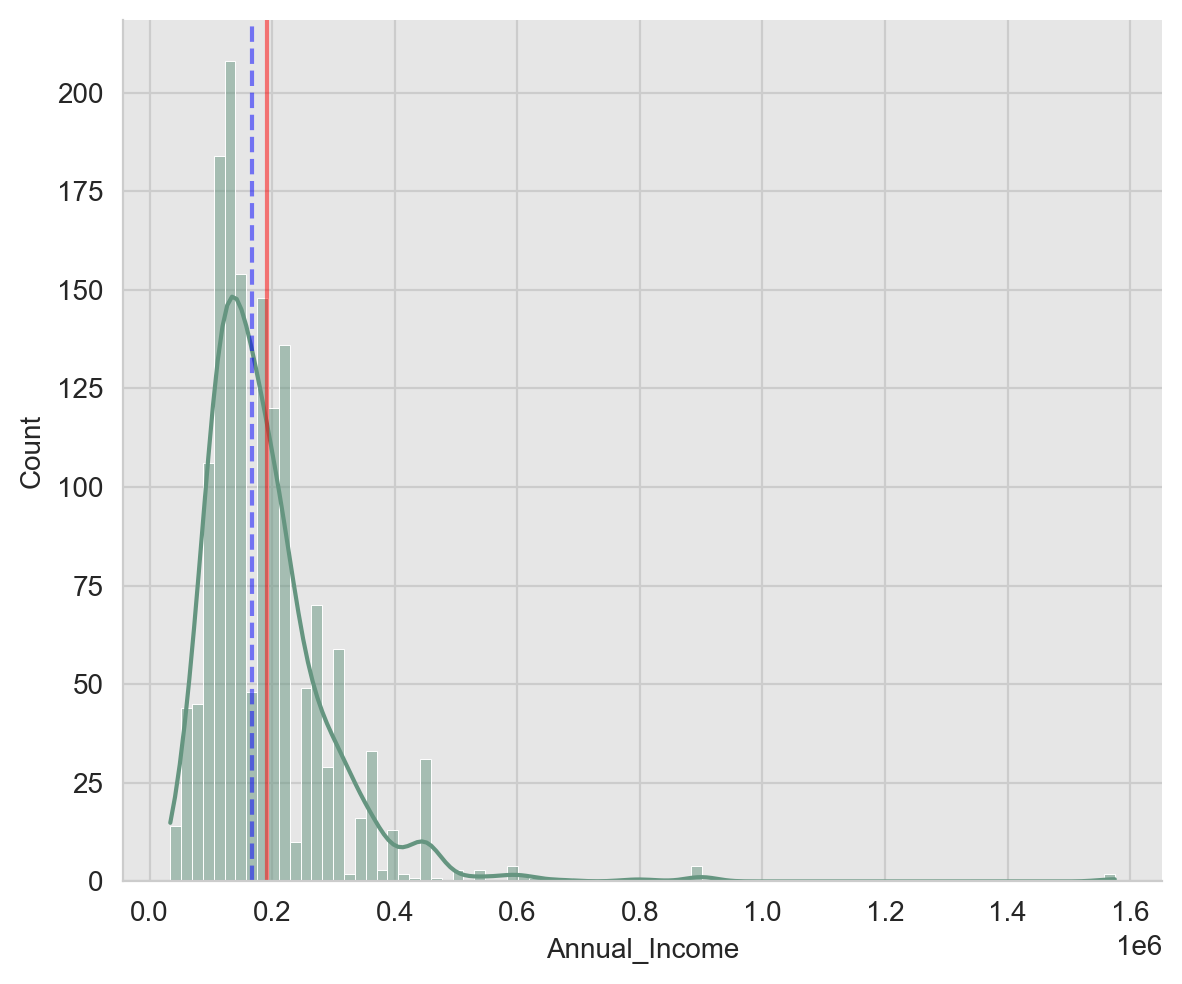

In [118]:
# Plotting histogram, median and mean lines to check distribution of 'Annual_Income'

plt.figure(figsize=(6,5))
sns.histplot(x=credit_card_2['Annual_Income'], data= credit_card_2, kde =True,color = "#659580")
plt.axvline(x=credit_card_2['Annual_Income'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card_2['Annual_Income'].median(),c='blue',ls='--',alpha=0.5,label='Median')

plt.tight_layout()
sns.despine(bottom=False, left= False)

%config InlineBackend.figure_format='retina'
plt.show()

In [119]:
# Counting outlier counts in columns

col = ['Children', 'Annual_Income','Family_Members','Year_Of_Experience', 'Age']

for column in col:
    q1,q3 = np.percentile(credit_card_2[column],[25,75])
    IQR = q3-q1
    lower_val = q1 - (1.5*IQR)
    upper_val = q3 + (1.5*IQR)
    up_value= credit_card_2[column][credit_card_2[column]>upper_val].count()
    low_value= credit_card_2[column][credit_card_2[column]<lower_val].count()
    print(f'outlier count in {column} : {up_value+low_value}')

outlier count in Children : 18
outlier count in Annual_Income : 73
outlier count in Family_Members : 17
outlier count in Year_Of_Experience : 81
outlier count in Age : 0


In [120]:
# outlier finding function

outlier_dict={}  # dictionary to save outliers

def outlier_find(data):
    
    """
    function to find oultliers in data 
    
    """
    
    q1,q3 = np.percentile(data,[25,75])  #finding q1 and q3 from data
    IQR = q3-q1                           
    lower_val = q1 - (1.5*IQR)           # lower value of data below which ouliers can be found
    upper_val = q3 + (1.5*IQR)           # upper value of data below which ouliers can be found
    
    upper_bound_outlier= data[data>upper_val].count()      #outlier counts above upper value
    lower_bound_outlier= data[data<lower_val].count()      #outlier counts below lower value
    
    outlier_dict["upper_bound_outlier"]= upper_bound_outlier   #saving outliers count above upper value in dictionary
    outlier_dict["lower_bound_outlier"]= lower_bound_outlier   #saving outliers count below lower  value in dictionary
    
    return outlier_dict,lower_val,upper_val                    # returning outlier dictionary, lower value and upper value

In [121]:
# outlier removing function


def removing_outlier(dataframe,data):
    
    """
    function to remove outliers from data if present
    
    """
    card = dataframe.copy()
    card = dataframe[data==(data.clip(lower=outlier_find(data)[1],upper=outlier_find(data)[2]))]
    
    return card


In [122]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Annual_Income'

outlier_find(credit_card_2['Annual_Income'])


({'upper_bound_outlier': 73, 'lower_bound_outlier': 0}, -33750.0, 380250.0)

In [123]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Children'

outlier_find(credit_card_2['Children'])


({'upper_bound_outlier': 18, 'lower_bound_outlier': 0}, -1.5, 2.5)

In [124]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Family_Members'

outlier_find(credit_card_2['Family_Members'])


({'upper_bound_outlier': 17, 'lower_bound_outlier': 0}, 0.5, 4.5)

In [125]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Year_Of_Experience'

outlier_find(credit_card_2['Year_Of_Experience'])

({'upper_bound_outlier': 81, 'lower_bound_outlier': 0},
 -10.049999999999999,
 19.949999999999996)

## Outlier removing operation

In [126]:
# copying credit_card_2 dataframe in card

card = credit_card_2.copy()

In [127]:
# removing outliers from Annual_Income

outlier_find(card['Annual_Income'])

card= removing_outlier(card,card['Annual_Income'])

In [128]:
card.shape

(1475, 18)

In [129]:
# removing outliers from Children

outlier_find(card['Children'])

card= removing_outlier(card,card['Children'])

In [130]:
card.shape

(1457, 18)

In [131]:
# removing outliers from Year_Of_Experience

outlier_find(card['Year_Of_Experience'])

card= removing_outlier(card,card['Year_Of_Experience'])

In [132]:
card.shape

(1376, 18)

In [133]:
# removing outliers from Year_Of_Experience

outlier_find(card['Year_Of_Experience'])

card= removing_outlier(card,card['Year_Of_Experience'])

In [134]:
card.shape

(1349, 18)

In [135]:
# removing outliers from Family_Members

outlier_find(card['Family_Members'])
card= removing_outlier(card,card['Family_Members'])


In [136]:
# checking shape of data after removing outliers

card.shape

(1349, 18)

In [137]:
# checking 'Label' column after removing outliers

card['Label'].value_counts()

0    1202
1     147
Name: Label, dtype: int64

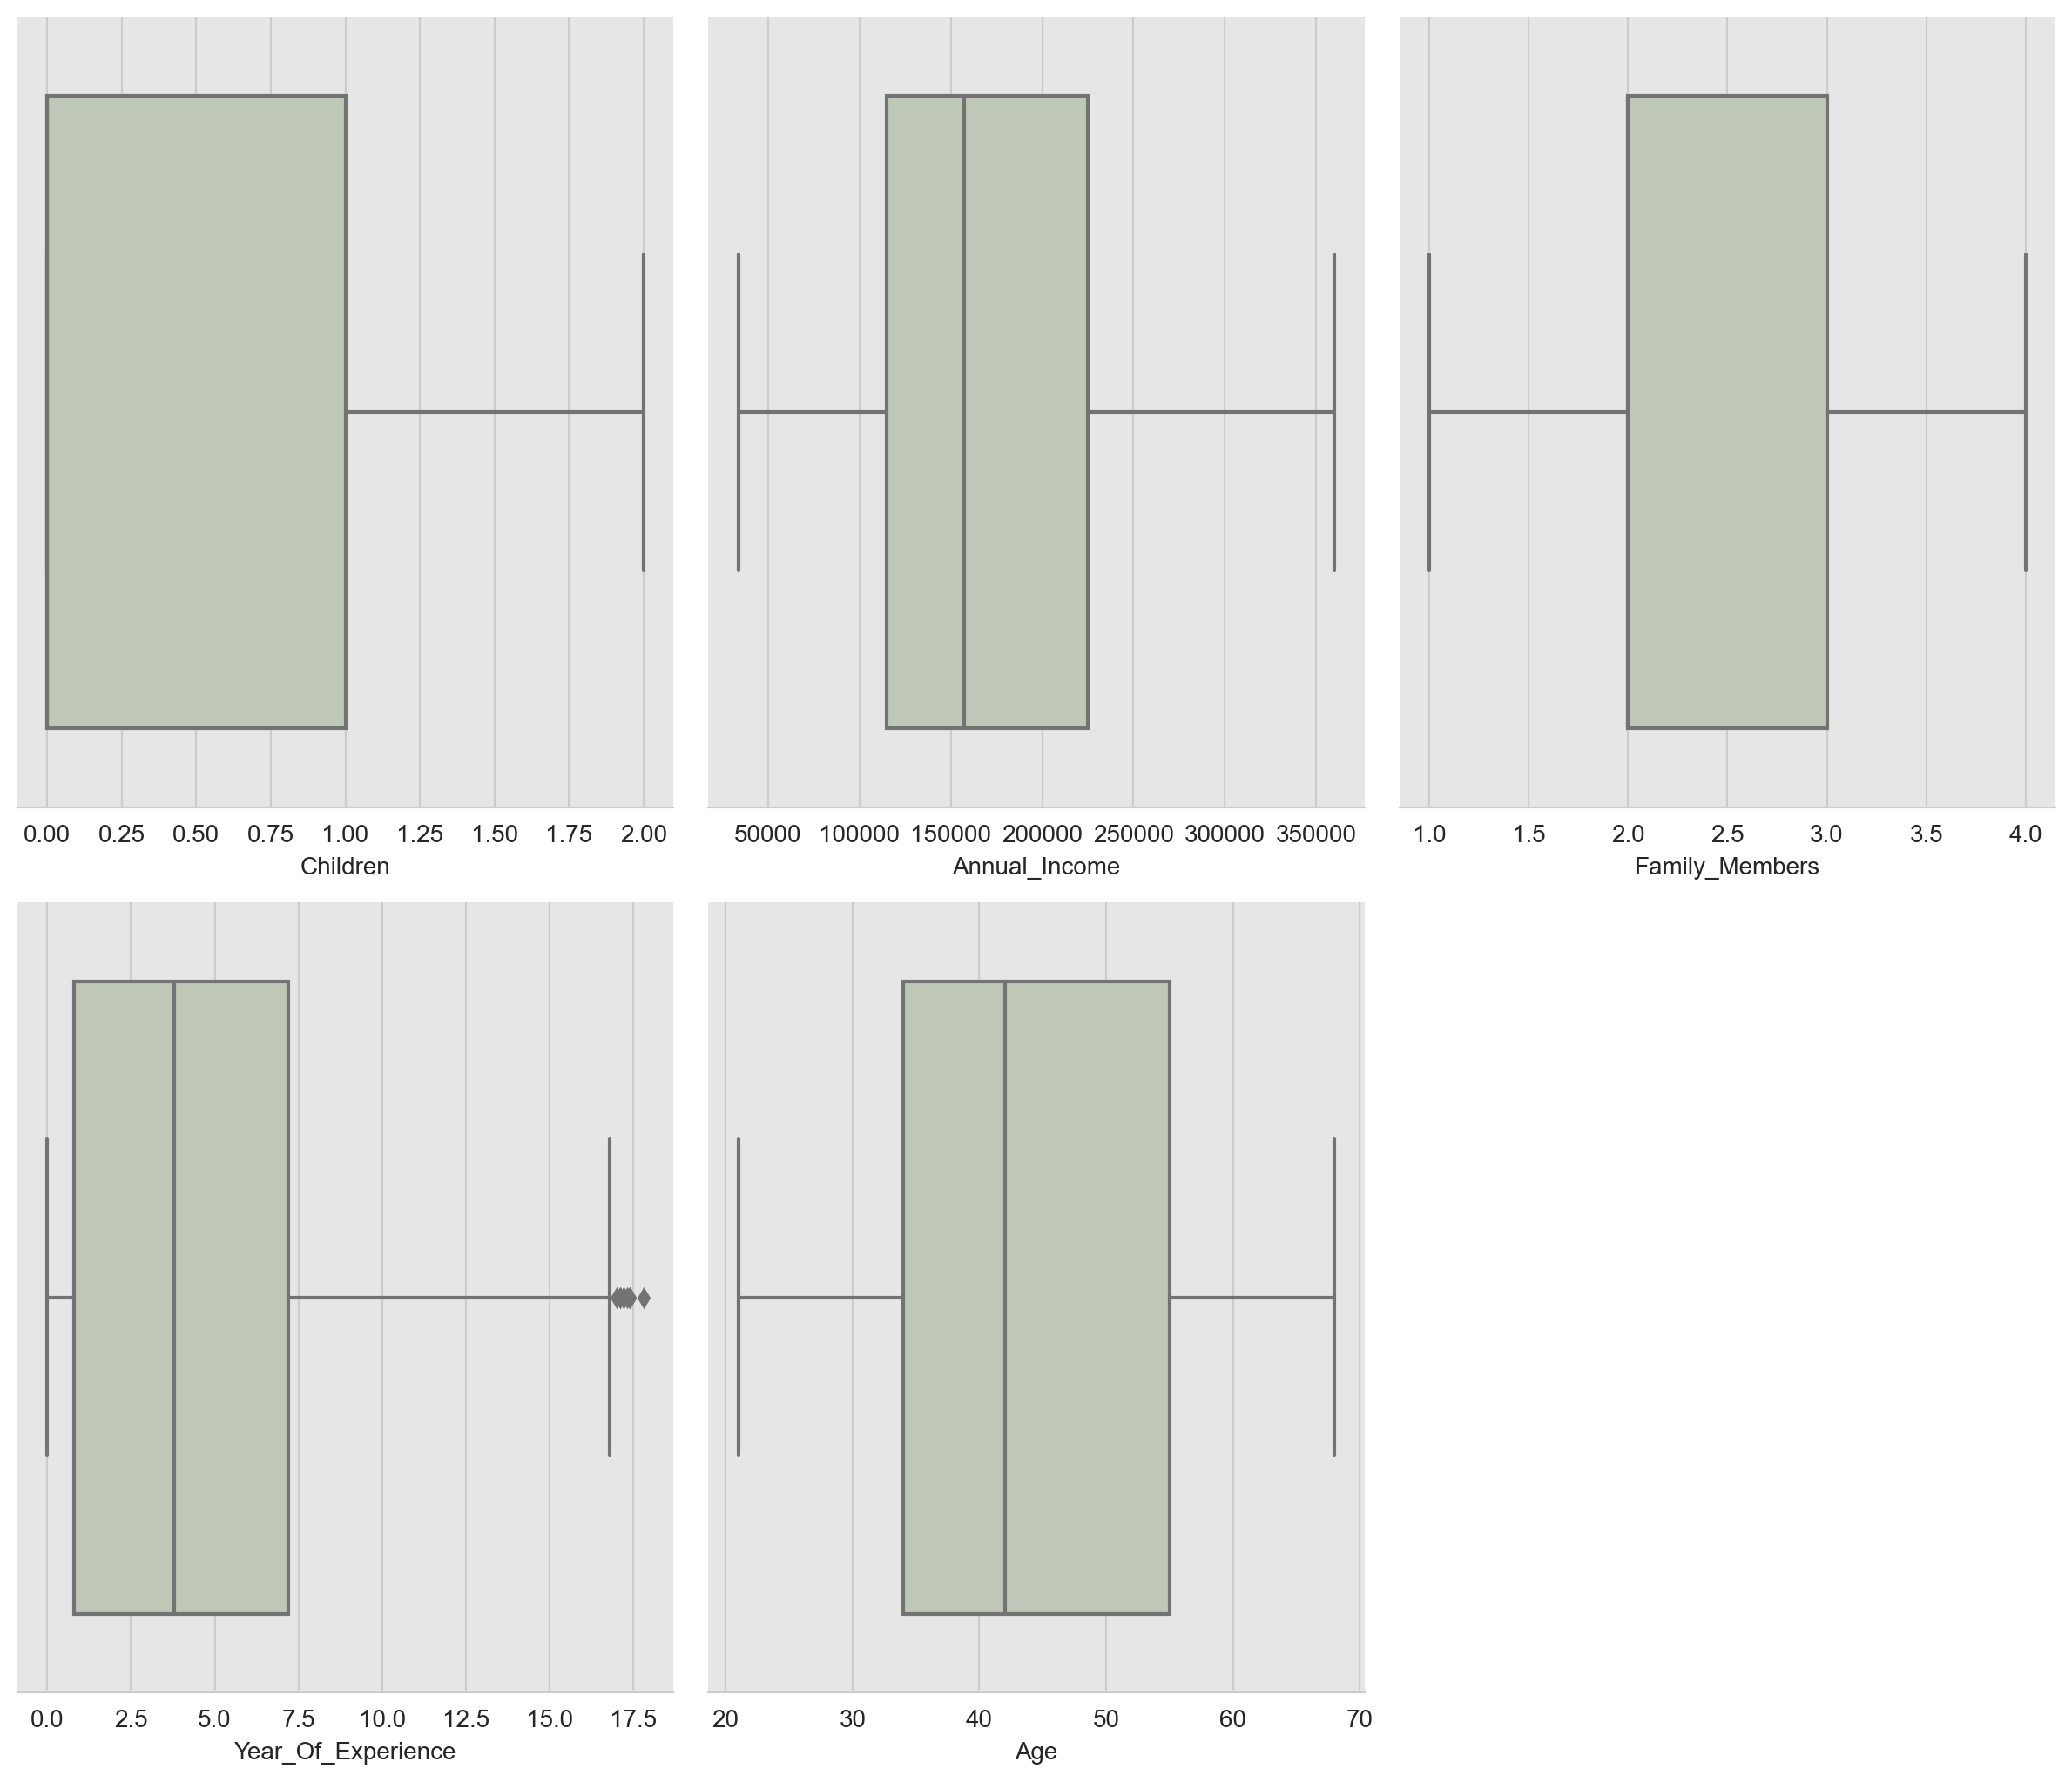

In [138]:
# Checking ouliers using boxplot

col = ['Children', 'Annual_Income','Family_Members','Year_Of_Experience', 'Age']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,15))

for x, y in enumerate (card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.boxplot(x=card[y], color = "#BFCAB4")
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [139]:
card.isnull().sum()

Gender                0
Car_Owner             0
Propert_Owner         0
Children              0
Annual_Income         0
Type_Income           0
Education             0
Marital_Status        0
Housing_Type          0
Mobile_Phone          0
Work_Phone            0
Phone                 0
Email_Id              0
Type_Occupation       0
Family_Members        0
Label                 0
Year_Of_Experience    0
Age                   0
dtype: int64

## Train-Test Split

In [140]:
card.shape

(1349, 18)

In [141]:
card.Age.min()

21.0

In [142]:
# creating 'X' independent columns

X=card.drop(['Label'],axis=1)

In [143]:
X.head()

Gender Car_Owner Propert_Owner  Children  Annual_Income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0       166500.0   
4      F         Y             N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  \
0             Pensioner  Higher education        Married        House   
1  Commercial associate  Higher education        Married        House   
2  Commercial associate  Higher education        Married        House   
3  Commercial associate  Higher education        Married        House   
4  Commercial associate  Higher education        Married        House   

   Mobile_Phone  Work_Phone  Phone  Email_Id Type_Occupation  Family_Members  \
0             1           0      0         0           Other               2   
1             1           1      1         0           Other               2   
2             1           1      1         0           Other               2   
3             1           1      1         0           Other               2   
4             1           1      1         0           Other               2   

   Year_Of_Experience   Age  
0                 0.0  51.0  
1                 1.6  37.0  
2                 1.6  62.0  
3                 1.6  37.0  
4                 1.6  37.0

In [144]:
# creating 'y' Label column

y=card['Label']

In [145]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [146]:
# splitting data in to training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
X_train.shape

(903, 17)

In [148]:
X_test.shape

(446, 17)

## Oversampling the data

In [149]:
X_train.columns

Index(['Gender', 'Car_Owner', 'Propert_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [150]:
X_train.head()

Gender Car_Owner Propert_Owner  Children  Annual_Income  \
863       F         Y             N         1       135000.0   
1177      F         N             Y         0       180000.0   
1331      F         N             Y         0        81000.0   
1090      F         N             Y         0       157500.0   
1412      F         N             N         0        67500.0   

               Type_Income         Education  Marital_Status  \
863                Working  Higher education         Married   
1177  Commercial associate         Secondary         Married   
1331             Pensioner         Secondary         Married   
1090             Pensioner         Secondary       Separated   
1412  Commercial associate         Secondary  Civil marriage   

          Housing_Type  Mobile_Phone  Work_Phone  Phone  Email_Id  \
863   Rented apartment             1           0      0         1   
1177             House             1           0      0         0   
1331             House             1           0      0         0   
1090             House             1           0      0         0   
1412             House             1           0      0         0   

     Type_Occupation  Family_Members  Year_Of_Experience   Age  
863      Accountants               3                 1.5  31.0  
1177     Sales staff               2                 8.6  41.0  
1331           Other               2                 0.0  59.0  
1090           Other               1                 0.0  58.0  
1412        Laborers               2                 0.5  52.0

In [151]:
# oversampling using randomsampling

RS = RandomOverSampler(random_state=42)
              

In [152]:
# oversampling the training data

X_train_os,y_train_os=RS.fit_resample(X_train,y_train)

In [153]:
# checking shape of training independent data

X_train_os.shape

(1592, 17)

In [154]:
# checking if lable data is balanced or not

y_train_os.value_counts()

0    796
1    796
Name: Label, dtype: int64

In [155]:
#checking categorical columns and numerical columns

column_category(card)

({'No. of numerical columns are': 10},
 {'Numerical Names': ['Children',
   'Annual_Income',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label',
   'Year_Of_Experience',
   'Age']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Propert_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [156]:
card.columns

Index(['Gender', 'Car_Owner', 'Propert_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [157]:
# numerical columns

num_col= ['Children',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Year_Of_Experience',
   'Age']

In [158]:
# Annual_income column

ann=[['Annual_Income']]

In [159]:
# type_occupation column

ty_occu =[['Type_Occupation']]

In [160]:
#edu income column

edu =[['Education']]

In [161]:
#categorical column

cat_col = ['Gender',
   'Car_Owner',
   'Propert_Owner',
   'Type_Income',
   'Marital_Status',
   'Housing_Type']

In [162]:
# numerical columns pipeline

num_pipe=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                   ('scaling',StandardScaler(with_mean=False))])

In [163]:
# Annual_income column pipeline

Ann_income_pipe=Pipeline([('imputer',SimpleImputer(strategy='median')),
                   ('scaling',StandardScaler(with_mean=False))])

In [164]:
# Type_occupation column pipeline

Ty_Occup_pipe=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Other')),
                    ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore')),
                     ('scaling',StandardScaler(with_mean=False))])

In [165]:
# education column pipeline

edu_pipe =Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Other')),
                    ('ord_encoder',OrdinalEncoder(categories =[['Lower secondary','Secondary','Incomplete higher','Higher education','Academic degree']])),
                     ('scaling',StandardScaler(with_mean=False))])

In [166]:
#categprical pipeline

cat_pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                    ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore')),
                     ('scaling',StandardScaler(with_mean=False))])

In [167]:
# column transformer of all pipeline

ct = ColumnTransformer(transformers=[
                    ("Ann_pipe",Ann_income_pipe,ann[0]),
                    ("Ty_occup_pipe",Ty_Occup_pipe,ty_occu[0]),
                    ("edu_pipe",edu_pipe,edu[0]),
                    ("num_pipe",num_pipe,num_col),
                    ("cat_pipe",cat_pipe,cat_col)])

In [168]:
# feature selection transformer
# chi-square doesn't support negative values

feature_selection_transfomer= SelectKBest(score_func=f_classif)

#

## Model Defining

In [169]:
# Logistic Regression classsification

LR = LogisticRegression(penalty='l2',C=0.001,max_iter=1000)

In [170]:
# Classification model using decision tree

DT= DecisionTreeClassifier()

In [171]:
# Classification model using Random Forest classifier

RF =RandomForestClassifier()

In [172]:
# Classification model using Ada boost classifier

AB=AdaBoostClassifier()

In [173]:
# XGBoost Model

XG = xgb.XGBClassifier(n_estimators=20,max_depth=10)

In [174]:
# CatBoost Model

CB=CatBoostClassifier()

In [175]:
# Gradient-Boost Model

GB=GradientBoostingClassifier()

In [176]:
# Support vector classification Model

SV = SVC(probability=True)

In [177]:
# K-Nearest Neighbour Model

KNN= KNeighborsClassifier()

## Model Building after Oversampling

In [178]:
# model accuracy as per predictions after oversamling

Model_list ={"Logistic Regression":LR,"Decision Tree": DT,"Adaboost": AB,"Catboost":CB,"Gradient Boosting":GB,
             "Random Forest":RF,"XG Boost":XG,"Support Vector Classification":SV,
             "K Nearest Neigbour": KNN}

auc_report = {}
precision_report ={}

for model_name,model in Model_list.items():
    pipe=make_pipeline(ct,feature_selection_transfomer,model)    # making pipeline of tranformers
    pipe.fit(X_train_os,y_train_os)                              # ftting pipeline to train data   
    y_pred_on_train=pipe.predict(X_train_os)                     # predicting y_pred from training data
    y_pred_on_test=pipe.predict(X_test)                          # predicting y_pred from test data
    y_pred_prob_test =pipe.predict_proba(X_test)[:,1]            # predicting y_pred probability from test data    
    n_errors_train =  (y_pred_on_train!=y_train_os).sum()        # no. of errors in training data 
    n_errors_test =  (y_pred_on_test!=y_test).sum()              # no. of errors in  testing data
    training_report = classification_report(y_train_os, y_pred_on_train,output_dict=True)  # classification report from training data
    df_classification_report_train = pd.DataFrame(training_report).transpose()             # converting report to dataframe
    testing_report = classification_report(y_test, y_pred_on_test,output_dict=True)        # clasification report from testing data
    df_classification_report_test = pd.DataFrame(testing_report).transpose()               # converting report to dataframe
    auc_score_test=roc_auc_score(y_test, y_pred_prob_test)                                 # auc score on testing data
    auc_report[model_name]= auc_score_test
    precision = precision_score(y_test, y_pred_on_test)
    precision_report[model_name] =precision
             
    print(f"-----Metrics score of {model_name}----- \n")        #printing model name
    print(f"errors on training data {n_errors_train} : \n")     # printing errors on training data
    print(f"Accuracy Score on training data : {accuracy_score(y_train_os, y_pred_on_train)}") # printing accuracy score on train data
    print(f"Confusion Matrix on training data : \n {confusion_matrix(y_train_os, y_pred_on_train)}") #training data confusion matrix
    print(f"Classification Report on training data :\n {df_classification_report_train}\n")         # classification report on train data
  
    
    print("\n")     # next line
    print(f"errors on testing data {n_errors_test} : \n")   # printing errors on testing data
    print(f"Accuracy Score on test data : {accuracy_score(y_test, y_pred_on_test)}\n")  # printing accuracy score on testing data
    print(f"Confusion Matrix on testing data : \n {confusion_matrix(y_test, y_pred_on_test)}") #training data confusion matrix
    print(f"Classification Report on testing data : \n {df_classification_report_test}\n")   # classification report printing
    print(f"Auc_score on testing data : \n {auc_score_test}")  #auc score printing
    print(f"Precision Score on test data : {precision_score(y_test, y_pred_on_test)}\n") # precision score on test data
    


best_model_auc = max(auc_report.values())
best_model = [i for i,j in auc_report.items() if j==best_model_auc]
print(f"best model is :  {best_model} with auc score {best_model_auc}") 

best_model_precision = max(precision_report.values())
best_model_prec_name = [i for i,j in precision_report.items() if j==best_model_precision]
print(f"best model_precision is :  {best_model_prec_name} with precision score {best_model_precision}") 
    
    
    
    
    

-----Metrics score of Logistic Regression----- 

errors on training data 602 : 

Accuracy Score on training data : 0.621859296482412
Confusion Matrix on training data : 
 [[485 311]
 [291 505]]
Classification Report on training data :
               precision    recall  f1-score      support
0              0.625000  0.609296  0.617048   796.000000
1              0.618873  0.634422  0.626551   796.000000
accuracy       0.621859  0.621859  0.621859     0.621859
macro avg      0.621936  0.621859  0.621800  1592.000000
weighted avg   0.621936  0.621859  0.621800  1592.000000



errors on testing data 192 : 

Accuracy Score on test data : 0.5695067264573991

Confusion Matrix on testing data : 
 [[237 169]
 [ 23  17]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.911538  0.583744  0.711712  406.000000
1              0.091398  0.425000  0.150442   40.000000
accuracy       0.569507  0.569507  0.569507    0.569507
macro avg   

109:	learn: 0.5433049	total: 780ms	remaining: 6.31s
110:	learn: 0.5427938	total: 786ms	remaining: 6.29s
111:	learn: 0.5420216	total: 791ms	remaining: 6.27s
112:	learn: 0.5407665	total: 797ms	remaining: 6.25s
113:	learn: 0.5400155	total: 802ms	remaining: 6.23s
114:	learn: 0.5393300	total: 807ms	remaining: 6.21s
115:	learn: 0.5385336	total: 813ms	remaining: 6.19s
116:	learn: 0.5378666	total: 818ms	remaining: 6.17s
117:	learn: 0.5375533	total: 824ms	remaining: 6.16s
118:	learn: 0.5360595	total: 830ms	remaining: 6.14s
119:	learn: 0.5352372	total: 835ms	remaining: 6.13s
120:	learn: 0.5341349	total: 841ms	remaining: 6.11s
121:	learn: 0.5332302	total: 846ms	remaining: 6.09s
122:	learn: 0.5325983	total: 853ms	remaining: 6.08s
123:	learn: 0.5321209	total: 859ms	remaining: 6.07s
124:	learn: 0.5315006	total: 864ms	remaining: 6.05s
125:	learn: 0.5306562	total: 870ms	remaining: 6.03s
126:	learn: 0.5298394	total: 875ms	remaining: 6.01s
127:	learn: 0.5291139	total: 880ms	remaining: 6s
128:	learn: 0.5

290:	learn: 0.4518315	total: 1.75s	remaining: 4.27s
291:	learn: 0.4516342	total: 1.76s	remaining: 4.26s
292:	learn: 0.4513618	total: 1.76s	remaining: 4.25s
293:	learn: 0.4510993	total: 1.77s	remaining: 4.25s
294:	learn: 0.4506849	total: 1.77s	remaining: 4.24s
295:	learn: 0.4506749	total: 1.78s	remaining: 4.23s
296:	learn: 0.4504289	total: 1.78s	remaining: 4.22s
297:	learn: 0.4499406	total: 1.79s	remaining: 4.21s
298:	learn: 0.4498010	total: 1.79s	remaining: 4.2s
299:	learn: 0.4491158	total: 1.8s	remaining: 4.2s
300:	learn: 0.4488080	total: 1.8s	remaining: 4.19s
301:	learn: 0.4485492	total: 1.81s	remaining: 4.18s
302:	learn: 0.4482412	total: 1.81s	remaining: 4.18s
303:	learn: 0.4482159	total: 1.82s	remaining: 4.17s
304:	learn: 0.4479290	total: 1.82s	remaining: 4.16s
305:	learn: 0.4477485	total: 1.83s	remaining: 4.15s
306:	learn: 0.4473339	total: 1.84s	remaining: 4.14s
307:	learn: 0.4467523	total: 1.84s	remaining: 4.14s
308:	learn: 0.4463901	total: 1.85s	remaining: 4.13s
309:	learn: 0.44

473:	learn: 0.3989805	total: 2.73s	remaining: 3.03s
474:	learn: 0.3987837	total: 2.74s	remaining: 3.02s
475:	learn: 0.3985339	total: 2.74s	remaining: 3.02s
476:	learn: 0.3984549	total: 2.75s	remaining: 3.01s
477:	learn: 0.3983383	total: 2.75s	remaining: 3s
478:	learn: 0.3982866	total: 2.76s	remaining: 3s
479:	learn: 0.3982068	total: 2.76s	remaining: 2.99s
480:	learn: 0.3981522	total: 2.77s	remaining: 2.98s
481:	learn: 0.3978760	total: 2.77s	remaining: 2.98s
482:	learn: 0.3977208	total: 2.78s	remaining: 2.97s
483:	learn: 0.3975376	total: 2.78s	remaining: 2.97s
484:	learn: 0.3973394	total: 2.79s	remaining: 2.96s
485:	learn: 0.3971449	total: 2.79s	remaining: 2.95s
486:	learn: 0.3968922	total: 2.8s	remaining: 2.95s
487:	learn: 0.3967148	total: 2.8s	remaining: 2.94s
488:	learn: 0.3962378	total: 2.81s	remaining: 2.93s
489:	learn: 0.3960035	total: 2.81s	remaining: 2.93s
490:	learn: 0.3960026	total: 2.82s	remaining: 2.92s
491:	learn: 0.3960017	total: 2.82s	remaining: 2.91s
492:	learn: 0.395651

657:	learn: 0.3556810	total: 3.7s	remaining: 1.92s
658:	learn: 0.3556303	total: 3.71s	remaining: 1.92s
659:	learn: 0.3553866	total: 3.71s	remaining: 1.91s
660:	learn: 0.3552238	total: 3.72s	remaining: 1.91s
661:	learn: 0.3550120	total: 3.72s	remaining: 1.9s
662:	learn: 0.3548713	total: 3.73s	remaining: 1.9s
663:	learn: 0.3546595	total: 3.73s	remaining: 1.89s
664:	learn: 0.3544971	total: 3.74s	remaining: 1.88s
665:	learn: 0.3541745	total: 3.74s	remaining: 1.88s
666:	learn: 0.3539572	total: 3.75s	remaining: 1.87s
667:	learn: 0.3537382	total: 3.75s	remaining: 1.87s
668:	learn: 0.3533465	total: 3.76s	remaining: 1.86s
669:	learn: 0.3531170	total: 3.77s	remaining: 1.85s
670:	learn: 0.3527415	total: 3.77s	remaining: 1.85s
671:	learn: 0.3526517	total: 3.78s	remaining: 1.84s
672:	learn: 0.3524023	total: 3.78s	remaining: 1.84s
673:	learn: 0.3522384	total: 3.79s	remaining: 1.83s
674:	learn: 0.3521298	total: 3.79s	remaining: 1.83s
675:	learn: 0.3517263	total: 3.8s	remaining: 1.82s
676:	learn: 0.35

837:	learn: 0.3161824	total: 4.68s	remaining: 905ms
838:	learn: 0.3159719	total: 4.68s	remaining: 899ms
839:	learn: 0.3157402	total: 4.69s	remaining: 894ms
840:	learn: 0.3155879	total: 4.7s	remaining: 888ms
841:	learn: 0.3153721	total: 4.7s	remaining: 882ms
842:	learn: 0.3152249	total: 4.71s	remaining: 877ms
843:	learn: 0.3150388	total: 4.71s	remaining: 871ms
844:	learn: 0.3148723	total: 4.72s	remaining: 865ms
845:	learn: 0.3147563	total: 4.72s	remaining: 860ms
846:	learn: 0.3146148	total: 4.73s	remaining: 854ms
847:	learn: 0.3144328	total: 4.74s	remaining: 849ms
848:	learn: 0.3142276	total: 4.74s	remaining: 843ms
849:	learn: 0.3140130	total: 4.75s	remaining: 838ms
850:	learn: 0.3138098	total: 4.75s	remaining: 832ms
851:	learn: 0.3136002	total: 4.76s	remaining: 826ms
852:	learn: 0.3134261	total: 4.76s	remaining: 821ms
853:	learn: 0.3132994	total: 4.77s	remaining: 815ms
854:	learn: 0.3131242	total: 4.77s	remaining: 810ms
855:	learn: 0.3129868	total: 4.78s	remaining: 804ms
856:	learn: 0.

-----Metrics score of Catboost----- 

errors on training data 192 : 

Accuracy Score on training data : 0.8793969849246231
Confusion Matrix on training data : 
 [[614 182]
 [ 10 786]]
Classification Report on training data :
               precision    recall  f1-score      support
0              0.983974  0.771357  0.864789   796.000000
1              0.811983  0.987437  0.891156   796.000000
accuracy       0.879397  0.879397  0.879397     0.879397
macro avg      0.897979  0.879397  0.877973  1592.000000
weighted avg   0.897979  0.879397  0.877973  1592.000000



errors on testing data 136 : 

Accuracy Score on test data : 0.695067264573991

Confusion Matrix on testing data : 
 [[288 118]
 [ 18  22]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.941176  0.709360  0.808989  406.000000
1              0.157143  0.550000  0.244444   40.000000
accuracy       0.695067  0.695067  0.695067    0.695067
macro avg      0.549160

## Model Building without Oversampling

In [179]:
# Will use this data without oversampling

#X_train,X_test,y_train, y_test

In [180]:
# model accuracy as per predictions without oversampling


Model_list ={"Logistic Regression":LR,"Decision Tree": DT,"Adaboost": AB,"Catboost":CB,"Gradientboosting":GB,
             "Random Forest":RF,"XG Boost":XG,"Support Vector Classification":SV,
             "K Nearest Neigbour": KNN}

auc_report = {}
precision_report ={}


for model_name,model in Model_list.items():
    pipe=make_pipeline(ct,feature_selection_transfomer,model)    #making pipeine of all transformers
    pipe.fit(X_train,y_train)                                    # fitting pipeline to training data without oversampling
    y_pred_on_train=pipe.predict(X_train)                        # y_pred on train data 
    y_pred_on_test=pipe.predict(X_test)                          # y_pred on test data   
    y_pred_prob_test =pipe.predict_proba(X_test)[:,1]            # y_pred probability on test data
    n_errors_train =  (y_pred_on_train!=y_train).sum()           # n_errors on train data
    n_errors_test =  (y_pred_on_test!=y_test).sum()              # n_errors on test data
    training_report = classification_report(y_train, y_pred_on_train,output_dict=True) #classification report on training data
    df_classification_report_train = pd.DataFrame(training_report).transpose()         #converting report to dataframe 
    testing_report = classification_report(y_test, y_pred_on_test,output_dict=True)    #classification report on test data
    df_classification_report_test = pd.DataFrame(testing_report).transpose()           #converting report to dataframe 
    auc_score_test=roc_auc_score(y_test, y_pred_prob_test)                             # auc score on test data
    auc_report[model_name]= auc_score_test
    precision = precision_score(y_test, y_pred_on_test)
    precision_report[model_name] =precision
    
    
    
    print(f"-------Metrics score of {model_name}--------- \n")                  # pinting name of model
    print(f"errors on training data {n_errors_train} : \n")                     # no. of errors on training data
    print(f"Accuracy Score on training data : {accuracy_score(y_train, y_pred_on_train)}")  # Accuracy score on training data
    print(f"Confusion Matrix on training data : \n {confusion_matrix(y_train, y_pred_on_train)}") #print confusion matrix on train data
    print(f"Classification Report on training data :\n {df_classification_report_train}\n") # print classification report on traind data
    
    print("\n")   # new line
    print(f"errors on testing data {n_errors_test} : \n") # no. of errors on testing data
    print(f"Accuracy Score on test data : {accuracy_score(y_test, y_pred_on_test)}\n")  # accuracy score on test data
    print(f"Confusion Matrix on testing data : \n {confusion_matrix(y_test, y_pred_on_test)}")  # confusion matrix on test data
    print(f"Classification Report on testing data : \n {df_classification_report_test}\n")  # classification reort on test data
    print(f"Auc_score on testing data : \n {auc_score_test}")  # auc score on test data
    print(f"Precision Score on test data : {precision_score(y_test, y_pred_on_test)}\n") # precision score on test data
             
best_model_auc = max(auc_report.values())
best_model = [i for i,j in auc_report.items() if j==best_model_auc]
print(f"best model is :  {best_model} with auc score {best_model_auc}") 

best_model_precision = max(precision_report.values())
best_model_prec_name = [i for i,j in precision_report.items() if j==best_model_precision]
print(f"best model_precision is :  {best_model_prec_name} with precision score {best_model_precision}") 
    
    
    
    
    
    

-------Metrics score of Logistic Regression--------- 

errors on training data 107 : 

Accuracy Score on training data : 0.8815060908084164
Confusion Matrix on training data : 
 [[796   0]
 [107   0]]
Classification Report on training data :
               precision    recall  f1-score     support
0              0.881506  1.000000  0.937022  796.000000
1              0.000000  0.000000  0.000000  107.000000
accuracy       0.881506  0.881506  0.881506    0.881506
macro avg      0.440753  0.500000  0.468511  903.000000
weighted avg   0.777053  0.881506  0.825990  903.000000



errors on testing data 40 : 

Accuracy Score on test data : 0.9103139013452914

Confusion Matrix on testing data : 
 [[406   0]
 [ 40   0]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.910314  1.000000  0.953052  406.000000
1              0.000000  0.000000  0.000000   40.000000
accuracy       0.910314  0.910314  0.910314    0.910314
macro avg   

94:	learn: 0.3719103	total: 428ms	remaining: 4.08s
95:	learn: 0.3709963	total: 434ms	remaining: 4.08s
96:	learn: 0.3702525	total: 437ms	remaining: 4.07s
97:	learn: 0.3692974	total: 441ms	remaining: 4.06s
98:	learn: 0.3681986	total: 446ms	remaining: 4.06s
99:	learn: 0.3671155	total: 450ms	remaining: 4.05s
100:	learn: 0.3657657	total: 455ms	remaining: 4.05s
101:	learn: 0.3649666	total: 460ms	remaining: 4.05s
102:	learn: 0.3642977	total: 463ms	remaining: 4.03s
103:	learn: 0.3633071	total: 468ms	remaining: 4.03s
104:	learn: 0.3626305	total: 472ms	remaining: 4.02s
105:	learn: 0.3618770	total: 479ms	remaining: 4.04s
106:	learn: 0.3611436	total: 483ms	remaining: 4.03s
107:	learn: 0.3601473	total: 488ms	remaining: 4.03s
108:	learn: 0.3594022	total: 493ms	remaining: 4.03s
109:	learn: 0.3584684	total: 498ms	remaining: 4.03s
110:	learn: 0.3574024	total: 503ms	remaining: 4.03s
111:	learn: 0.3564246	total: 508ms	remaining: 4.02s
112:	learn: 0.3556674	total: 512ms	remaining: 4.02s
113:	learn: 0.3550

264:	learn: 0.3016431	total: 1.2s	remaining: 3.34s
265:	learn: 0.3011828	total: 1.21s	remaining: 3.34s
266:	learn: 0.3010619	total: 1.21s	remaining: 3.33s
267:	learn: 0.3009025	total: 1.22s	remaining: 3.33s
268:	learn: 0.3006420	total: 1.22s	remaining: 3.32s
269:	learn: 0.3005367	total: 1.23s	remaining: 3.32s
270:	learn: 0.3004458	total: 1.23s	remaining: 3.31s
271:	learn: 0.3002036	total: 1.24s	remaining: 3.31s
272:	learn: 0.2999475	total: 1.24s	remaining: 3.3s
273:	learn: 0.2996344	total: 1.25s	remaining: 3.3s
274:	learn: 0.2991875	total: 1.25s	remaining: 3.3s
275:	learn: 0.2989033	total: 1.25s	remaining: 3.29s
276:	learn: 0.2986385	total: 1.26s	remaining: 3.29s
277:	learn: 0.2985484	total: 1.26s	remaining: 3.29s
278:	learn: 0.2985128	total: 1.27s	remaining: 3.28s
279:	learn: 0.2981926	total: 1.27s	remaining: 3.27s
280:	learn: 0.2978863	total: 1.28s	remaining: 3.27s
281:	learn: 0.2977516	total: 1.28s	remaining: 3.27s
282:	learn: 0.2975751	total: 1.29s	remaining: 3.26s
283:	learn: 0.29

436:	learn: 0.2767267	total: 1.98s	remaining: 2.55s
437:	learn: 0.2765568	total: 1.98s	remaining: 2.54s
438:	learn: 0.2764087	total: 1.99s	remaining: 2.54s
439:	learn: 0.2762846	total: 1.99s	remaining: 2.53s
440:	learn: 0.2760962	total: 2s	remaining: 2.53s
441:	learn: 0.2760029	total: 2s	remaining: 2.52s
442:	learn: 0.2758979	total: 2s	remaining: 2.52s
443:	learn: 0.2756823	total: 2.01s	remaining: 2.52s
444:	learn: 0.2753196	total: 2.01s	remaining: 2.51s
445:	learn: 0.2750256	total: 2.02s	remaining: 2.5s
446:	learn: 0.2749264	total: 2.02s	remaining: 2.5s
447:	learn: 0.2748933	total: 2.02s	remaining: 2.5s
448:	learn: 0.2747241	total: 2.03s	remaining: 2.49s
449:	learn: 0.2747091	total: 2.03s	remaining: 2.49s
450:	learn: 0.2746507	total: 2.04s	remaining: 2.48s
451:	learn: 0.2745235	total: 2.04s	remaining: 2.48s
452:	learn: 0.2743779	total: 2.05s	remaining: 2.47s
453:	learn: 0.2743451	total: 2.05s	remaining: 2.47s
454:	learn: 0.2742098	total: 2.06s	remaining: 2.46s
455:	learn: 0.2741702	to

605:	learn: 0.2566445	total: 2.75s	remaining: 1.79s
606:	learn: 0.2565397	total: 2.76s	remaining: 1.78s
607:	learn: 0.2564035	total: 2.76s	remaining: 1.78s
608:	learn: 0.2561469	total: 2.77s	remaining: 1.78s
609:	learn: 0.2560236	total: 2.77s	remaining: 1.77s
610:	learn: 0.2557480	total: 2.77s	remaining: 1.77s
611:	learn: 0.2556825	total: 2.78s	remaining: 1.76s
612:	learn: 0.2554754	total: 2.78s	remaining: 1.76s
613:	learn: 0.2553929	total: 2.79s	remaining: 1.75s
614:	learn: 0.2552369	total: 2.79s	remaining: 1.75s
615:	learn: 0.2550877	total: 2.8s	remaining: 1.74s
616:	learn: 0.2550122	total: 2.8s	remaining: 1.74s
617:	learn: 0.2549959	total: 2.81s	remaining: 1.74s
618:	learn: 0.2549912	total: 2.81s	remaining: 1.73s
619:	learn: 0.2548891	total: 2.82s	remaining: 1.73s
620:	learn: 0.2546984	total: 2.82s	remaining: 1.72s
621:	learn: 0.2546237	total: 2.83s	remaining: 1.72s
622:	learn: 0.2545826	total: 2.83s	remaining: 1.71s
623:	learn: 0.2544638	total: 2.83s	remaining: 1.71s
624:	learn: 0.

766:	learn: 0.2393235	total: 3.53s	remaining: 1.07s
767:	learn: 0.2391358	total: 3.53s	remaining: 1.07s
768:	learn: 0.2389858	total: 3.54s	remaining: 1.06s
769:	learn: 0.2387918	total: 3.54s	remaining: 1.06s
770:	learn: 0.2387899	total: 3.55s	remaining: 1.05s
771:	learn: 0.2386074	total: 3.55s	remaining: 1.05s
772:	learn: 0.2385333	total: 3.56s	remaining: 1.04s
773:	learn: 0.2384393	total: 3.56s	remaining: 1.04s
774:	learn: 0.2383354	total: 3.56s	remaining: 1.03s
775:	learn: 0.2382748	total: 3.57s	remaining: 1.03s
776:	learn: 0.2381464	total: 3.57s	remaining: 1.02s
777:	learn: 0.2380946	total: 3.58s	remaining: 1.02s
778:	learn: 0.2380141	total: 3.58s	remaining: 1.02s
779:	learn: 0.2378455	total: 3.59s	remaining: 1.01s
780:	learn: 0.2377505	total: 3.59s	remaining: 1.01s
781:	learn: 0.2376714	total: 3.6s	remaining: 1s
782:	learn: 0.2375062	total: 3.6s	remaining: 998ms
783:	learn: 0.2374285	total: 3.61s	remaining: 994ms
784:	learn: 0.2373271	total: 3.61s	remaining: 989ms
785:	learn: 0.237

934:	learn: 0.2220592	total: 4.3s	remaining: 299ms
935:	learn: 0.2219025	total: 4.31s	remaining: 295ms
936:	learn: 0.2218262	total: 4.31s	remaining: 290ms
937:	learn: 0.2217998	total: 4.32s	remaining: 285ms
938:	learn: 0.2217011	total: 4.32s	remaining: 281ms
939:	learn: 0.2216799	total: 4.33s	remaining: 276ms
940:	learn: 0.2216203	total: 4.33s	remaining: 272ms
941:	learn: 0.2215058	total: 4.34s	remaining: 267ms
942:	learn: 0.2214228	total: 4.34s	remaining: 262ms
943:	learn: 0.2213915	total: 4.35s	remaining: 258ms
944:	learn: 0.2213300	total: 4.35s	remaining: 253ms
945:	learn: 0.2212380	total: 4.36s	remaining: 249ms
946:	learn: 0.2211564	total: 4.36s	remaining: 244ms
947:	learn: 0.2210350	total: 4.37s	remaining: 240ms
948:	learn: 0.2209611	total: 4.37s	remaining: 235ms
949:	learn: 0.2208457	total: 4.38s	remaining: 230ms
950:	learn: 0.2207518	total: 4.38s	remaining: 226ms
951:	learn: 0.2206265	total: 4.39s	remaining: 221ms
952:	learn: 0.2205704	total: 4.39s	remaining: 217ms
953:	learn: 0

-------Metrics score of K Nearest Neigbour--------- 

errors on training data 89 : 

Accuracy Score on training data : 0.9014396456256921
Confusion Matrix on training data : 
 [[783  13]
 [ 76  31]]
Classification Report on training data :
               precision    recall  f1-score    support
0              0.911525  0.983668  0.946224  796.00000
1              0.704545  0.289720  0.410596  107.00000
accuracy       0.901440  0.901440  0.901440    0.90144
macro avg      0.808035  0.636694  0.678410  903.00000
weighted avg   0.886999  0.901440  0.882755  903.00000



errors on testing data 42 : 

Accuracy Score on test data : 0.905829596412556

Confusion Matrix on testing data : 
 [[398   8]
 [ 34   6]]
Classification Report on testing data : 
               precision    recall  f1-score    support
0              0.921296  0.980296  0.949881  406.00000
1              0.428571  0.150000  0.222222   40.00000
accuracy       0.905830  0.905830  0.905830    0.90583
macro avg      0.674934  

## Observations

- As per Classification report random forest performing good than others on data without oversampling even, 
- we will try to improvise Random forest model.